# IS507 Project Final Phase


- Bilgin Koçak 2026243
- Emrah Kolbaşı 2026227
- Ferhat Kalkan 1934587

## Import Necessary Libraries

Selecting the best model for Machine Learning problem statement is one of the difficult tasks. It requires importing all the libraries then tuning the parameters, then comparing all the models, then checking the model performance using different objectives. This process takes a lot of time. Instead, lazypredict package can be utilized. It builds a lot of basic models without much code and helps understand which models work better without any parameter tuning. [lazypredict](https://lazypredict.readthedocs.io/en/latest/readme.html#installation) python package will be used for model selection.

To install the package: 

> pip install lazypredict

In [1]:
import os                              # provides functions for interacting with the operating system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import NuSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score

from lazypredict.Supervised import LazyRegressor

import statsmodels.api as sm
import pylab as py

C:\Users\kocak\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. Merge All Files Into One Dataframe

First, we obtain all csv files in the directory where this jupyter notebook file exist

In [2]:
files = os.listdir()                                      # get the list of all files and directories in the specified directory
files = [file for file in files if file[-4:] == '.csv']
print("All csv files in the directory:")
files

All csv files in the directory:


['caustic.csv',
 'cinh.csv',
 'fe_lab.csv',
 'input_f.csv',
 'input_p.csv',
 'input_t.csv',
 'input_v.csv',
 'ph_lab.csv',
 'source.csv',
 'x1_ci_f.csv',
 'x1_ci_p.csv',
 'x1_ci_t.csv',
 'x1_ci_v.csv',
 'x1_co_f.csv',
 'x1_co_p.csv',
 'x1_co_t.csv',
 'x1_co_v.csv',
 'x1_hi_f.csv',
 'x1_hi_p.csv',
 'x1_hi_t.csv',
 'x1_hi_v.csv',
 'x1_ho_f.csv',
 'x1_ho_p.csv',
 'x1_ho_t.csv',
 'x1_ho_v.csv',
 'x2_ci_f.csv',
 'x2_ci_p.csv',
 'x2_ci_t.csv',
 'x2_ci_v.csv',
 'x2_co_f.csv',
 'x2_co_p.csv',
 'x2_co_t.csv',
 'x2_co_v.csv',
 'x2_hi_f.csv',
 'x2_hi_p.csv',
 'x2_hi_t.csv',
 'x2_hi_v.csv',
 'x2_ho_f.csv',
 'x2_ho_p.csv',
 'x2_ho_t.csv',
 'x2_ho_v.csv']

By default, date columns are represented as "object" data type in Pandas when loading data from a CSV file. To read the date column correctly, we can use the argument parse_dates to specify a list of date columns

In [3]:
df_temp = pd.read_csv('./fe_lab.csv', parse_dates=['date'])
df_temp.head()

date  fe_lab
0 2021-02-01 08:00:00    1.27
1 2021-02-01 10:00:00    1.12
2 2021-02-01 12:00:00    1.01
3 2021-02-01 14:00:00    0.91
4 2021-02-01 16:00:00    0.87

In [4]:
df = pd.DataFrame(columns=['date'])
for file in files:
    df_temp = pd.read_csv('./' + file, parse_dates=['date'])
    df_temp.columns = ['date', file[:-4]]
    
    # Check whether we have any file that has more than 2 columns 
    if len(df_temp.columns) > 2:
        print(file)
    df = df.merge(df_temp, how = 'outer', on='date')        # use "outer" for union of keys from both frames

df.head()

date  caustic  cinh  fe_lab   input_f    input_p  input_t  \
0 2021-02-01 08:00:00     0.01  0.00    1.27 149819.00 9631200.00    10.20   
1 2021-02-01 08:01:00     0.01  0.00     NaN 150503.00 9633100.00    10.40   
2 2021-02-01 08:02:00     0.01  0.00     NaN 149128.00 9633100.00    10.60   
3 2021-02-01 08:03:00     0.01  0.00     NaN 149747.00 9634900.00    11.10   
4 2021-02-01 08:04:00     0.01  0.00     NaN 150382.00 9634500.00    10.00   

   input_v  ph_lab source  ...  x2_co_t  x2_co_v  x2_hi_f    x2_hi_p  x2_hi_t  \
0    14.98    8.36      A  ...   101.40    15.07 74444.00 9648800.00   319.80   
1    15.05     NaN      A  ...      NaN    15.02 74494.00 9642800.00   320.00   
2    14.86     NaN      A  ...   101.00    15.09 74327.00 9649000.00   320.00   
3    14.96     NaN      A  ...   101.60    15.27 73797.00 9642000.00   320.00   
4    15.05     NaN      A  ...   101.40    15.08 72962.00 9646700.00   319.80   

   x2_hi_v  x2_ho_f    x2_ho_p  x2_ho_t  x2_ho_v  
0    22.32 75188.00        NaN   -40.00    22.53  
1    22.31 74794.00 9642800.00   138.40    22.44  
2    22.28 74926.00 9646500.00   131.60    22.48  
3    22.14 75758.00 9644200.00   132.10    22.72  
4    21.90 74453.00 9646900.00   130.20    22.33  

[5 rows x 42 columns]

## 2. Exploratory Data Analysis

First of all, it should be checked whether there exists missing value or not, before going into details. If yes, the missing values should be either dropped or replaced with some descriptives (mean,median etc.). Then, descriptive analysis of data should be performed in order to get some useful insights on the dataset. Finally, dataset should be visualized to get more solid understanding.

In [5]:
print(f"Shape of merged data : {df.shape}")
print(f"Length of merged data : {len(df)}")

Shape of merged data : (133147, 42)
Length of merged data : 133147


In [6]:
for file in files:
    df_temp = pd.read_csv('./' + file)
    print(f"Length of {file} : {len(df_temp)}")

Length of caustic.csv : 133147
Length of cinh.csv : 133147
Length of fe_lab.csv : 1110
Length of input_f.csv : 131823
Length of input_p.csv : 129196
Length of input_t.csv : 126665
Length of input_v.csv : 127907
Length of ph_lab.csv : 1110
Length of source.csv : 133147
Length of x1_ci_f.csv : 131820
Length of x1_ci_p.csv : 129198
Length of x1_ci_t.csv : 126679
Length of x1_ci_v.csv : 127897
Length of x1_co_f.csv : 131821
Length of x1_co_p.csv : 129208
Length of x1_co_t.csv : 126651
Length of x1_co_v.csv : 127895
Length of x1_hi_f.csv : 131822
Length of x1_hi_p.csv : 129195
Length of x1_hi_t.csv : 126634
Length of x1_hi_v.csv : 127894
Length of x1_ho_f.csv : 131823
Length of x1_ho_p.csv : 129197
Length of x1_ho_t.csv : 126655
Length of x1_ho_v.csv : 127899
Length of x2_ci_f.csv : 131823
Length of x2_ci_p.csv : 129190
Length of x2_ci_t.csv : 126648
Length of x2_ci_v.csv : 127897
Length of x2_co_f.csv : 131822
Length of x2_co_p.csv : 129202
Length of x2_co_t.csv : 126663
Length of x2_co_v.

As can be seen from the above cell, missing values exist in columns **fe_lab** and **ph_lab** only. The reason is that each sample is taken from fluid in every two hours. 

In [7]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f"For {col} number of missing value : {df[col].isna().sum()} and its percentage : {df[col].isna().sum()*100/len(df):.2f}%")

For fe_lab number of missing value : 132037 and its percentage : 99.17%
For input_f number of missing value : 1324 and its percentage : 0.99%
For input_p number of missing value : 3951 and its percentage : 2.97%
For input_t number of missing value : 6482 and its percentage : 4.87%
For input_v number of missing value : 5240 and its percentage : 3.94%
For ph_lab number of missing value : 132037 and its percentage : 99.17%
For x1_ci_f number of missing value : 1327 and its percentage : 1.00%
For x1_ci_p number of missing value : 3949 and its percentage : 2.97%
For x1_ci_t number of missing value : 6468 and its percentage : 4.86%
For x1_ci_v number of missing value : 5250 and its percentage : 3.94%
For x1_co_f number of missing value : 1326 and its percentage : 1.00%
For x1_co_p number of missing value : 3939 and its percentage : 2.96%
For x1_co_t number of missing value : 6496 and its percentage : 4.88%
For x1_co_v number of missing value : 5252 and its percentage : 3.94%
For x1_hi_f numb

As can be seen from the above cell, most of the fe_lab and ph_lab columns are empty. For other columns, we should not delete columns since missing percentages are not high (they are less than 5%)

In [8]:
print(f"Start date : {df.iloc[0, 0]}")
print(f"End date : {df.iloc[-1, 0]}")
print(f"Duration : {pd.Timedelta(df.iloc[-1, 0] - df.iloc[0, 0])}")  #Timedelta is used to show the difference between two dates

Start date : 2021-02-01 08:00:00
End date : 2021-05-04 19:06:00
Duration : 92 days 11:06:00


In [9]:
df.describe()

caustic      cinh  fe_lab   input_f    input_p   input_t   input_v  \
count 133147.00 133147.00 1110.00 131823.00  129196.00 126665.00 127907.00   
mean       0.01      0.00    0.89 149393.50 9603833.05     12.37     30.36   
std        0.01      0.00    0.09   9570.95  994424.61      9.51    121.99   
min        0.01      0.00    0.43      0.00       0.00    -40.00     14.56   
25%        0.01      0.00    0.85 149317.00 9510100.00     10.40     14.93   
50%        0.01      0.00    0.88 149994.00 9765900.00     13.60     15.00   
75%        0.02      0.00    0.92 150673.00 9839700.00     16.90     15.07   
max        0.02      0.00    1.49 154203.00 9980600.00     22.90    999.00   

       ph_lab   x1_ci_f    x1_ci_p  ...   x2_co_t   x2_co_v   x2_hi_f  \
count 1110.00 131820.00  129198.00  ... 126663.00 127918.00 131825.00   
mean     6.03 149393.41 9603775.46  ...    112.03     30.44  61387.94   
std      0.68   9571.07  994404.39  ...     28.91    121.97  12647.35   
min      3.19      0.00       0.00  ...    -40.00     14.64      0.00   
25%      5.76 149318.00 9510200.00  ...    103.20     15.01  51604.00   
50%      6.08 149994.00 9765800.00  ...    109.70     15.08  58117.00   
75%      6.25 150674.00 9839600.00  ...    132.10     15.15  70304.00   
max      9.84 154225.00 9981700.00  ...    146.50    999.00  93554.00   

         x2_hi_p   x2_hi_t   x2_hi_v   x2_ho_f    x2_ho_p   x2_ho_t   x2_ho_v  
count  129201.00 126658.00 127899.00 131821.00  129198.00 126659.00 127911.00  
mean  9546522.71    310.54     33.80  61388.46 9546522.46    137.88     33.80  
std    973985.49     57.59    121.61  12651.48  973996.90     32.19    121.61  
min         0.00    -40.00     13.53      0.00       0.00    -40.00     13.59  
25%   9644500.00    319.90     15.50  51603.00 9644500.00    130.90     15.50  
50%   9645900.00    320.00     17.89  58101.00 9645900.00    136.50     17.88  
75%   9647200.00    320.10     21.22  70320.00 9647200.00    157.70     21.22  
max   9655200.00    320.40    999.00  93557.00 9655000.00    172.20    999.00  

[8 rows x 40 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133147 entries, 0 to 133146
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     133147 non-null  datetime64[ns]
 1   caustic  133147 non-null  float64       
 2   cinh     133147 non-null  float64       
 3   fe_lab   1110 non-null    float64       
 4   input_f  131823 non-null  float64       
 5   input_p  129196 non-null  float64       
 6   input_t  126665 non-null  float64       
 7   input_v  127907 non-null  float64       
 8   ph_lab   1110 non-null    float64       
 9   source   133147 non-null  object        
 10  x1_ci_f  131820 non-null  float64       
 11  x1_ci_p  129198 non-null  float64       
 12  x1_ci_t  126679 non-null  float64       
 13  x1_ci_v  127897 non-null  float64       
 14  x1_co_f  131821 non-null  float64       
 15  x1_co_p  129208 non-null  float64       
 16  x1_co_t  126651 non-null  float64       
 17  x1_co_v  1

In [11]:
print("Unique values in source column:")
df['source'].unique()

Unique values in source column:


array(['A', 'B', 'D', 'E', 'C'], dtype=object)

Data has numerical values except the ones in the **date** and **source** columns. **date** columns have timestamp values and **source** column have a categorical values.

In [12]:
cols = list(set(df.columns) - {"date", "source", "fe_lab", "ph_lab"})
source_vals = list(df['source'].unique())
for col in cols:
    source2missing = {}
    for val in source_vals:
        source2missing[val] = df[df['source'] == val][col].isna().sum()
        
    print(f"For column {col}, number of missing values for each source category : A: {source2missing['A']}, B: {source2missing['B']},C: {source2missing['C']},D: {source2missing['D']},E: {source2missing['E']}")
        

For column x2_ho_f, number of missing values for each source category : A: 207, B: 382,C: 231,D: 145,E: 361
For column x1_hi_v, number of missing values for each source category : A: 770, B: 1572,C: 971,D: 602,E: 1338
For column x1_ho_v, number of missing values for each source category : A: 846, B: 1500,C: 956,D: 616,E: 1330
For column x2_co_f, number of missing values for each source category : A: 237, B: 393,C: 240,D: 149,E: 306
For column x1_co_f, number of missing values for each source category : A: 207, B: 377,C: 265,D: 140,E: 337
For column input_f, number of missing values for each source category : A: 229, B: 348,C: 264,D: 151,E: 332
For column x1_ho_p, number of missing values for each source category : A: 642, B: 1116,C: 763,D: 445,E: 984
For column input_v, number of missing values for each source category : A: 832, B: 1507,C: 1008,D: 604,E: 1289
For column x2_ci_p, number of missing values for each source category : A: 599, B: 1136,C: 722,D: 478,E: 1022
For column x1_co_p

In [13]:
for val in source_vals:
    print(f"Number of data which has source = {val} : {len(df[df['source']==val])}")
    
cols = list(set(df.columns) - {"date", "source", "fe_lab", "ph_lab"})
source_vals = list(df['source'].unique())
for col in cols:
    source2missing = {}
    for val in source_vals:
        source2missing[val] = df[df['source'] == val][col].isna().sum()/len(df[df['source']==val])*100
        
    print(f"For column {col}, percentage of missing values for each source category : A: {source2missing['A']:.2f}, B: {source2missing['B']:.2f},C: {source2missing['C']:.2f},D: {source2missing['D']:.2f},E: {source2missing['E']:.2f}")
        

Number of data which has source = A : 20924
Number of data which has source = B : 38224
Number of data which has source = D : 15831
Number of data which has source = E : 33620
Number of data which has source = C : 24548
For column x2_ho_f, percentage of missing values for each source category : A: 0.99, B: 1.00,C: 0.94,D: 0.92,E: 1.07
For column x1_hi_v, percentage of missing values for each source category : A: 3.68, B: 4.11,C: 3.96,D: 3.80,E: 3.98
For column x1_ho_v, percentage of missing values for each source category : A: 4.04, B: 3.92,C: 3.89,D: 3.89,E: 3.96
For column x2_co_f, percentage of missing values for each source category : A: 1.13, B: 1.03,C: 0.98,D: 0.94,E: 0.91
For column x1_co_f, percentage of missing values for each source category : A: 0.99, B: 0.99,C: 1.08,D: 0.88,E: 1.00
For column input_f, percentage of missing values for each source category : A: 1.09, B: 0.91,C: 1.08,D: 0.95,E: 0.99
For column x1_ho_p, percentage of missing values for each source category : A:

By looking at the results, for each source category, for each column we have similar missing value percentages. Therefore, missing value (most probably) does not depend on **source** column. To check this, we can use chi2square test.

Missing values may or may not depend on the other columns. But we assume missing values does not depends on the other columns and we assume **MCAR**

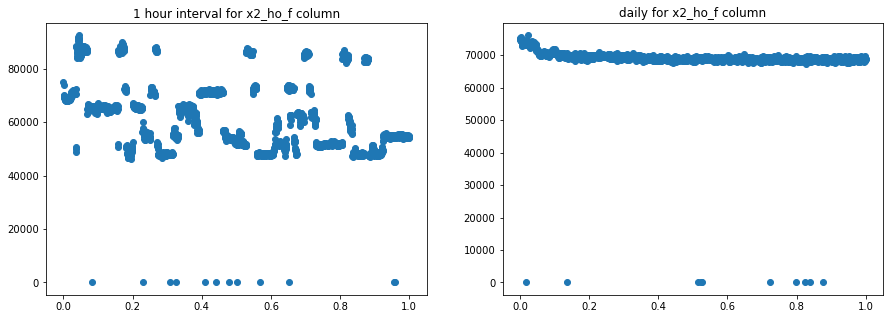

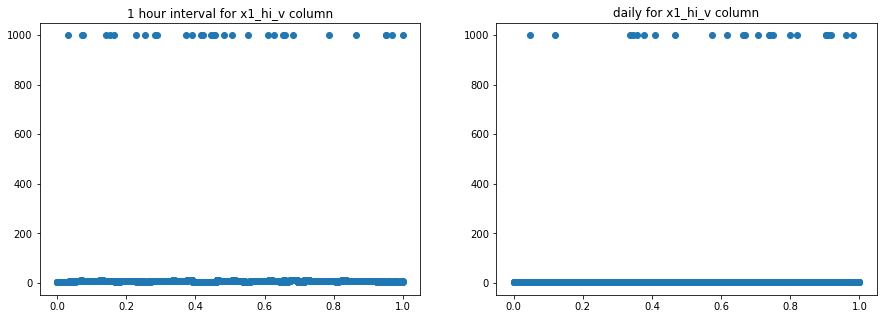

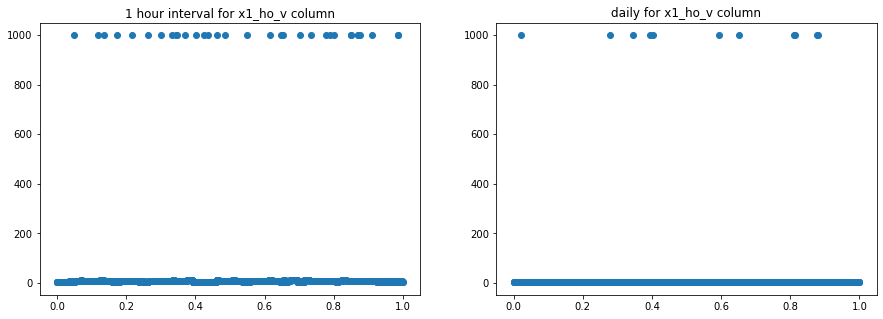

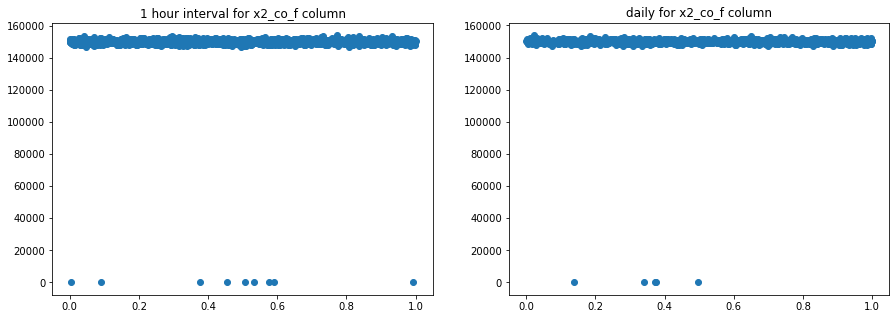

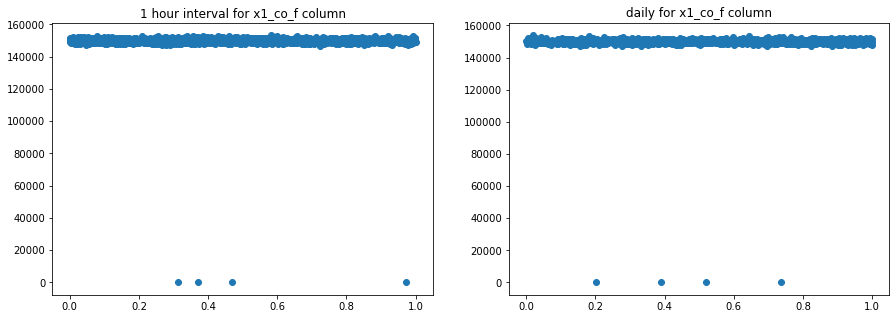

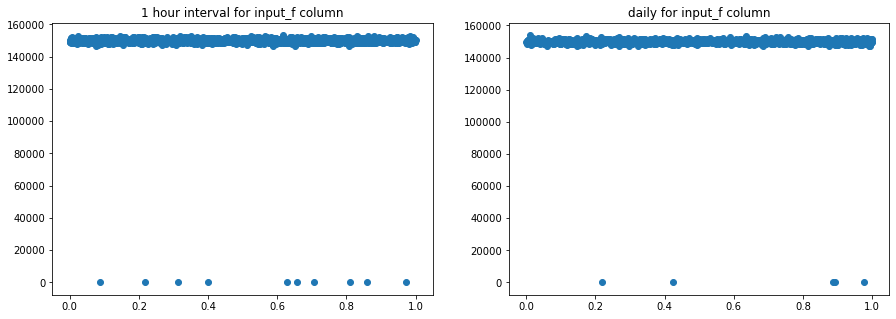

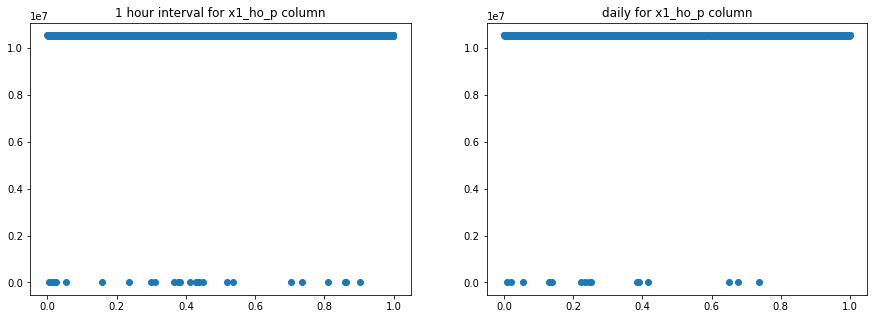

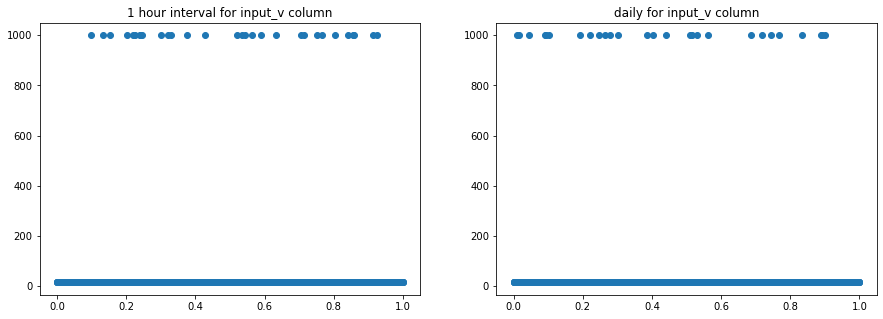

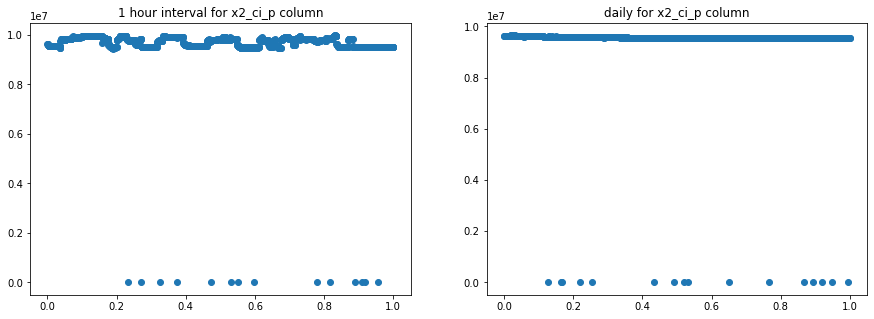

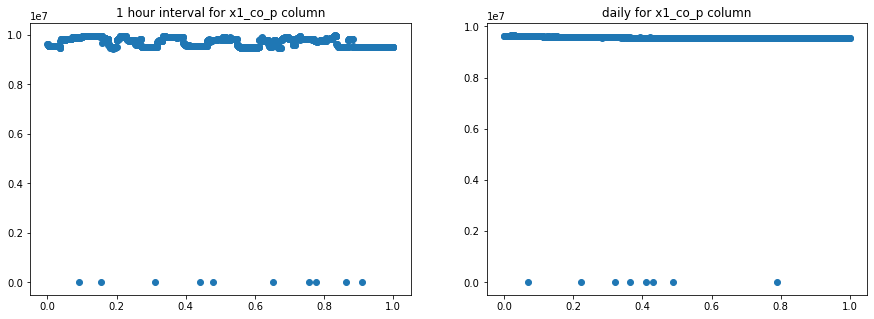

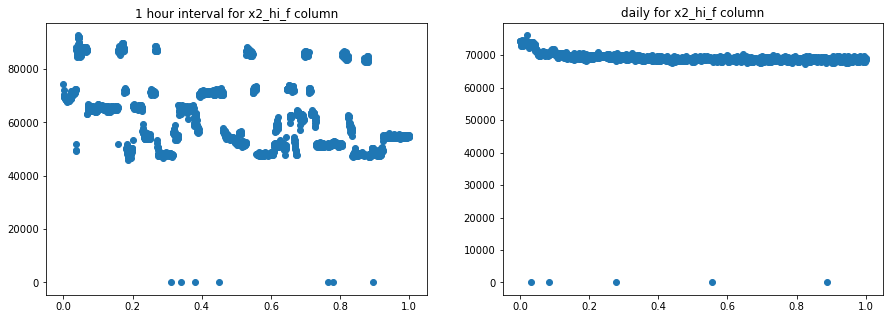

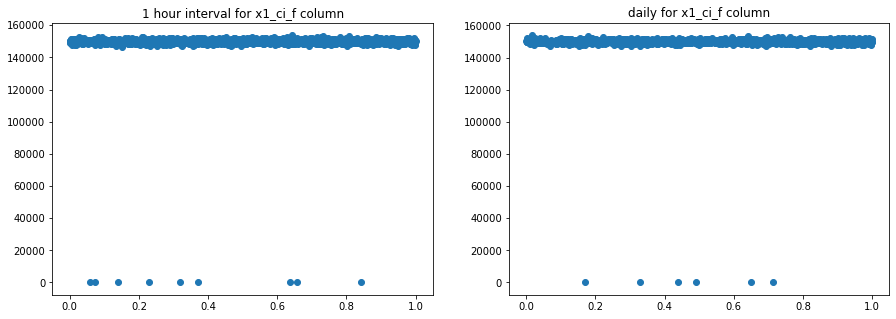

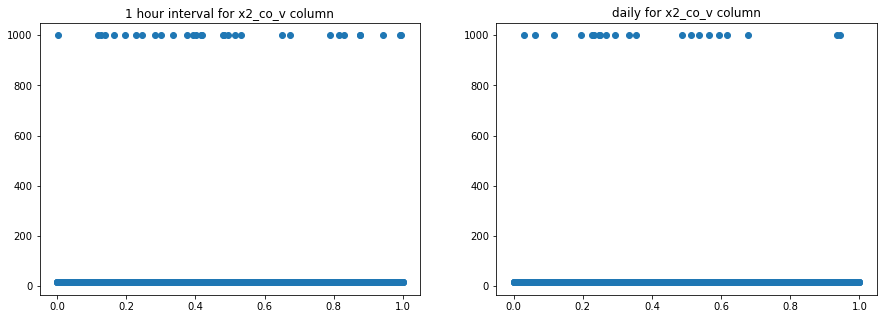

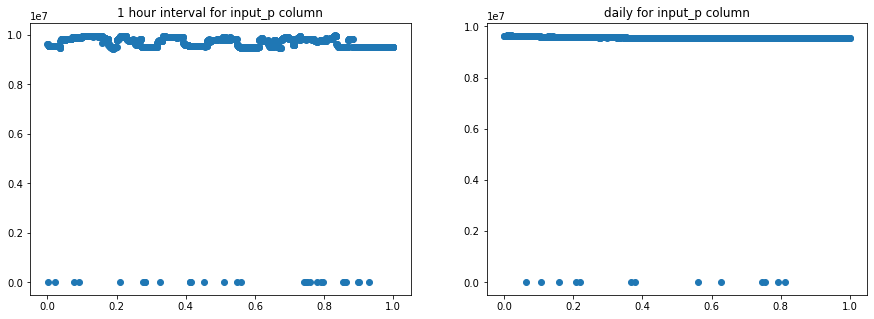

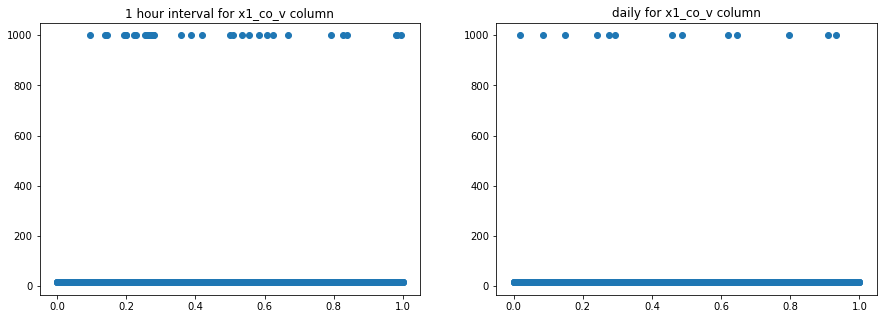

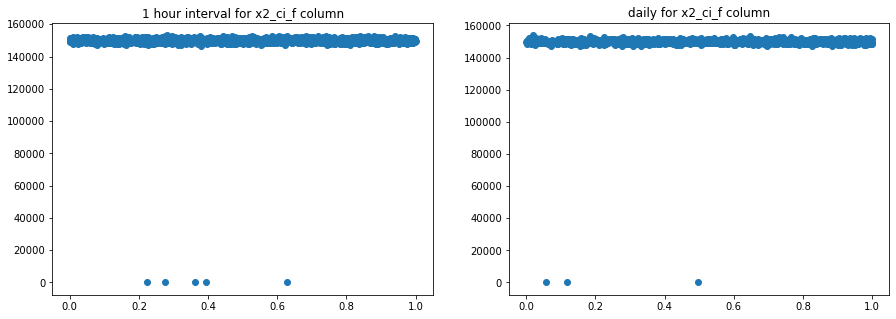

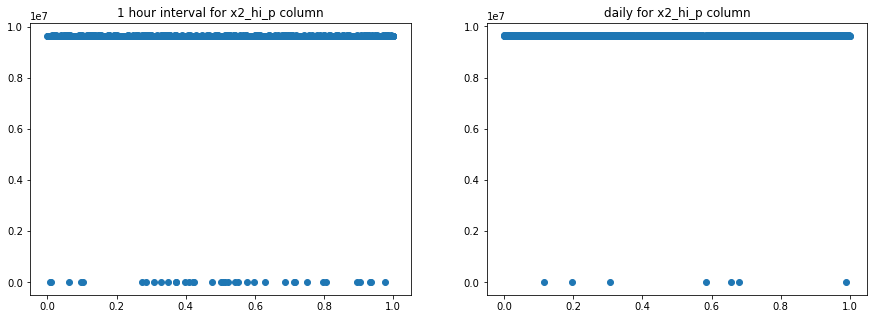

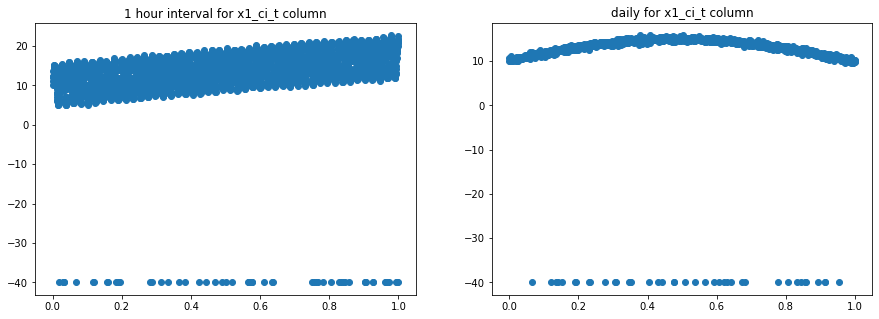

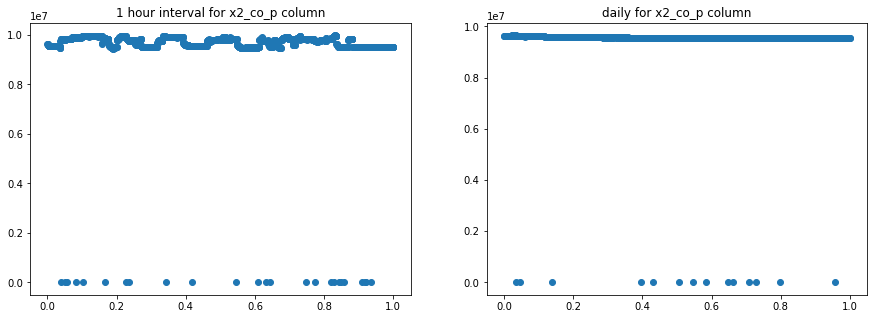

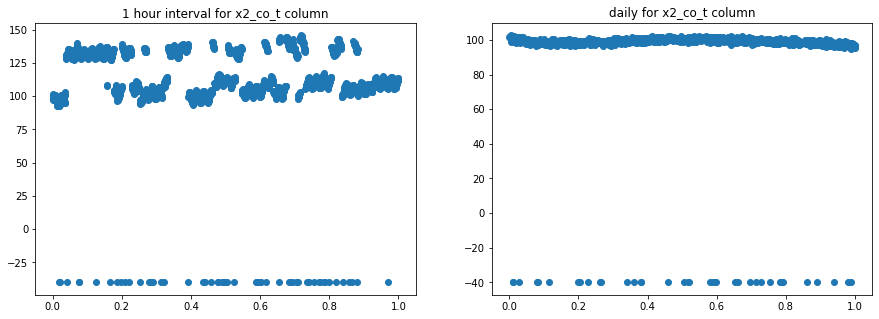

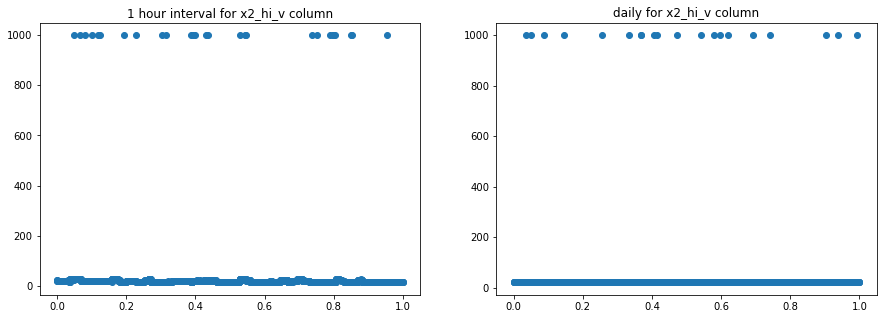

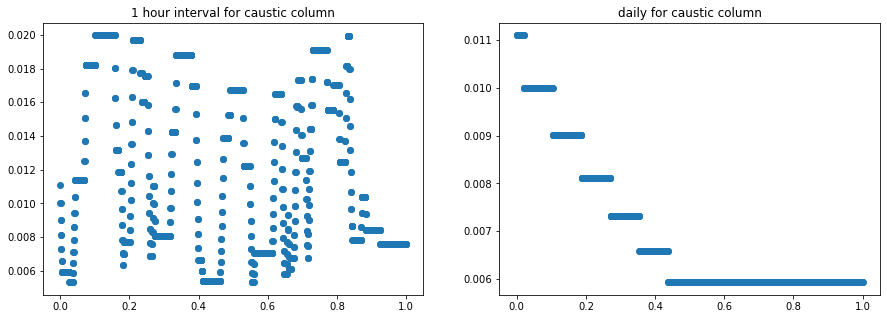

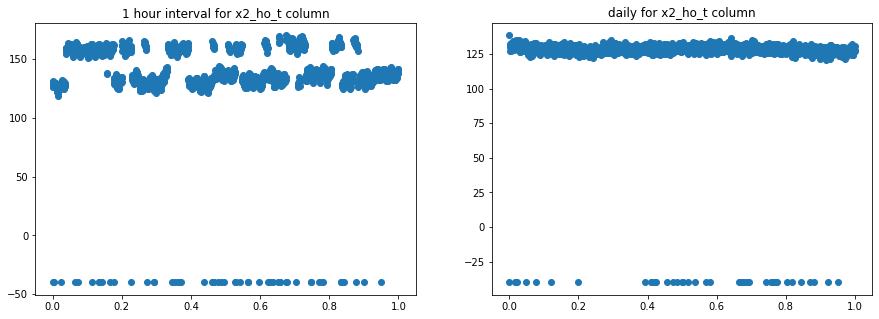

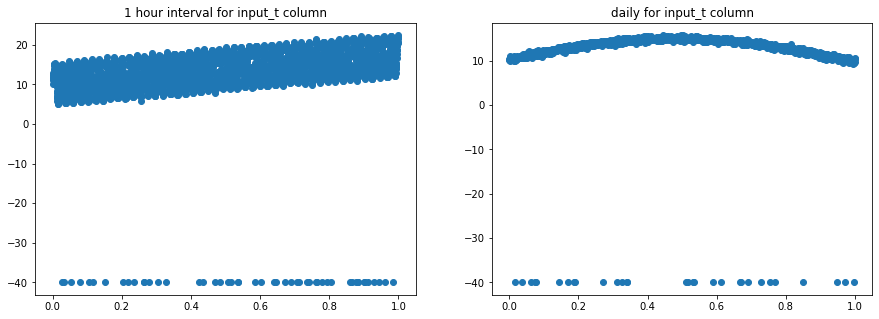

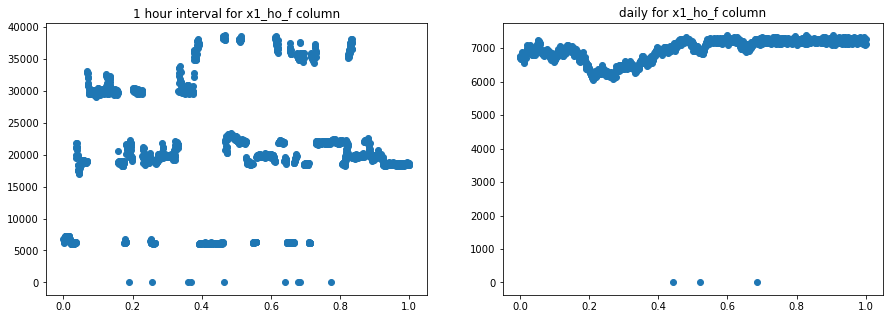

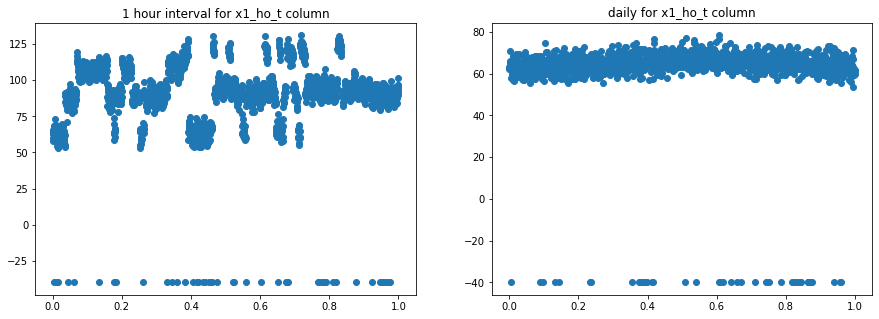

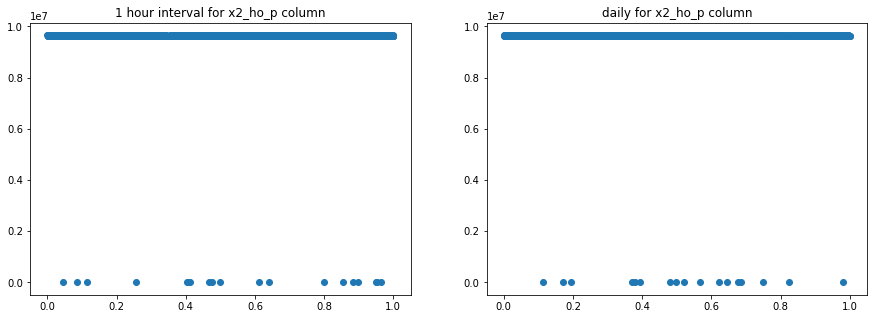

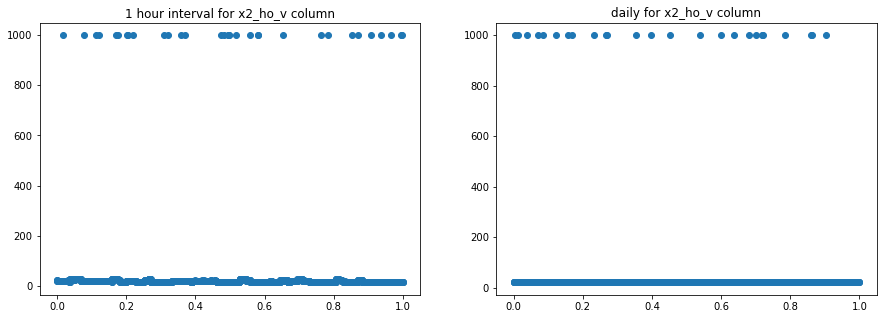

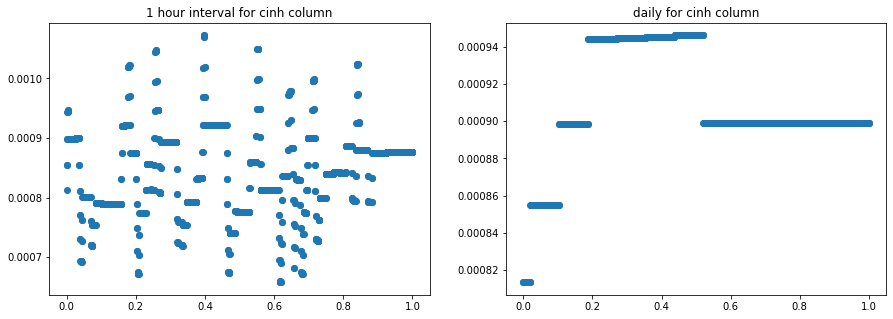

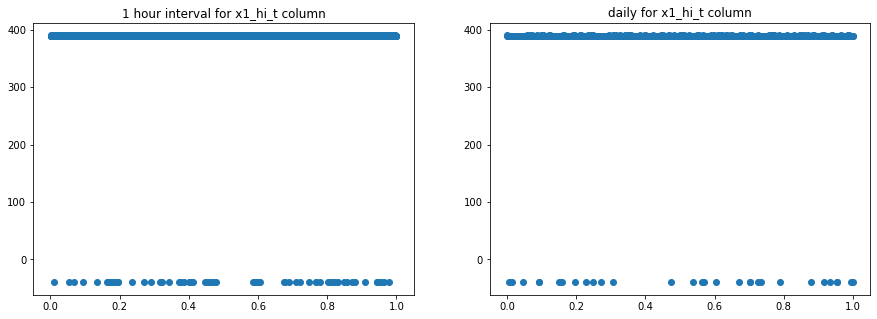

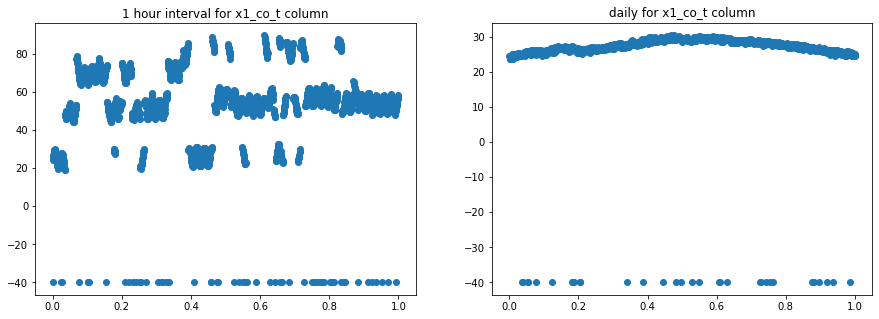

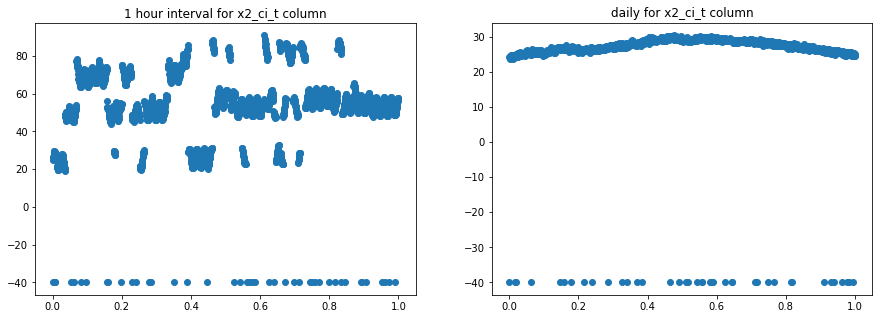

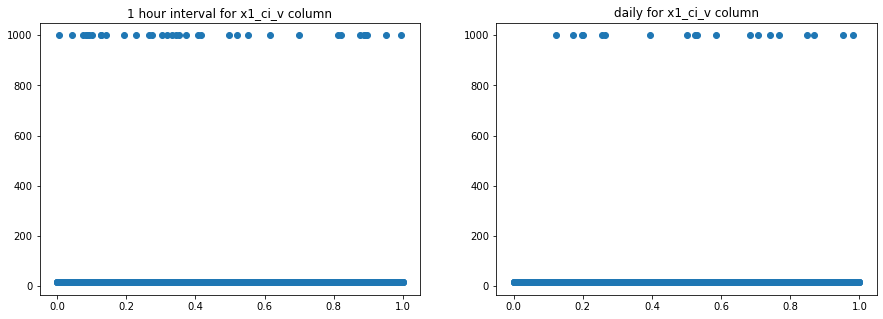

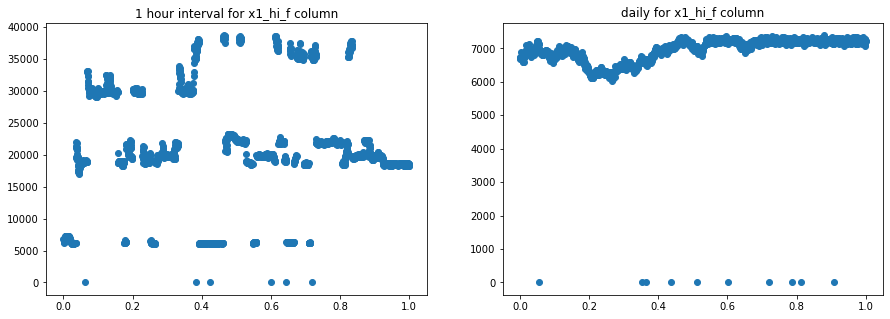

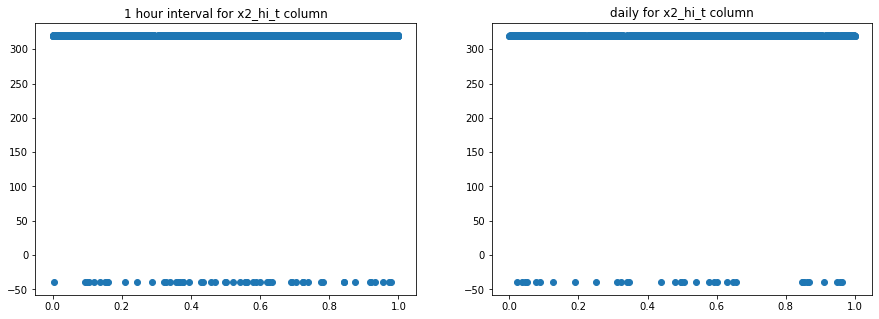

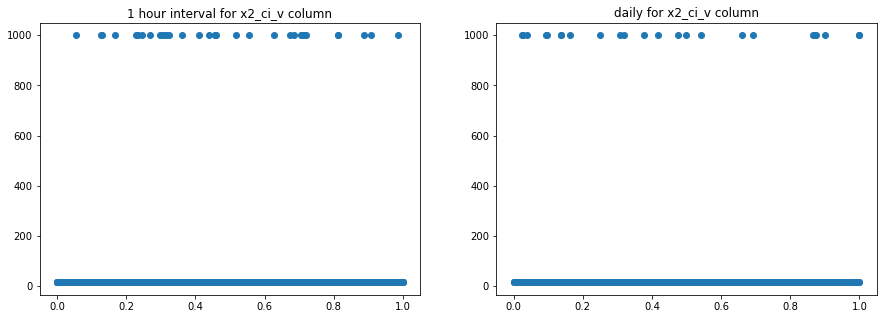

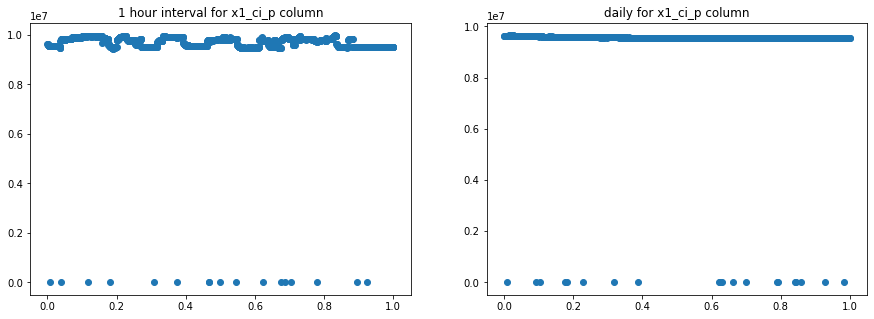

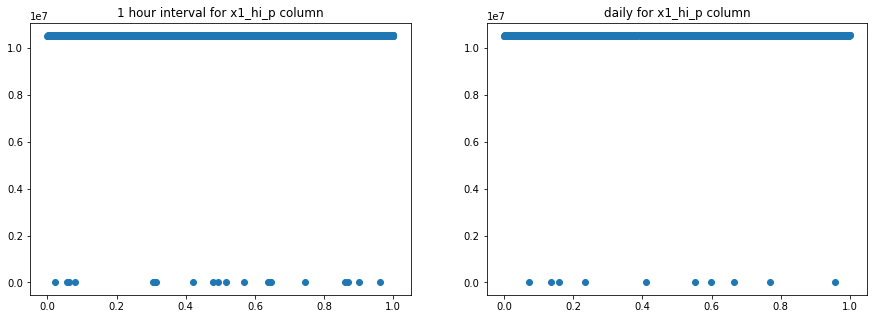

In [14]:
cols = list(set(df.columns) - {"date", "source", "fe_lab", "ph_lab"})

for col in cols:
    data = df[col]

    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].scatter(np.linspace(0,1,len(data[::60])),data[::60]) # 1 hour interval
    ax[0].set_title(f'1 hour interval for {col} column')

    ax[1].scatter(np.linspace(0,1,60*24),data[0:60*24])
    ax[1].set_title(f'daily for {col} column')

In tempretature measurement, we have daily and yearly seasonality.

We will present scatter plot of the column for 1 hour and 1 day in order to see **outliers**.

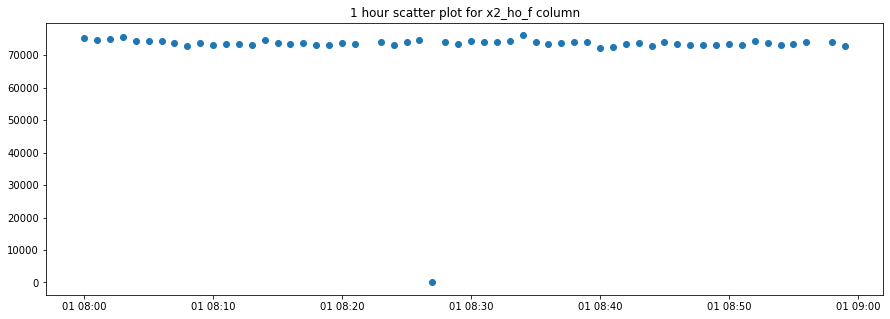

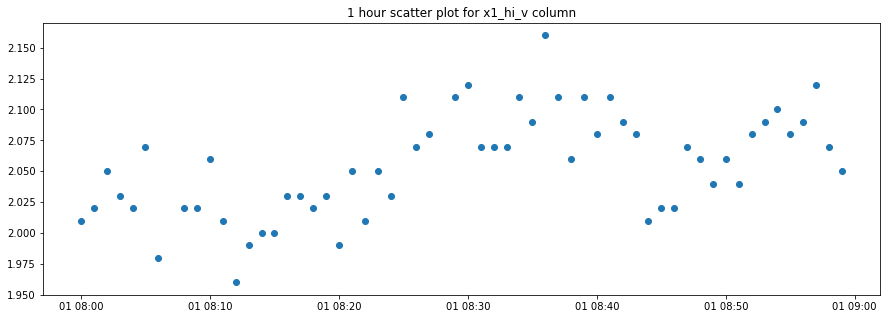

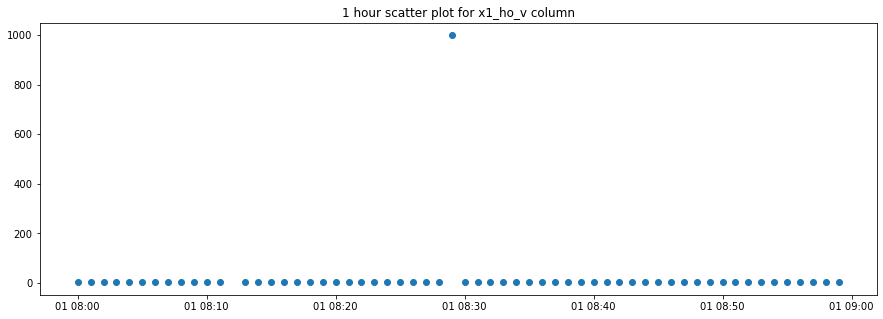

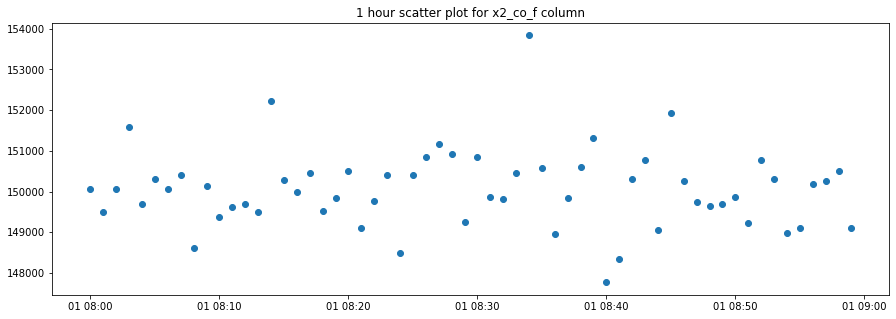

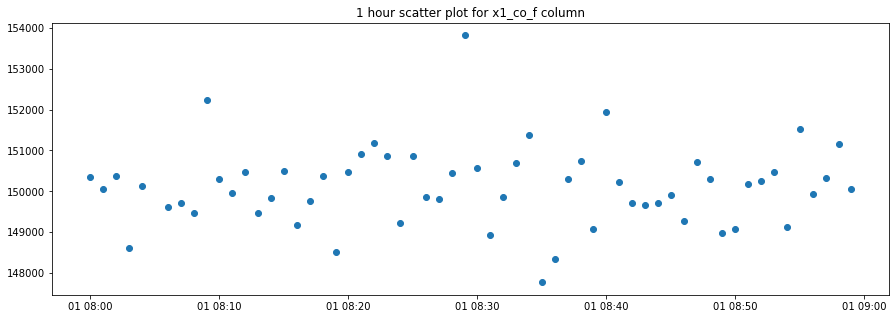

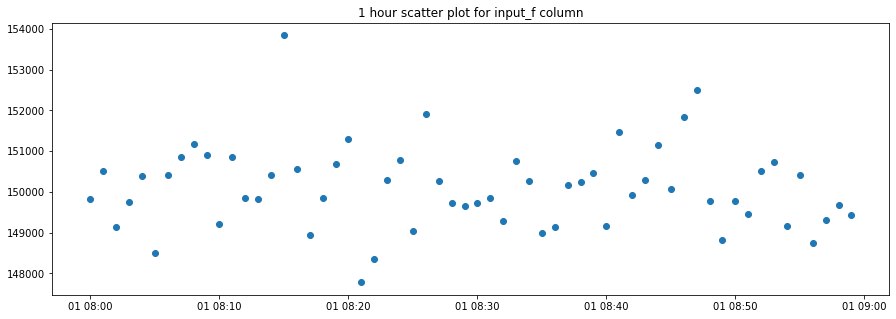

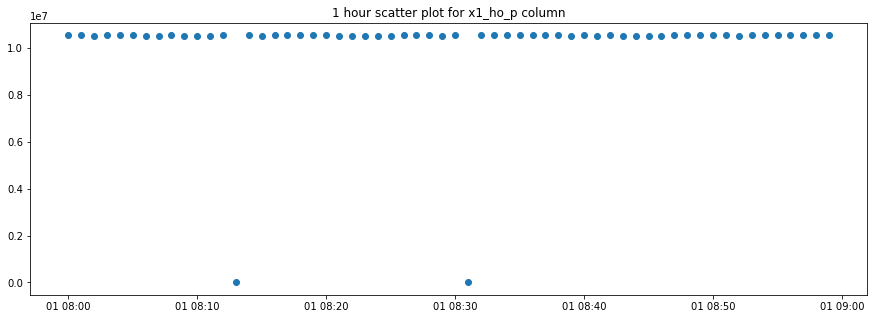

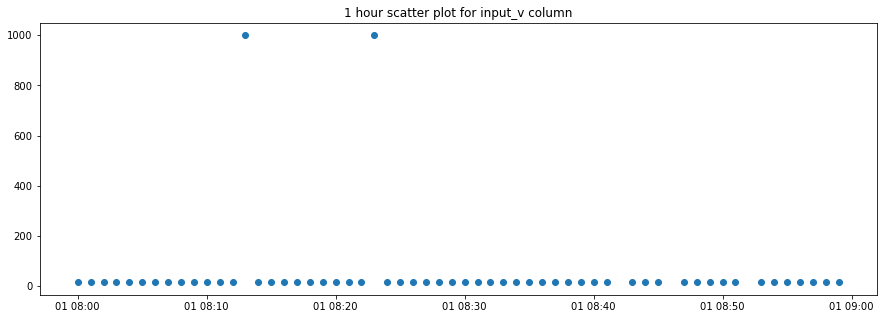

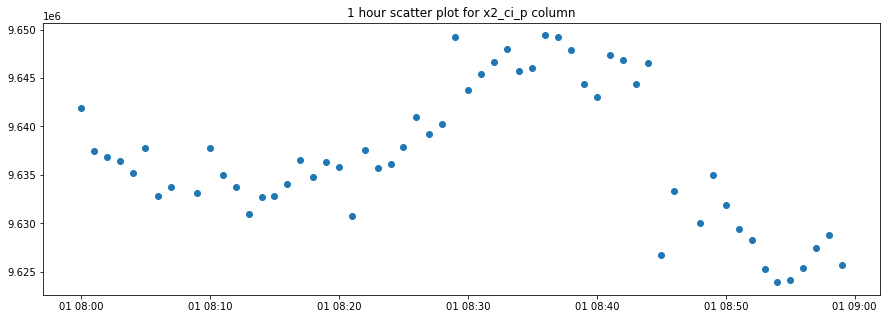

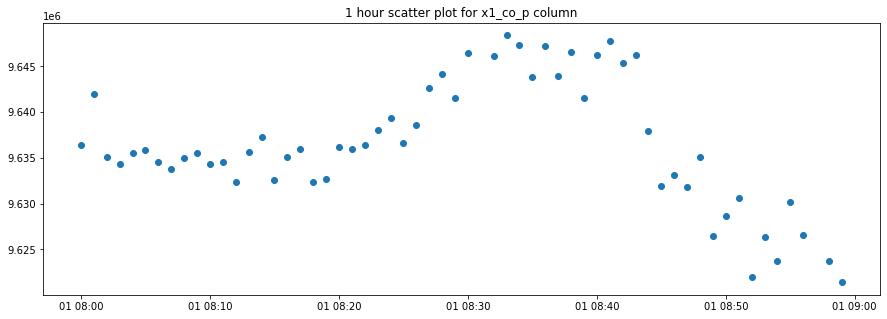

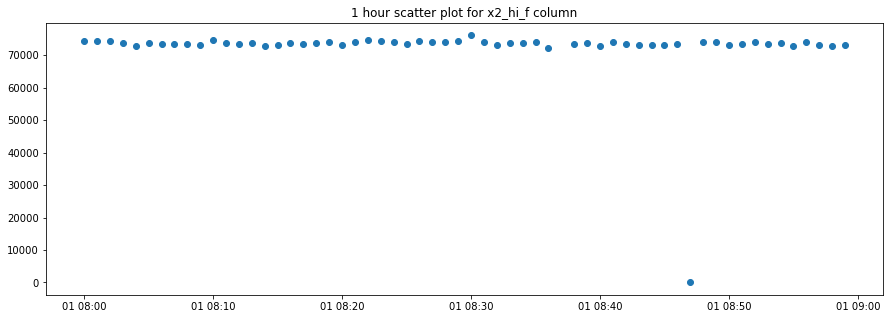

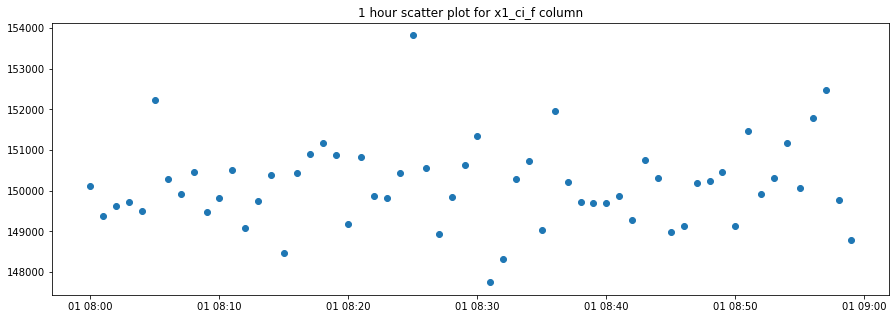

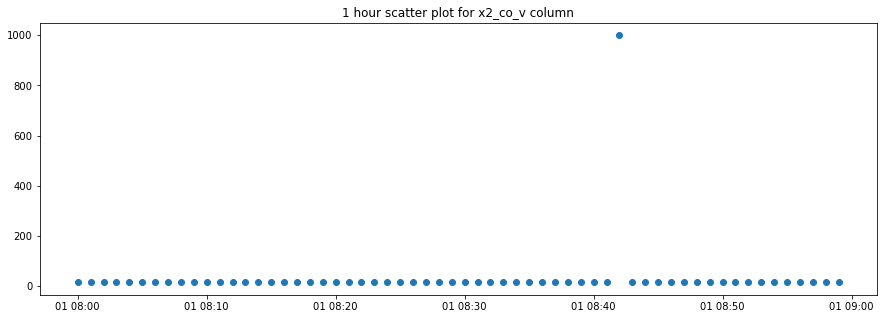

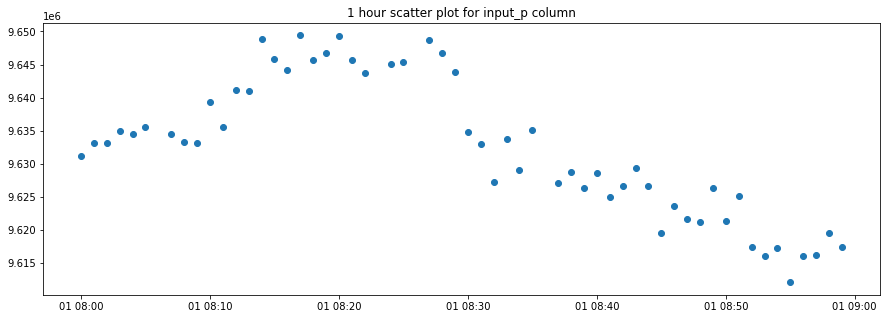

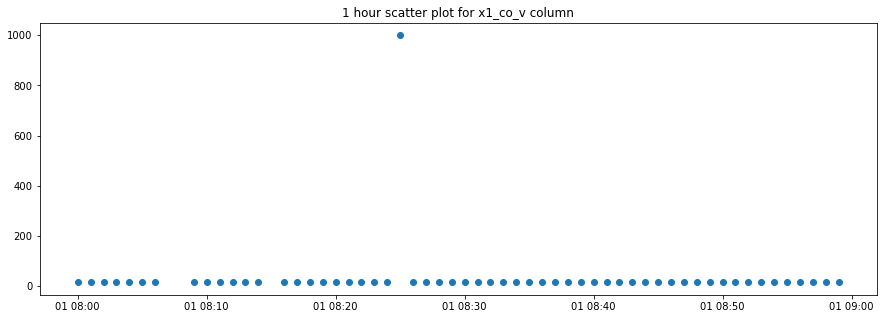

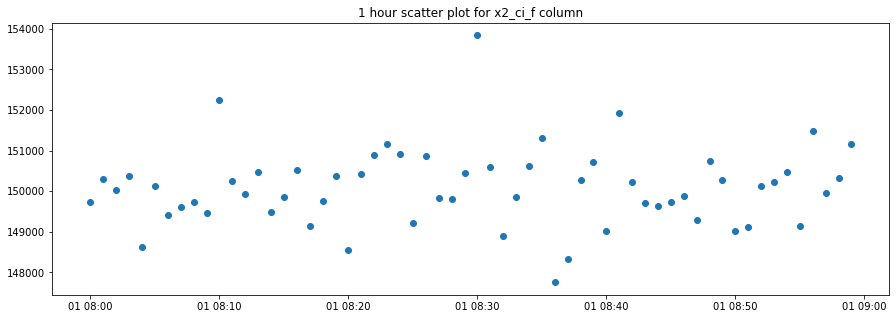

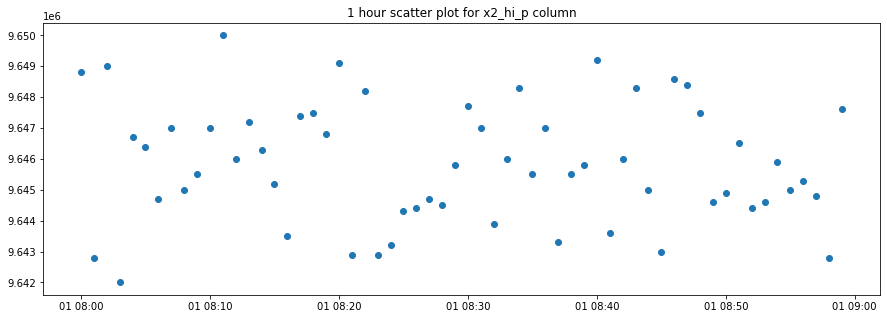

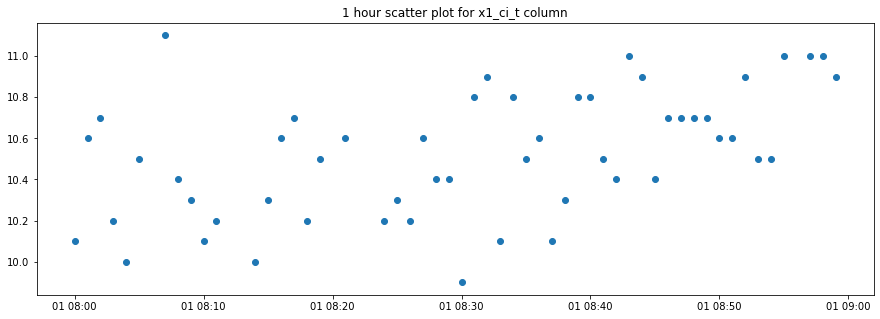

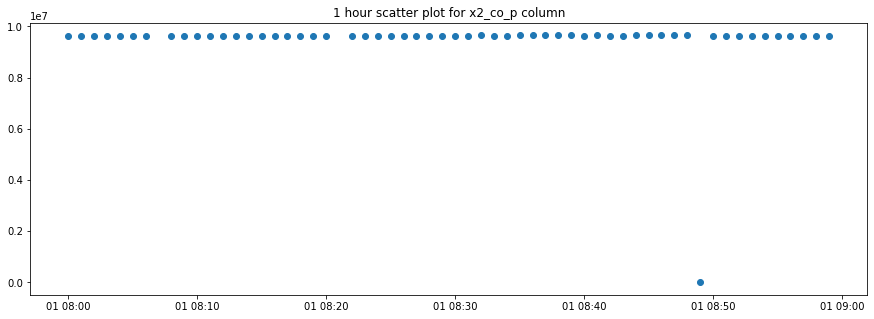

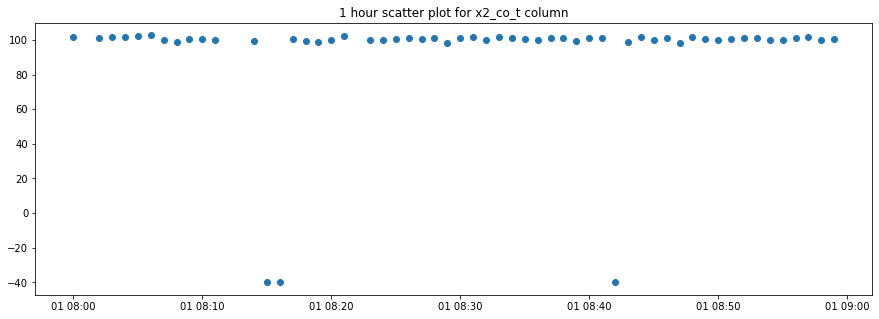

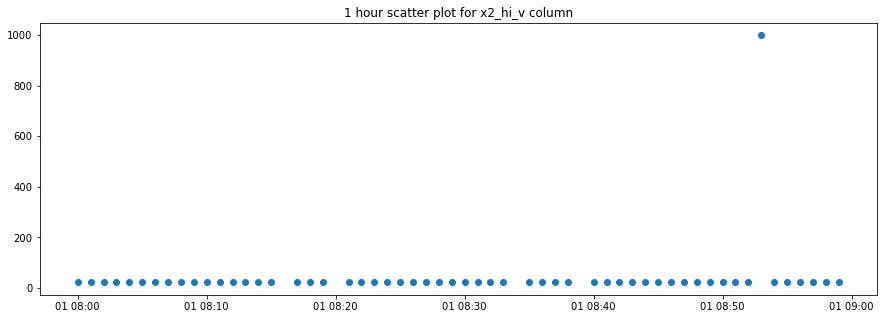

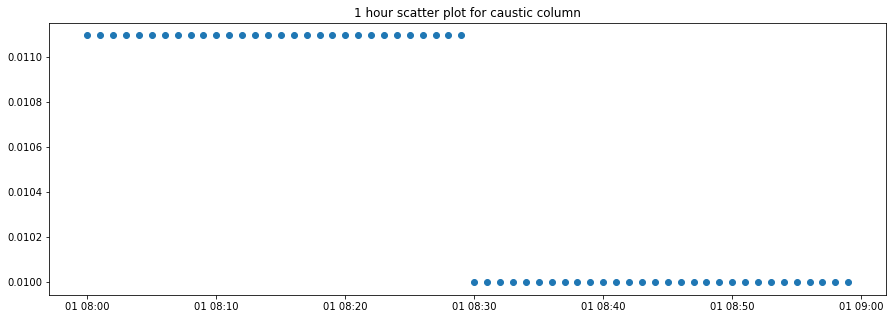

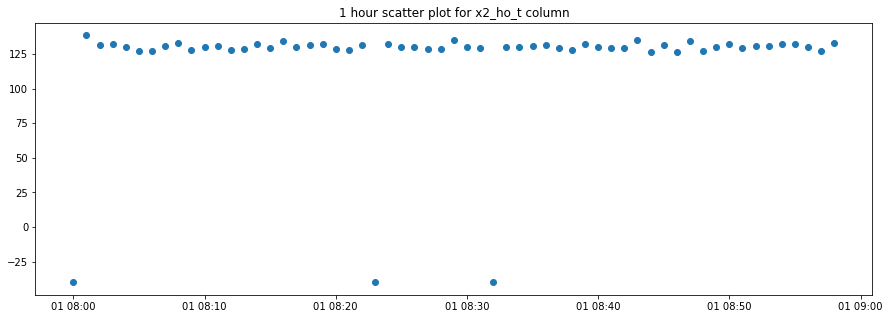

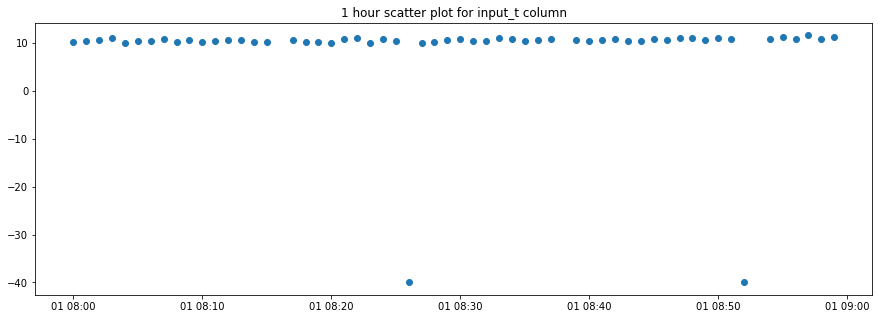

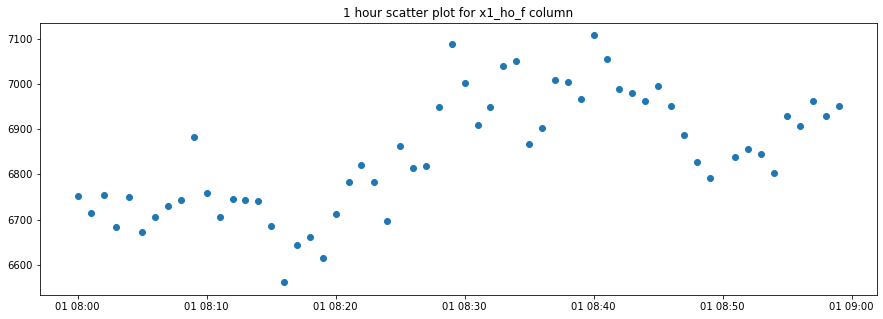

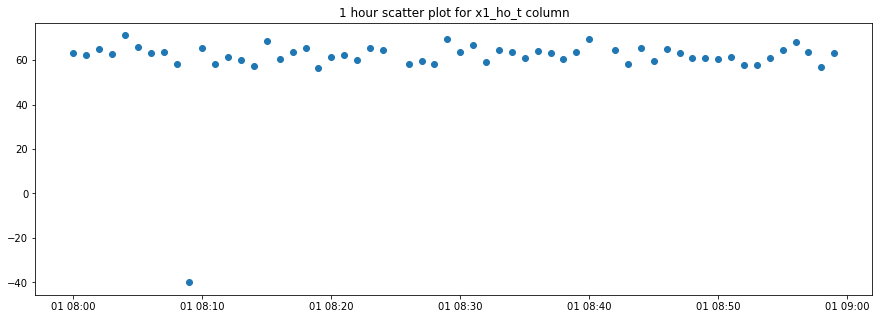

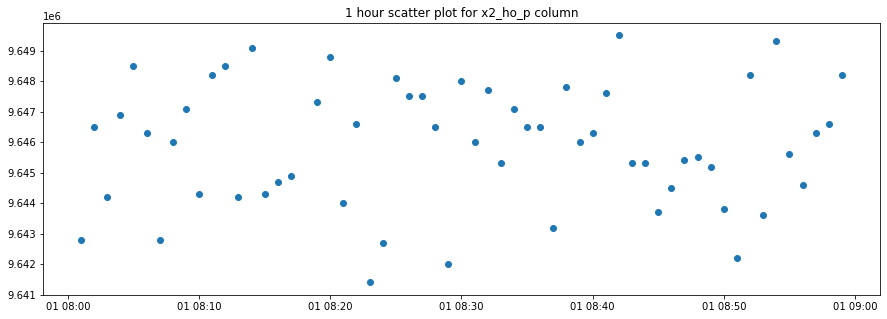

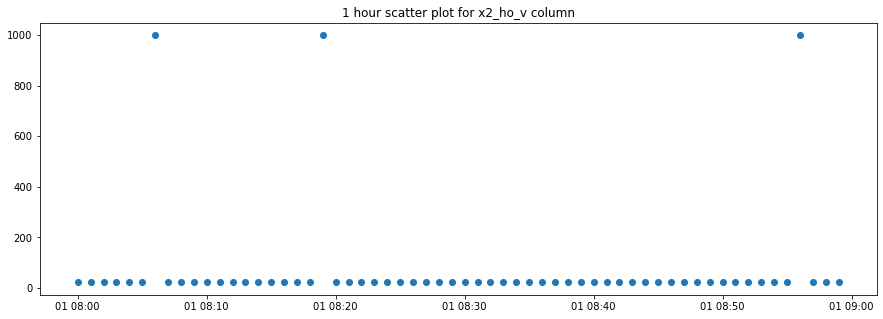

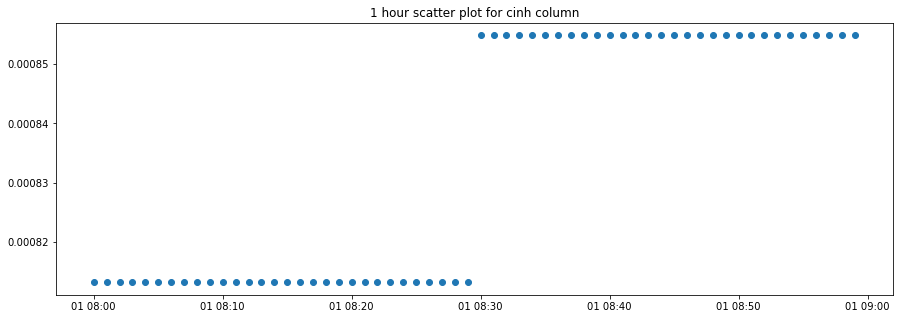

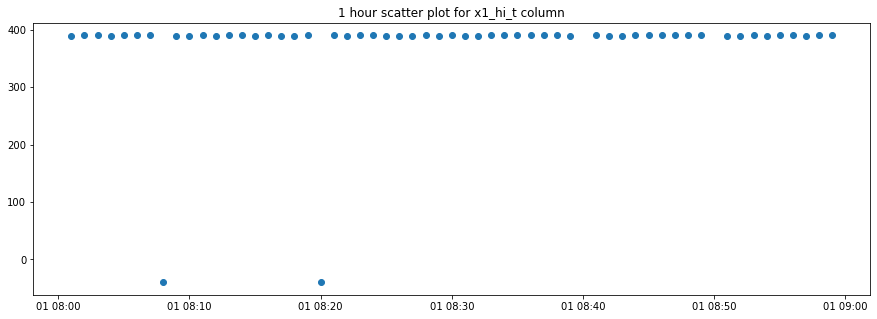

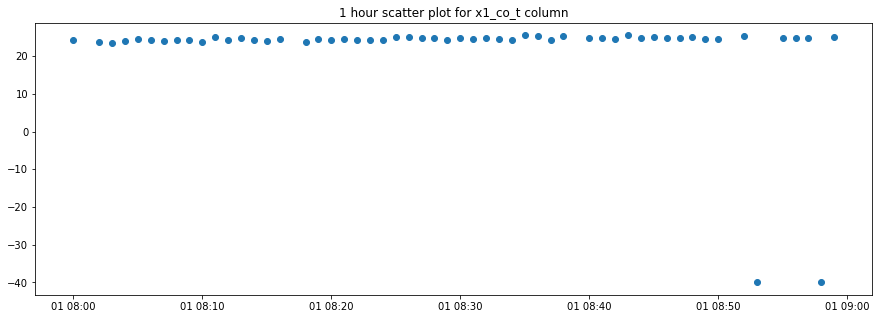

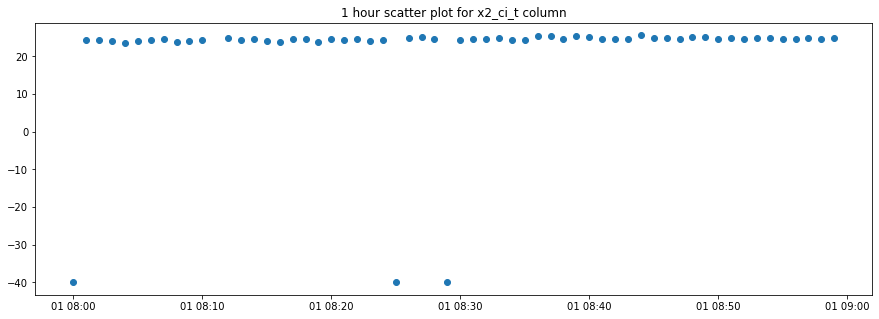

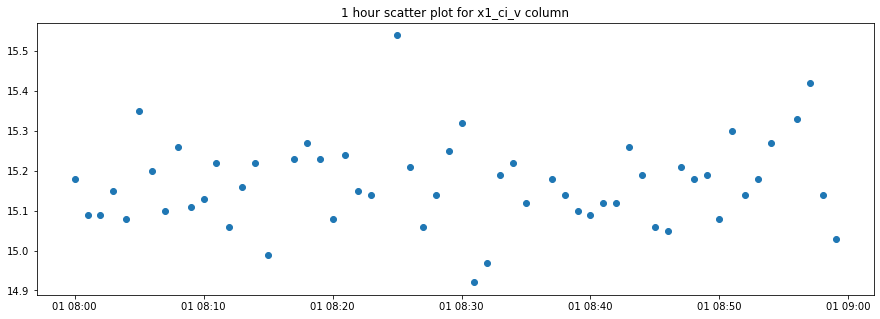

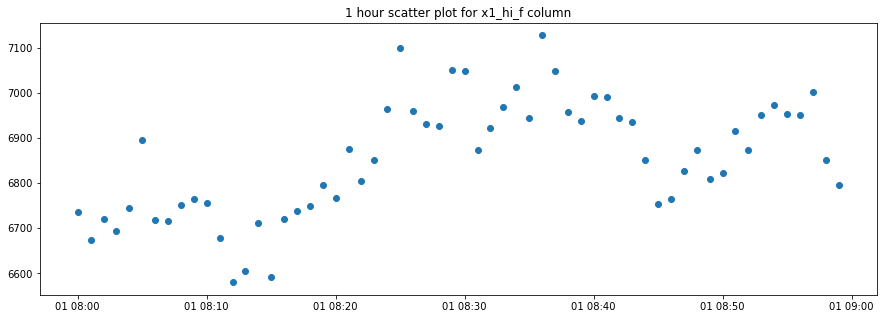

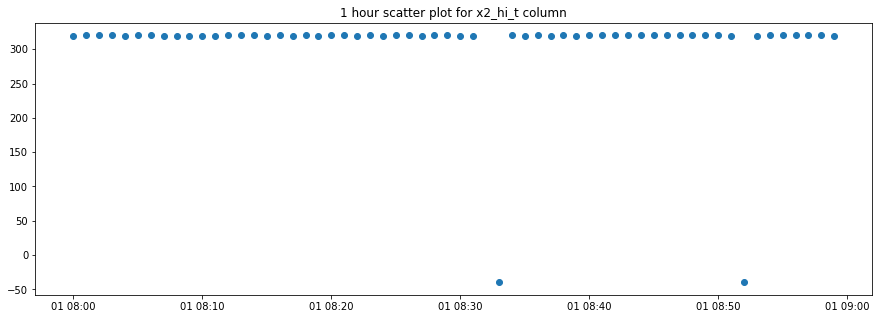

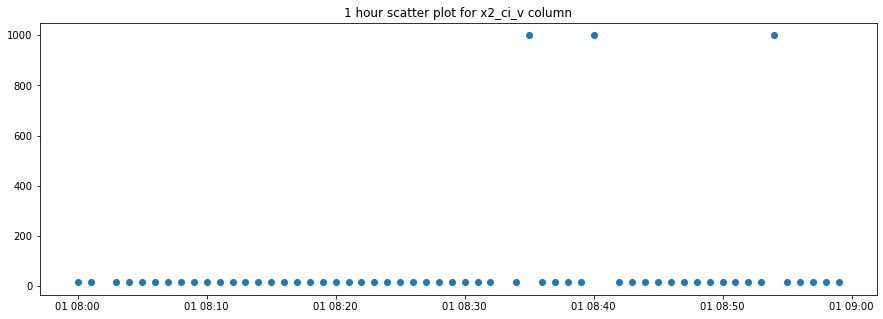

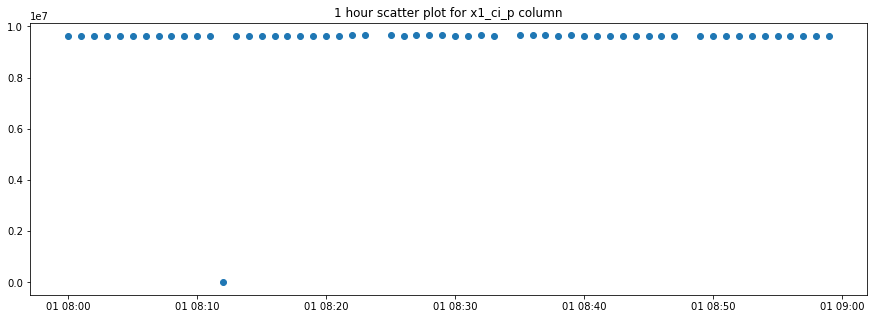

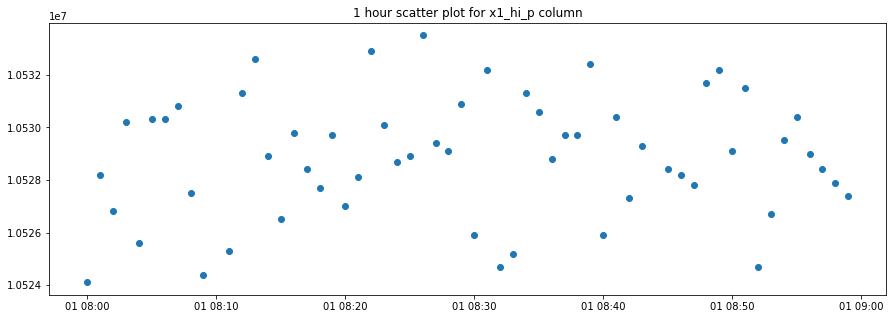

In [15]:
col = cols[0]
# plot(df.date, df.loc[:,col])

for col in cols:
    data = df[col]
    dates = df.date

    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    ax.scatter(dates[0:60],data[0:60]) # 1 hour interval
    ax.set_title(f'1 hour scatter plot for {col} column')


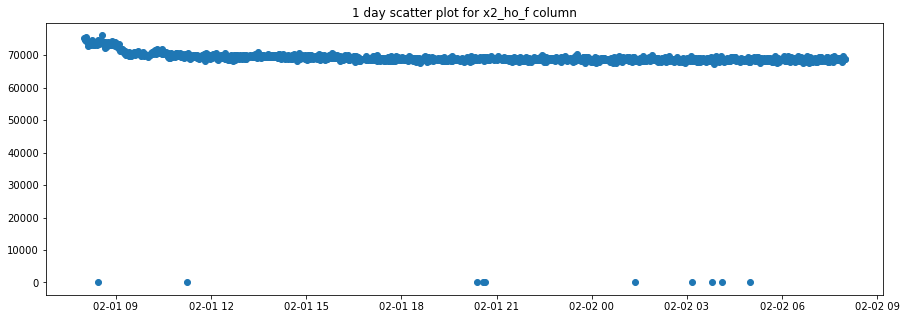

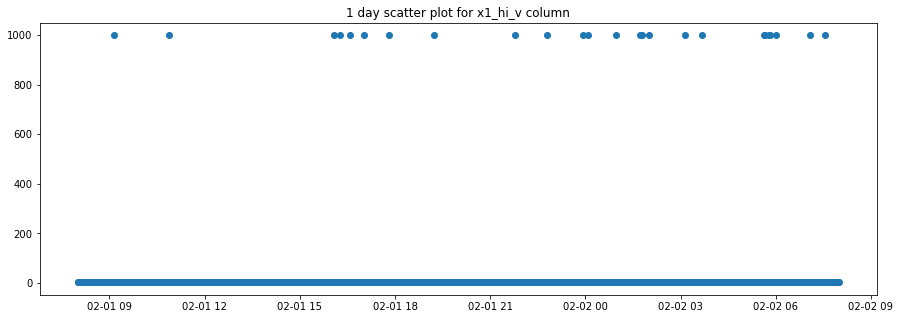

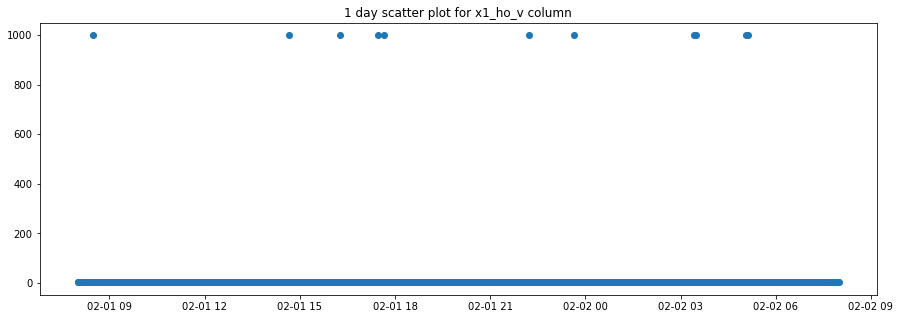

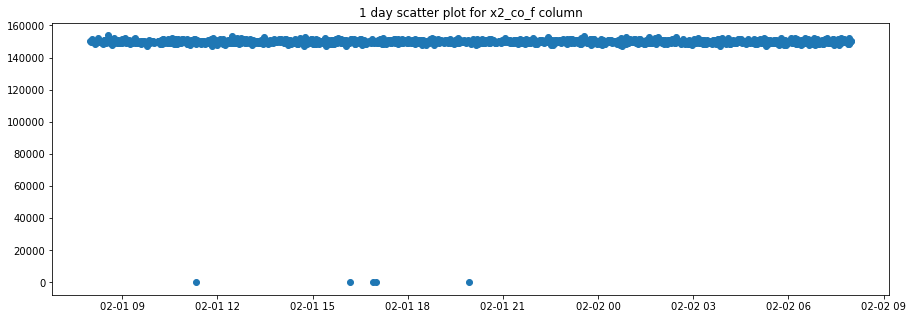

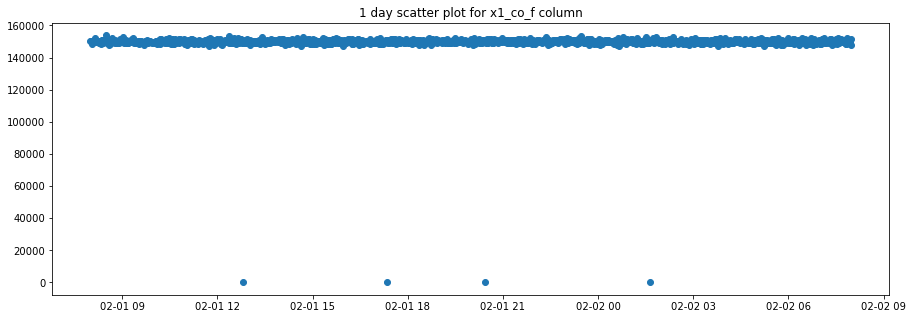

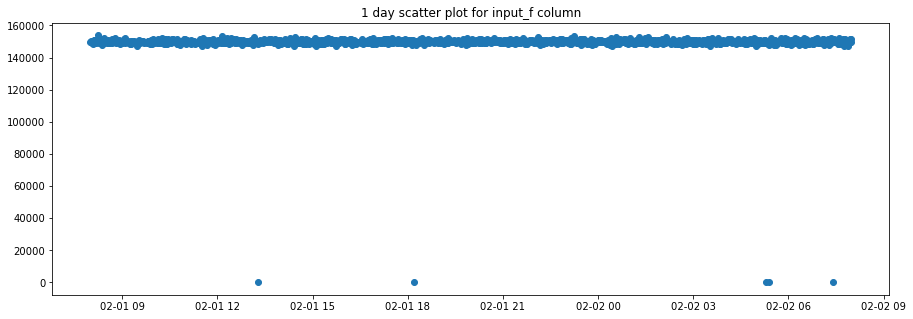

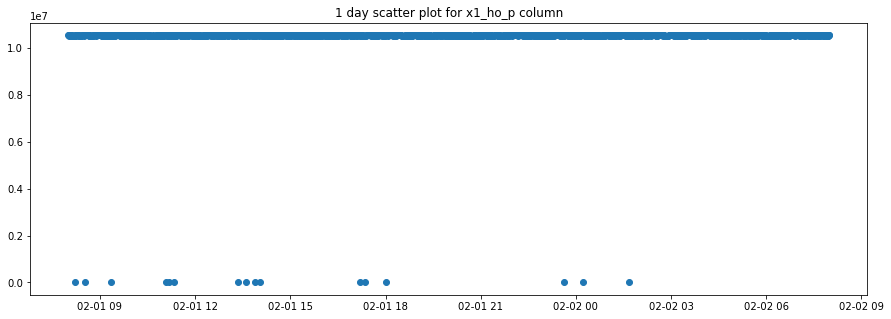

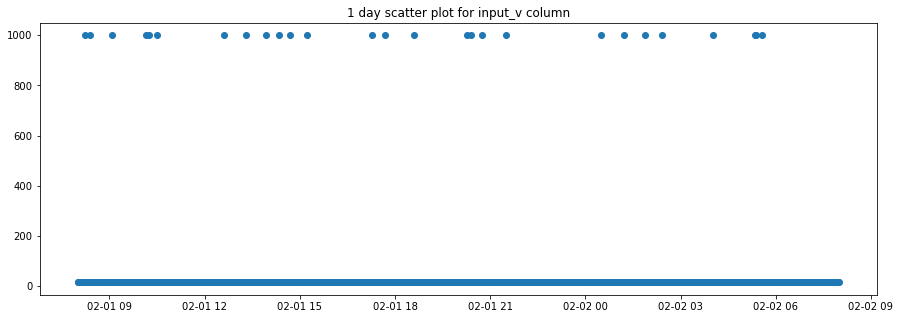

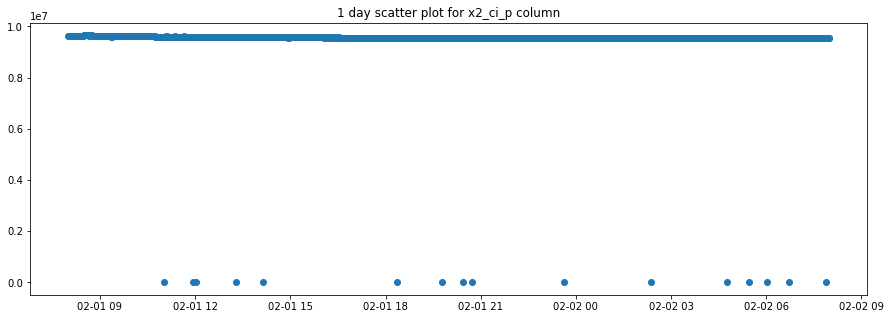

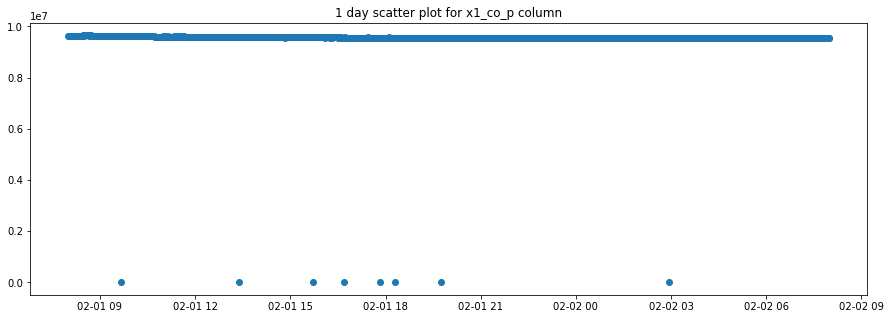

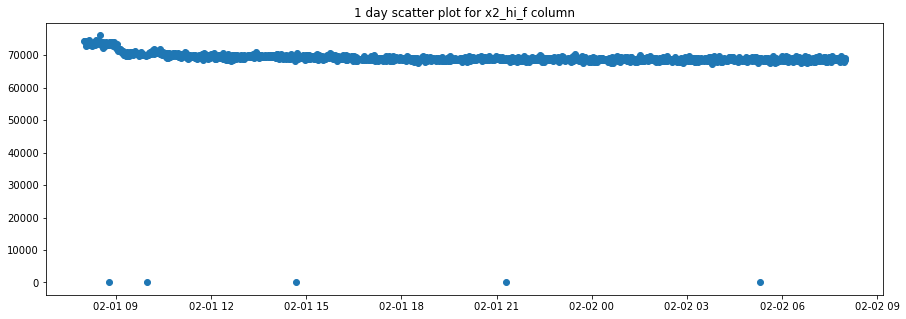

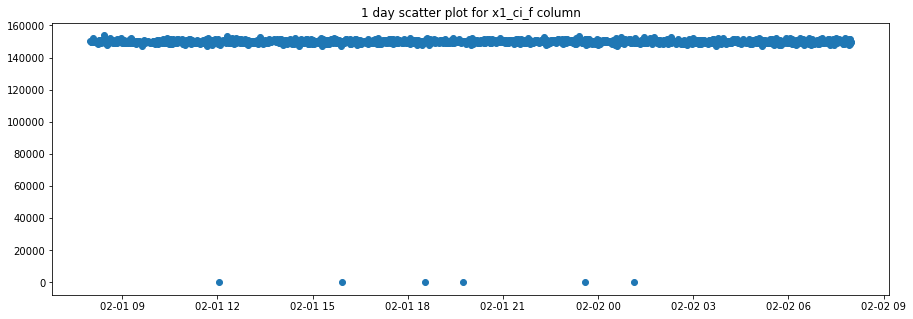

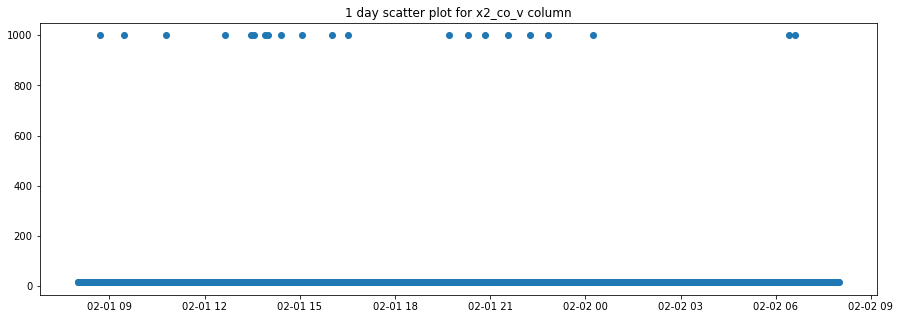

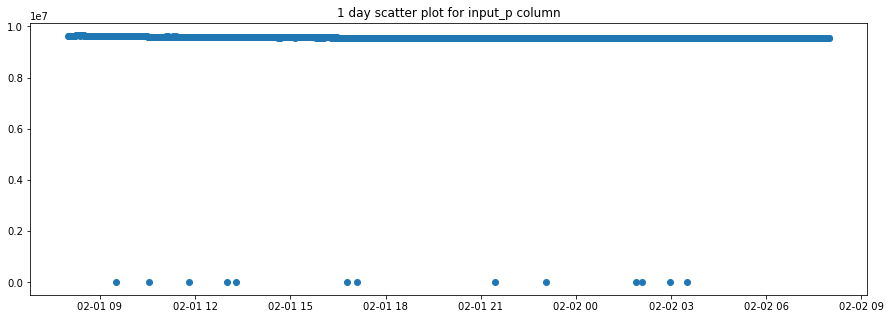

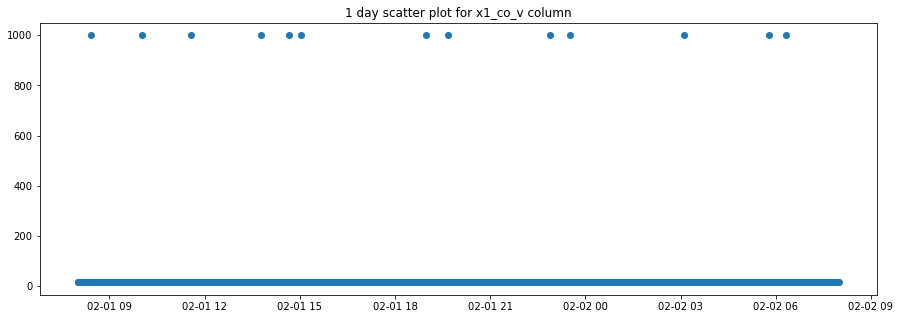

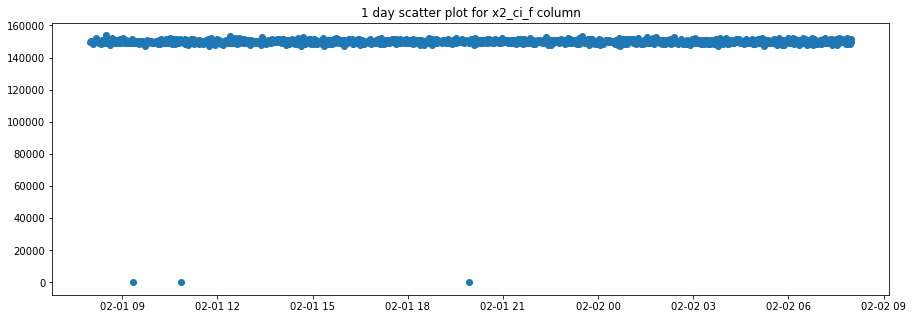

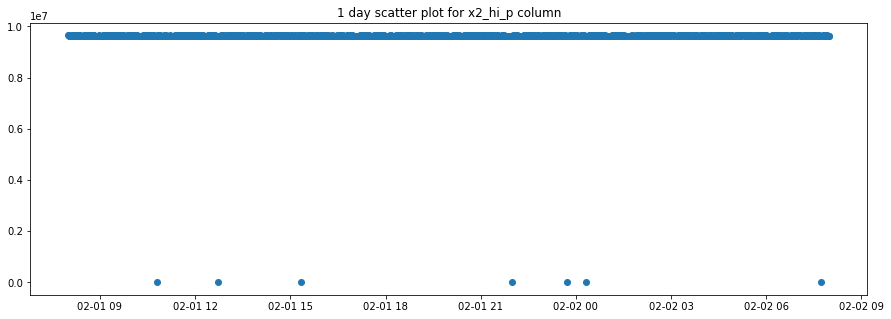

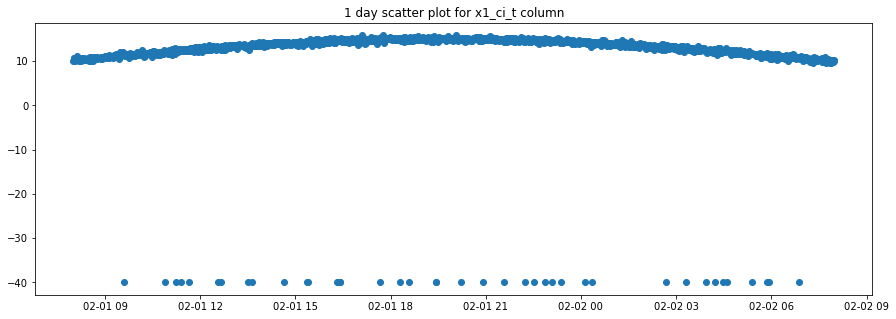

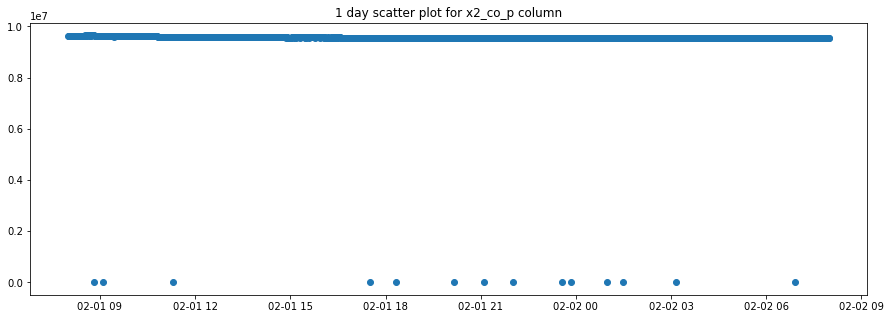

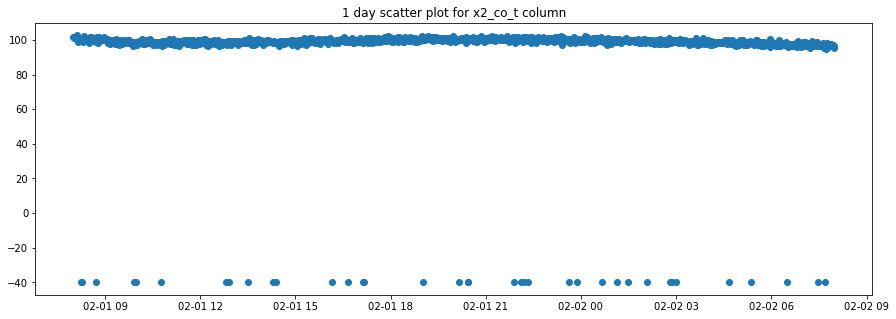

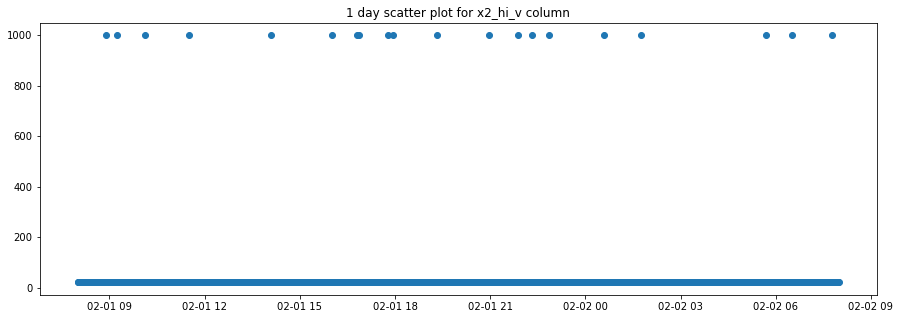

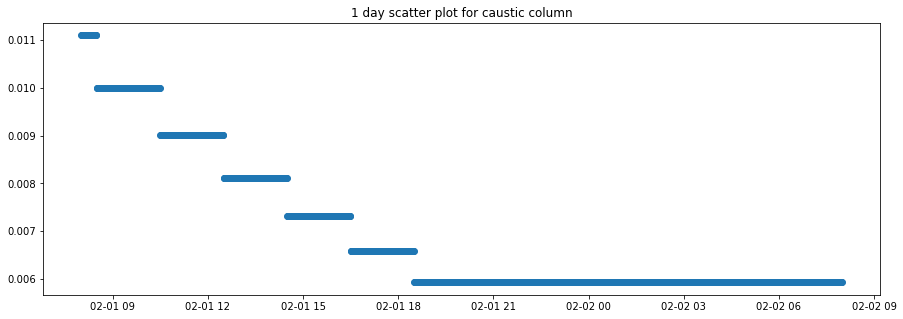

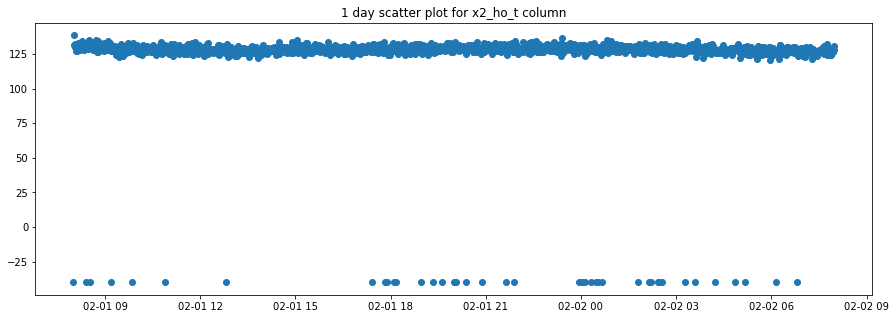

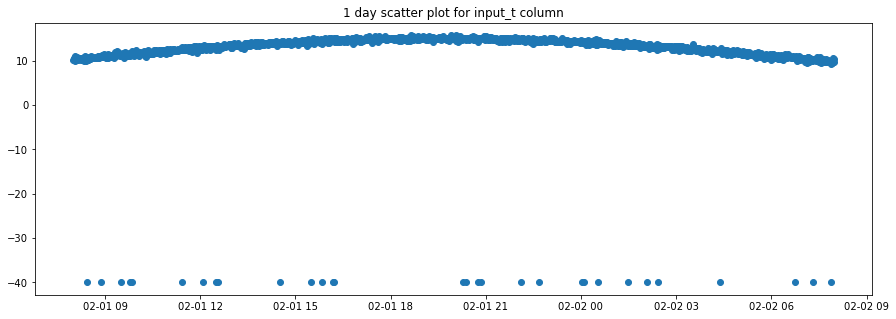

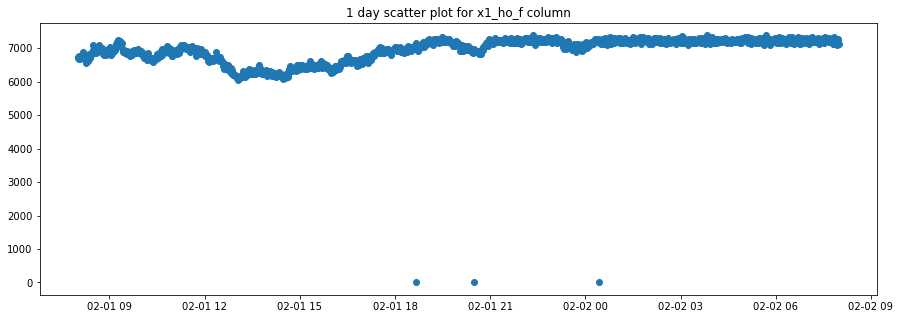

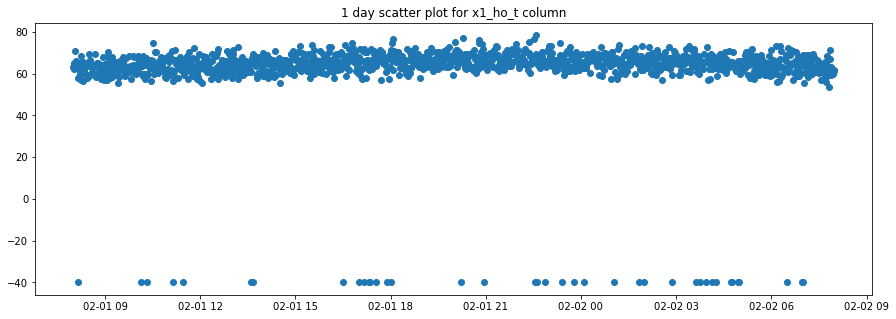

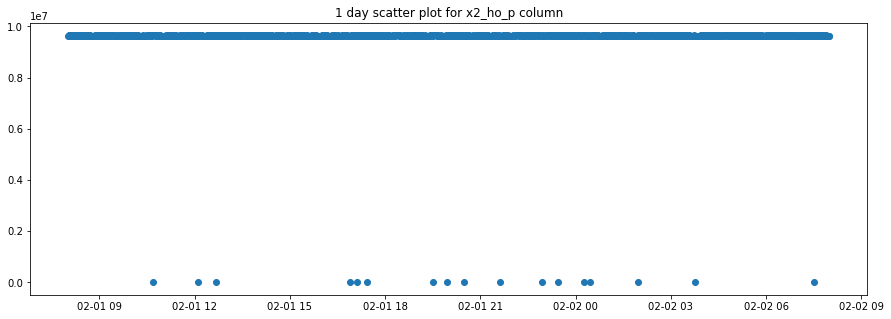

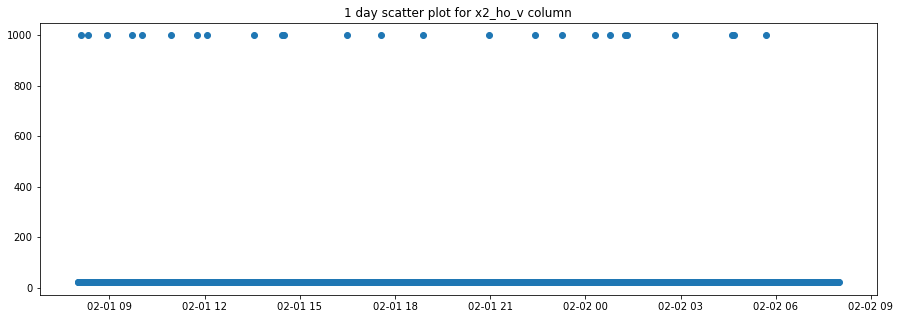

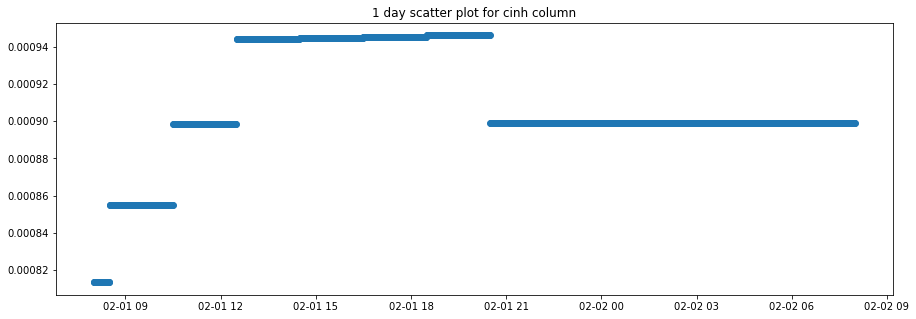

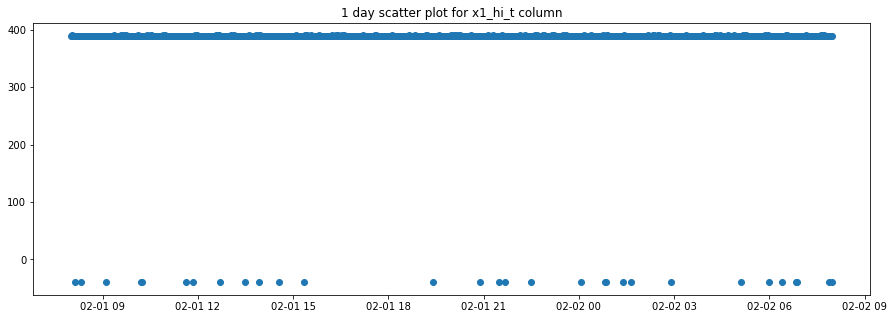

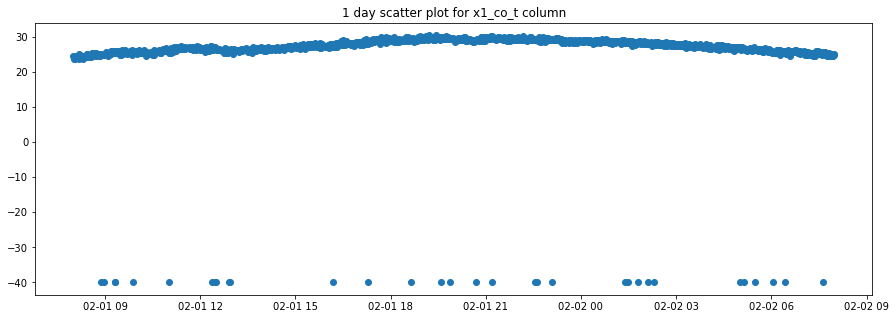

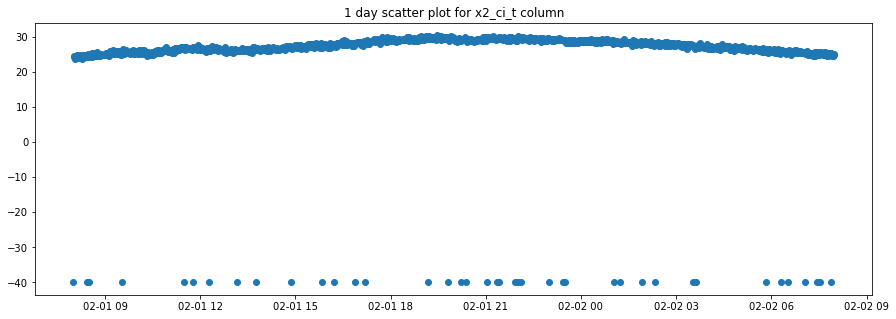

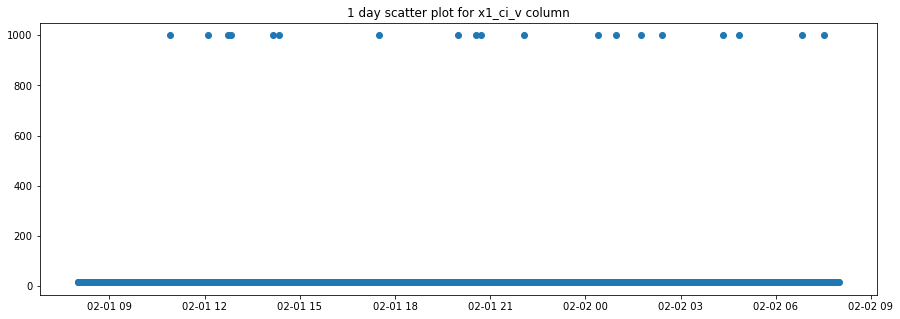

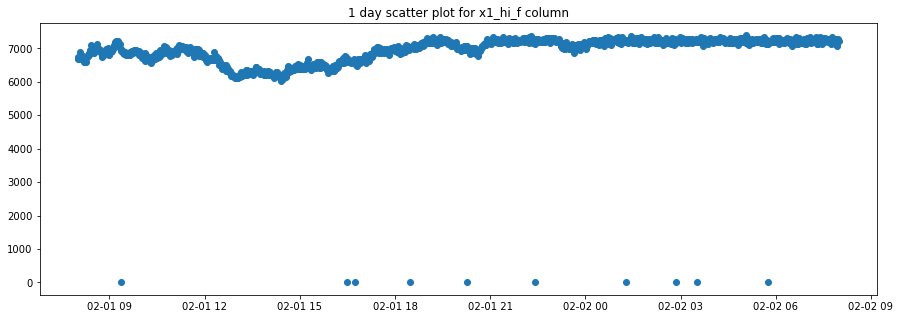

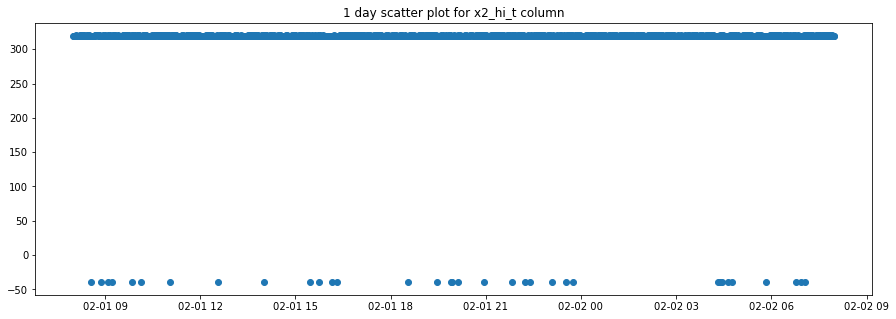

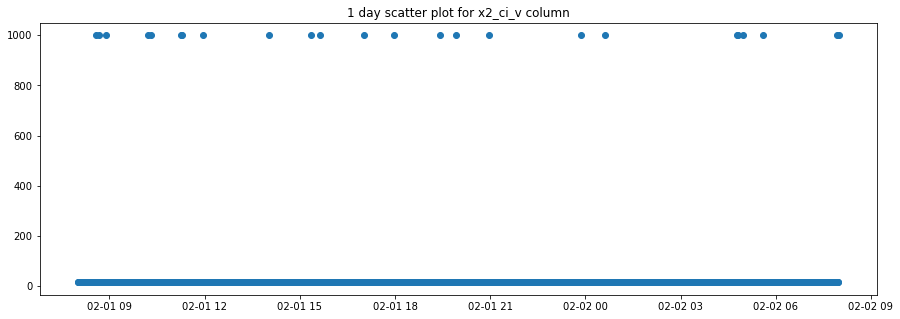

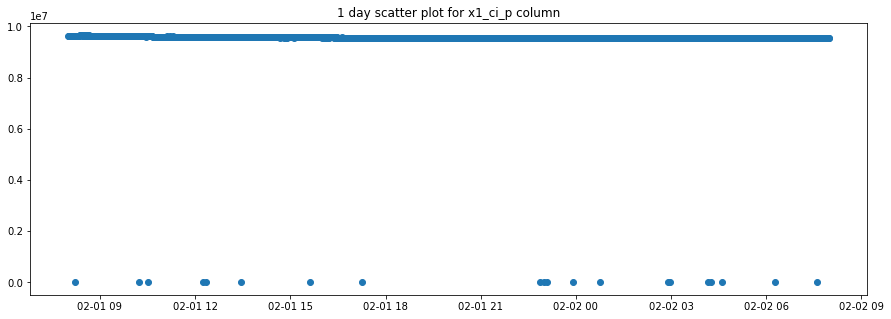

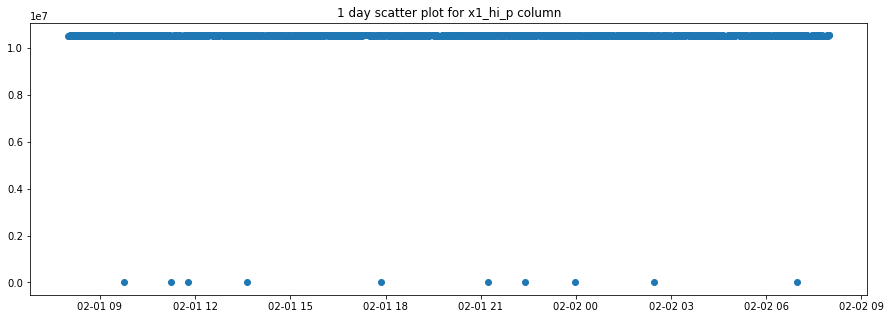

In [16]:
col = cols[0]
# plot(df.date, df.loc[:,col])

for col in cols:
    data = df[col]
    dates = df.date

    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    ax.scatter(dates[0:60*24],data[0:60*24]) # 1 hour interval
    ax.set_title(f'1 day scatter plot for {col} column')


We have outliers in **all columns** except **cinh**, **caustic**, **fe_lab**, **ph_lab**. These outliers may be due to the sensor error. These outliers are meaningless. Therefore they are called as disguised missing data. These disguised missing data can also be obtained from q-q plots which are presented below. We consider these values as a missing value.

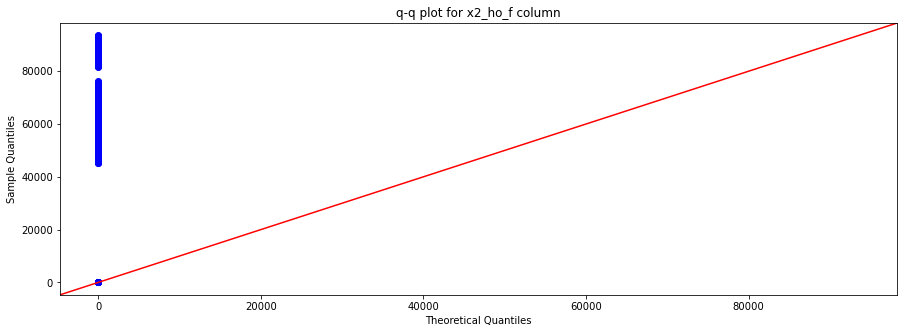

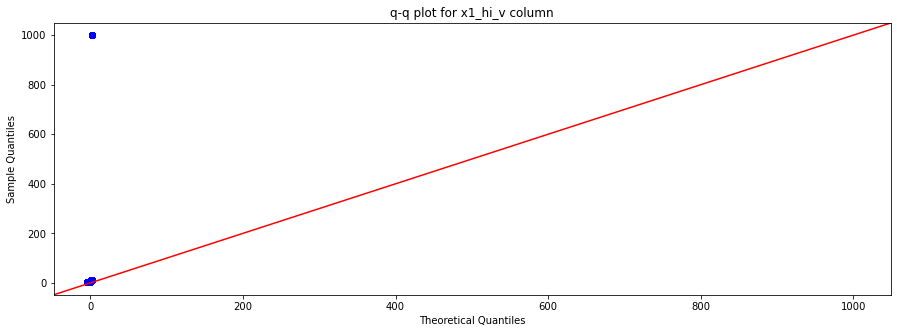

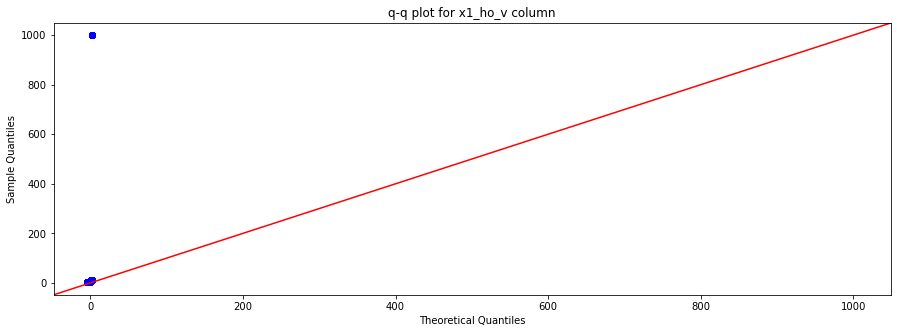

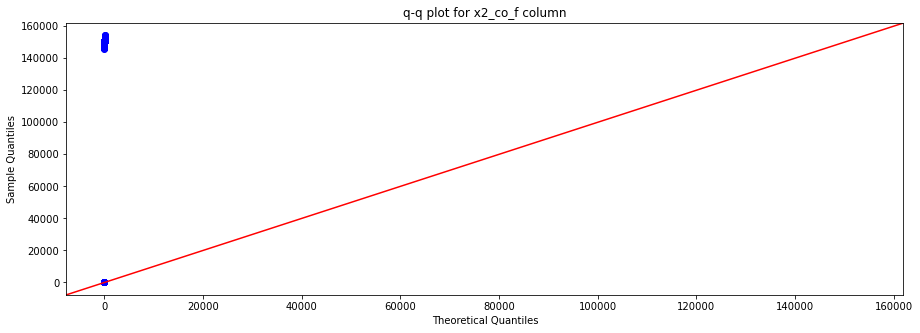

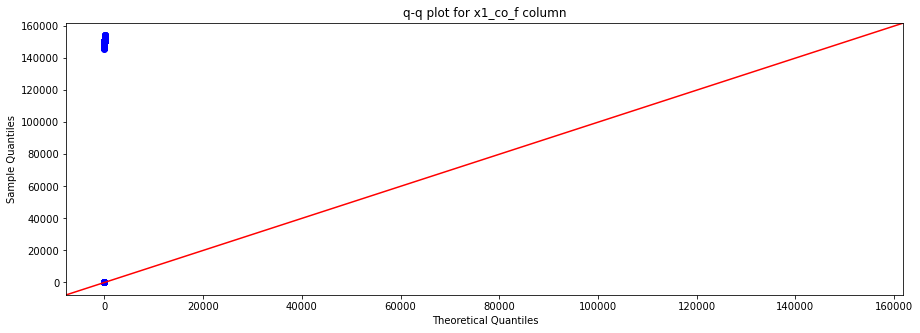

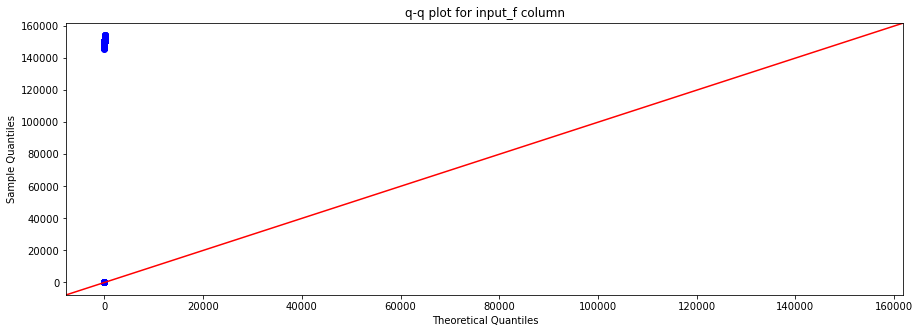

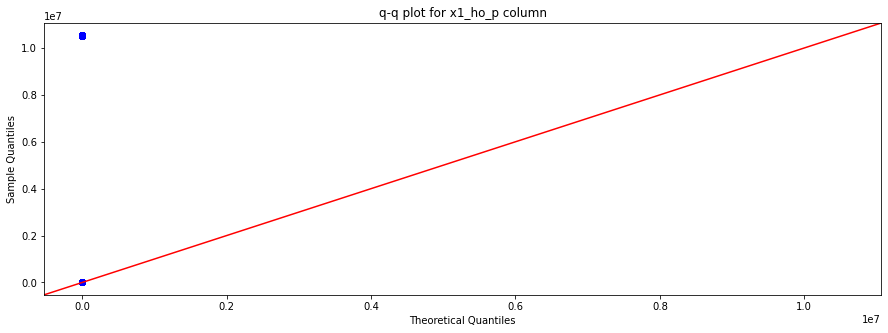

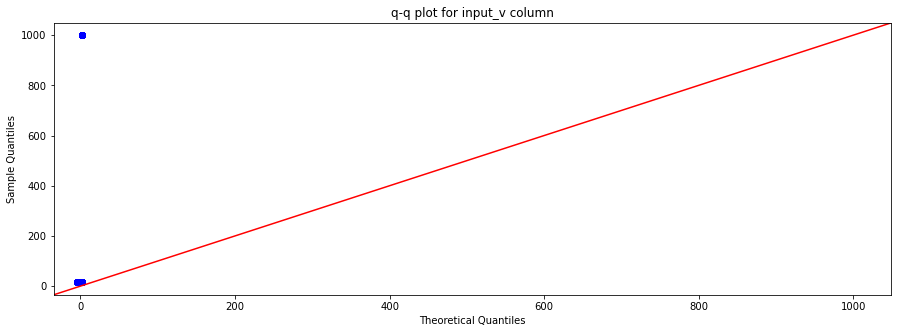

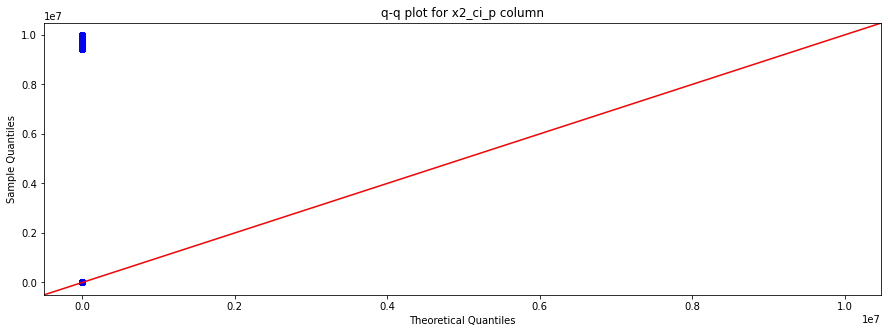

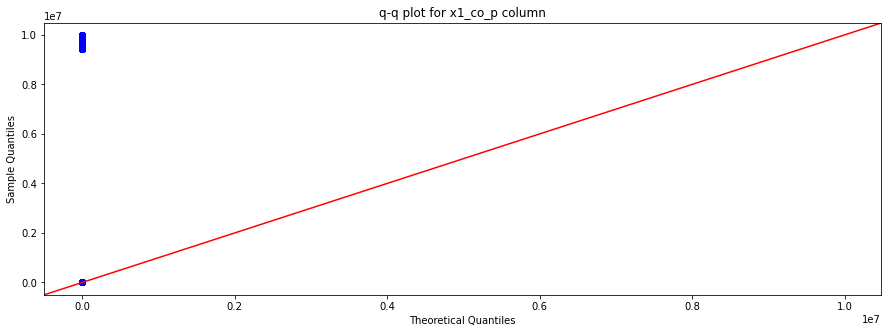

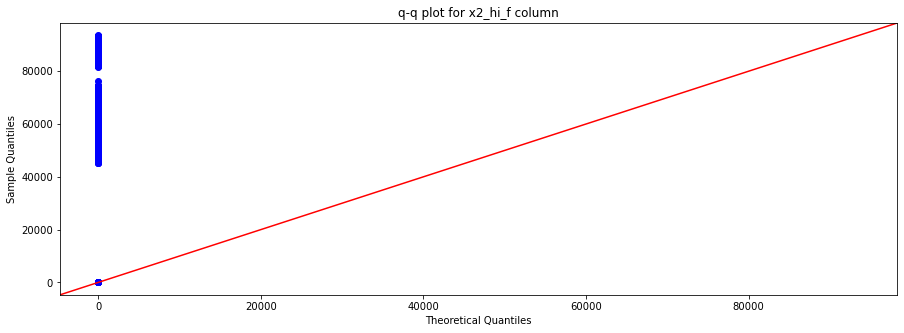

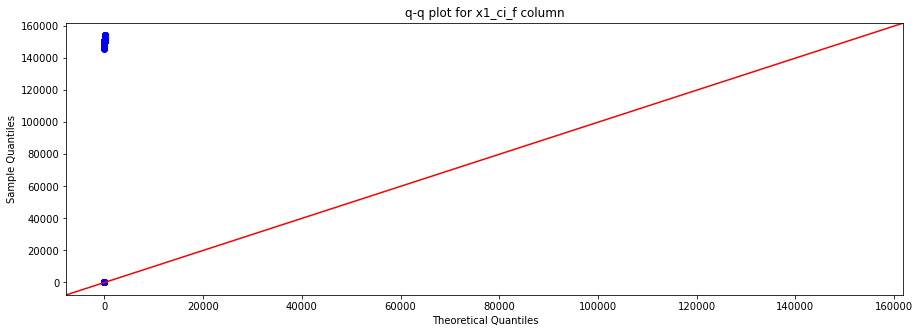

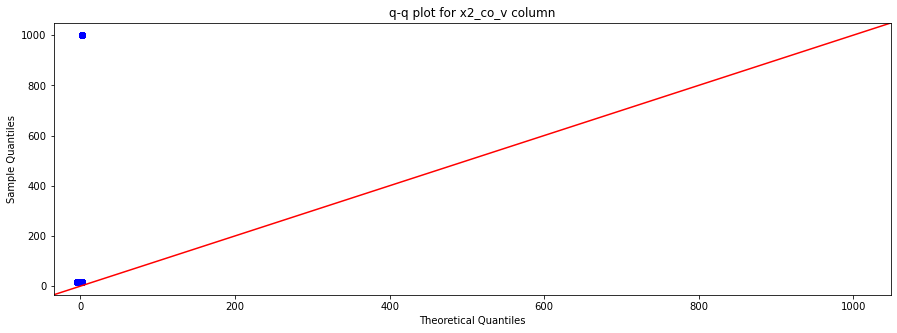

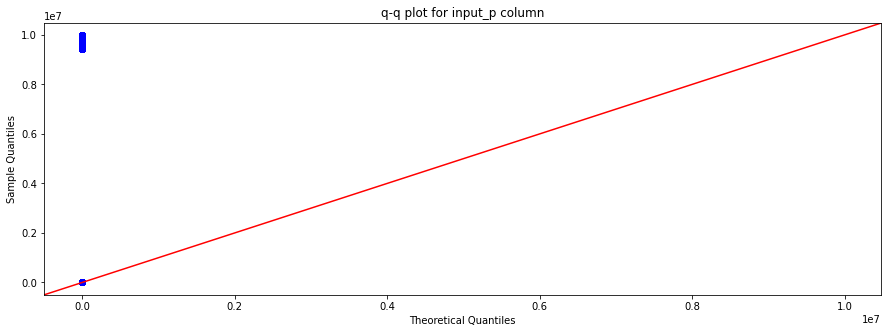

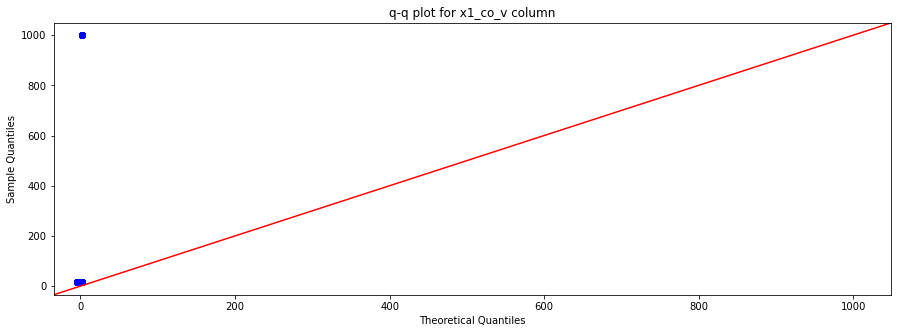

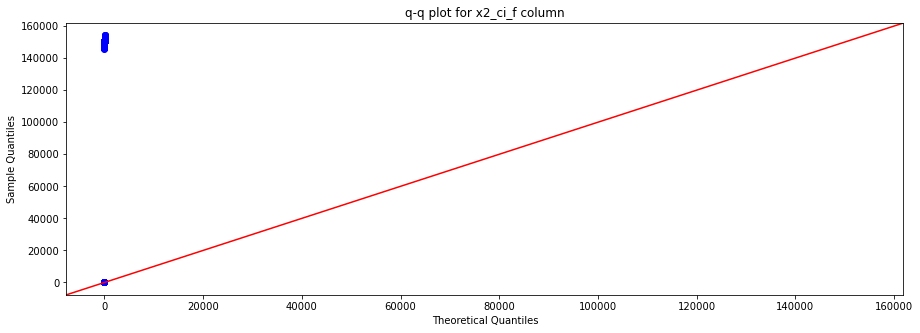

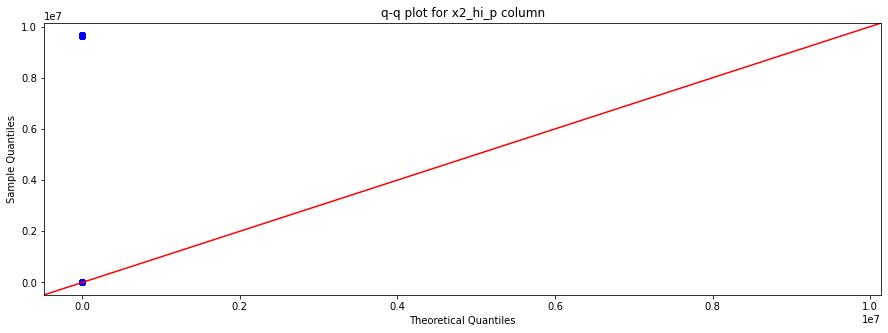

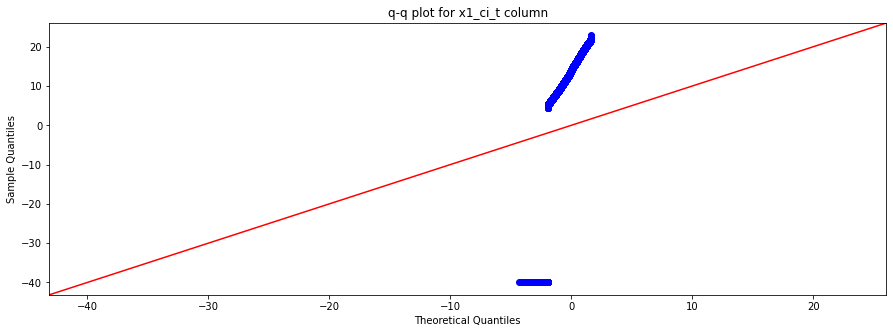

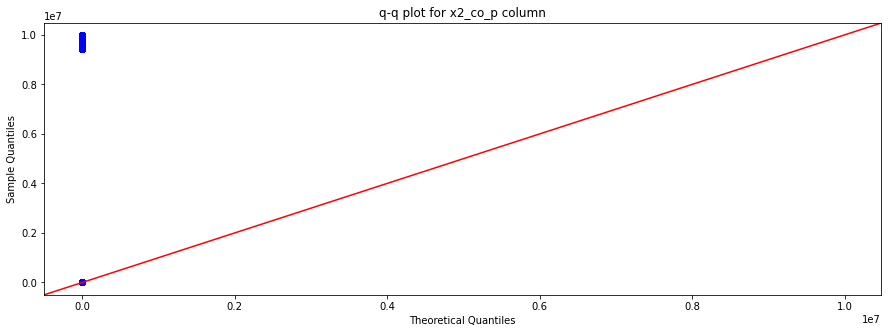

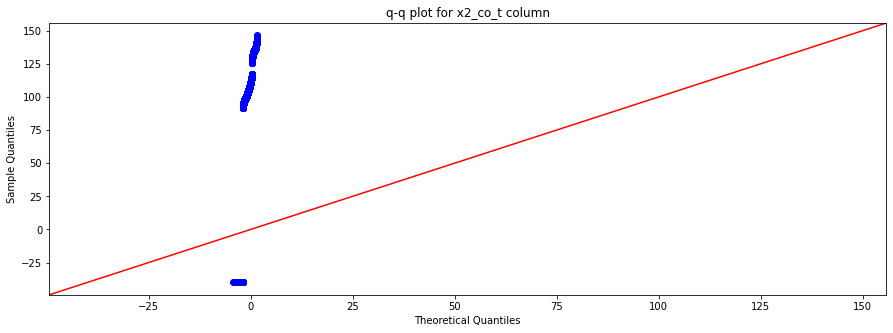

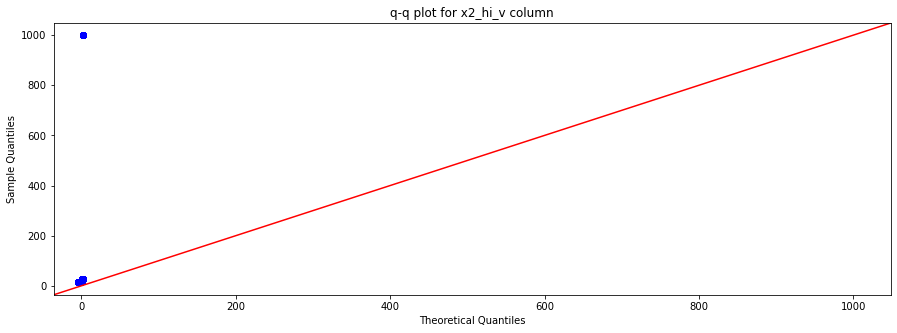

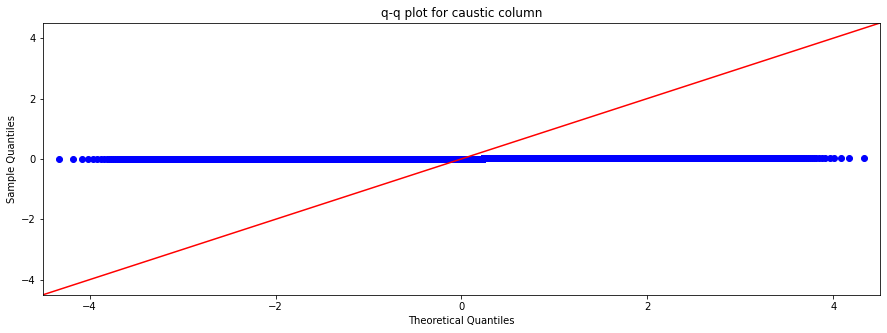

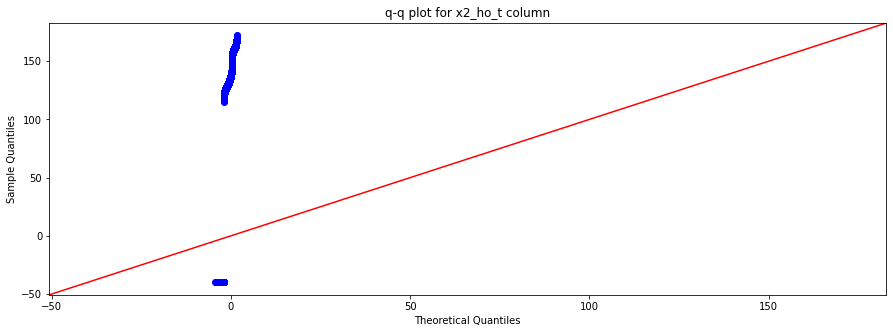

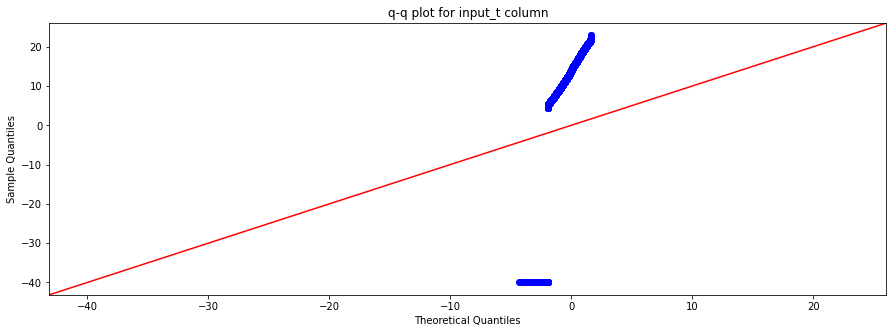

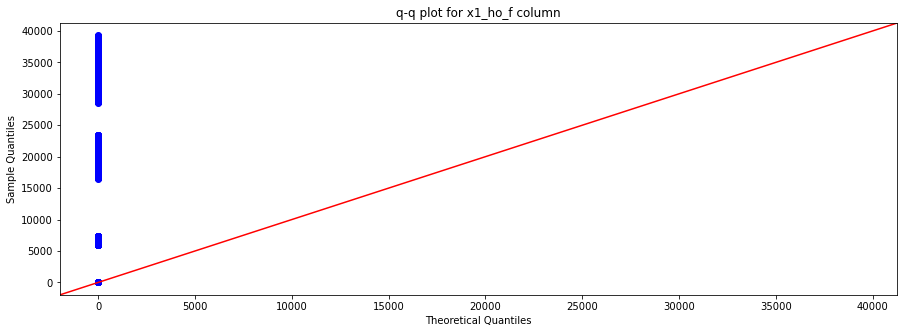

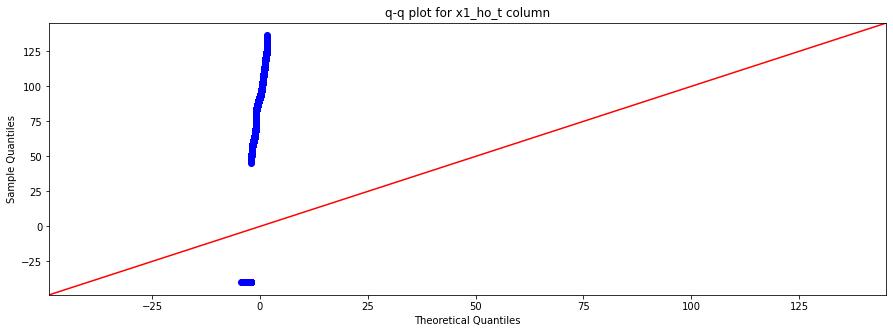

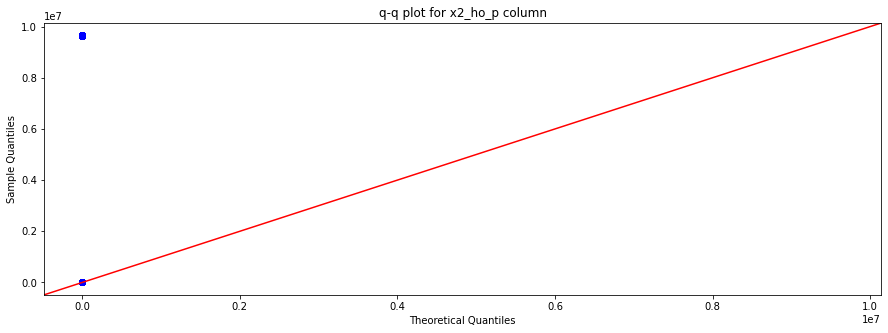

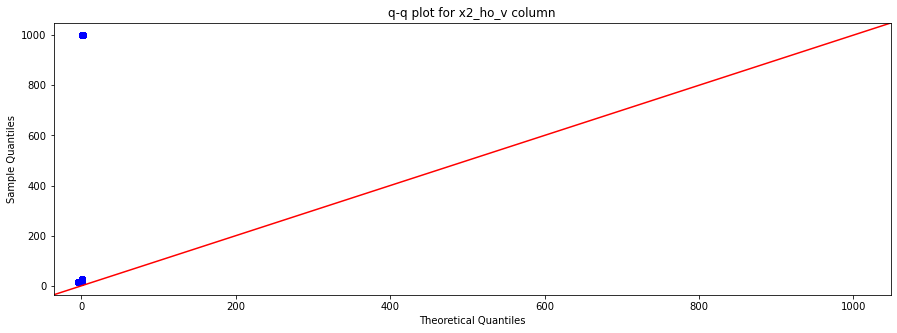

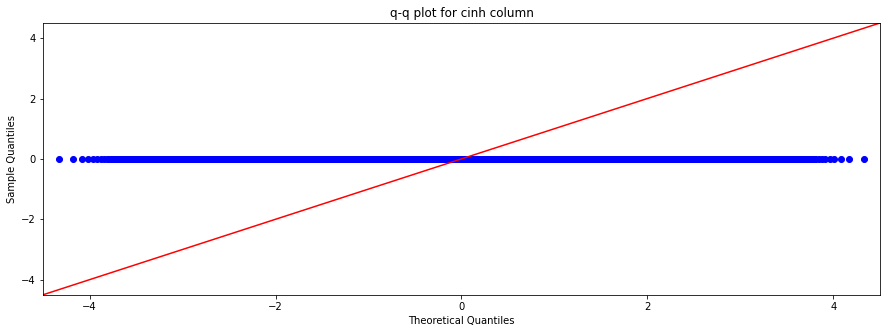

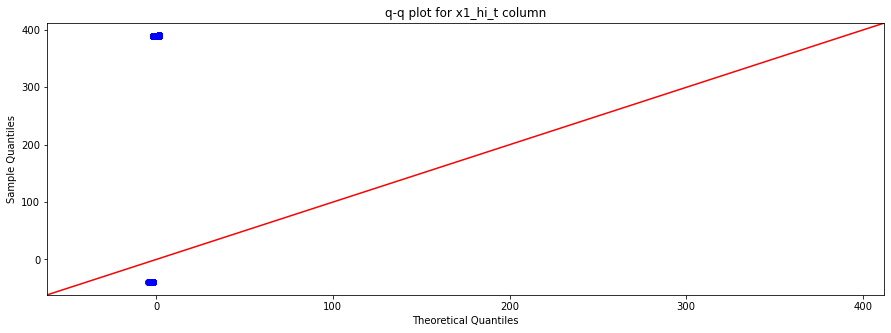

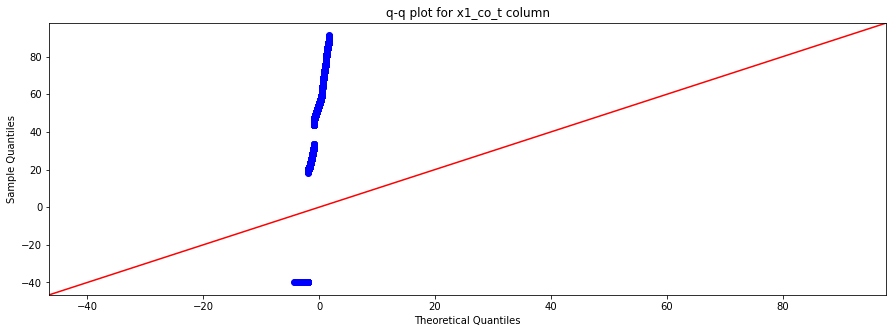

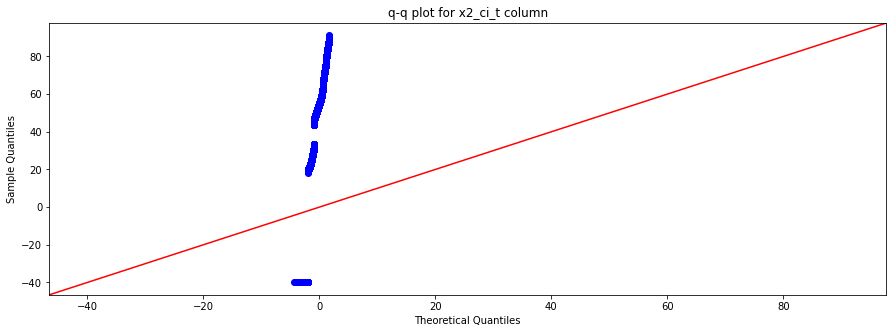

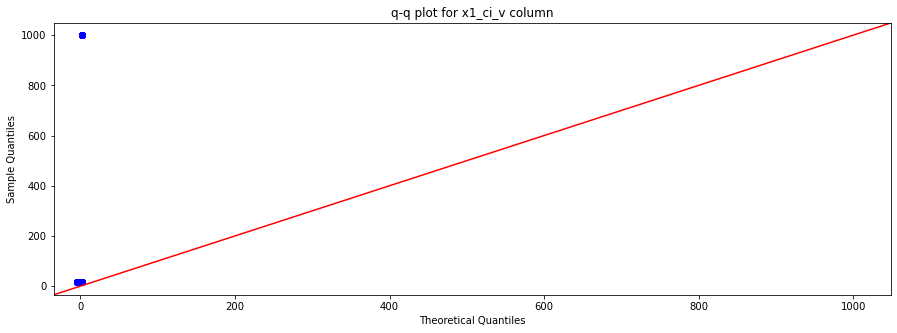

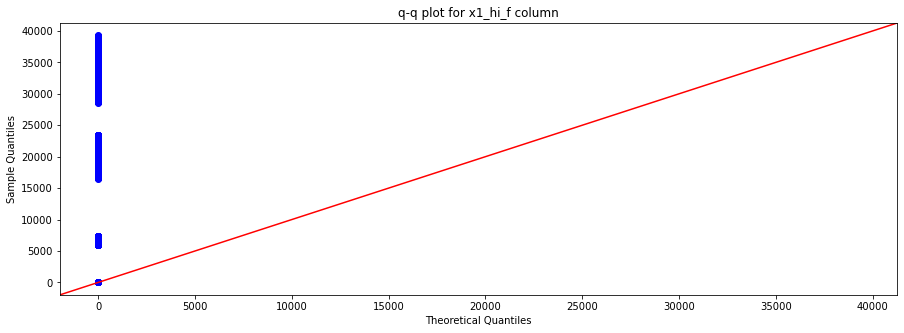

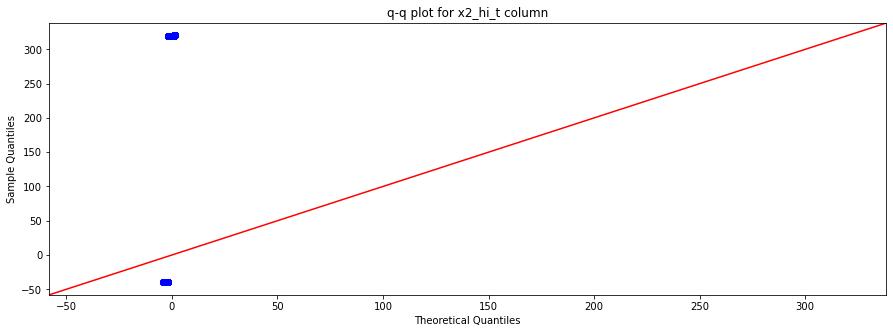

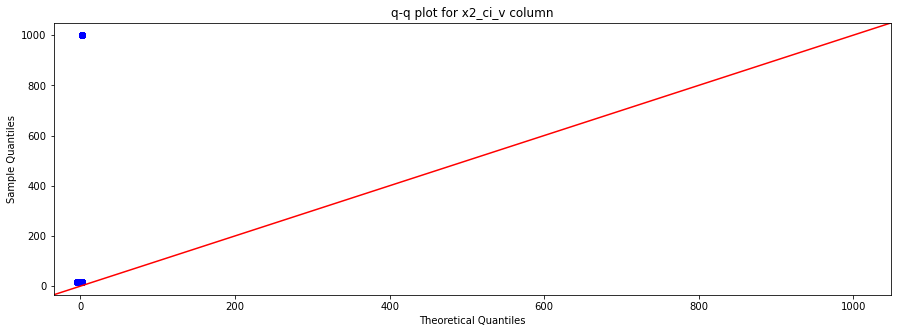

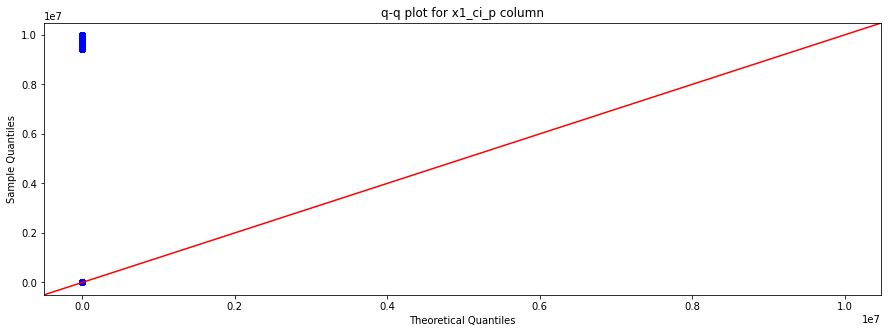

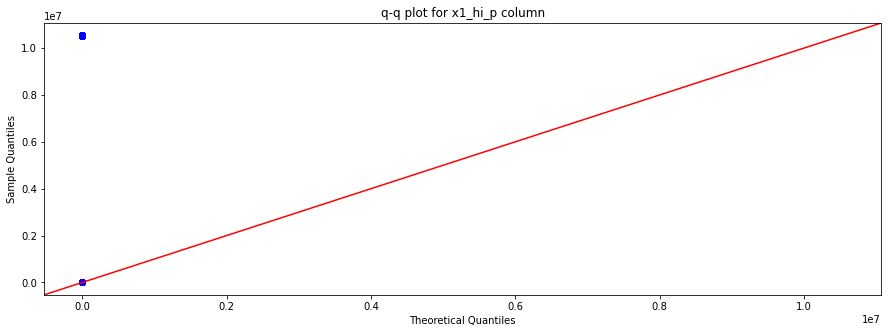

In [17]:

for col in cols:
    data = df[col]
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    sm.qqplot(data, line ='45', ax=ax)
    ax.set_title(f'q-q plot for {col} column')


Now we will detect outilers using z scores which is lower than -3 or higher than 3. Those outliers are disguised missing value and we handle those outliers like they are missing values. 

In [18]:
df_without_outlier = df.copy()
cols_ = list(set(cols)- {"cinh", "caustic", "fe_lab", "ph_lab"})

for col in cols_:
    mean = df[col].mean()
    std = df[col].std()
#     Q1, Q2, Q3 = df[col].quantile([0.25,0.5,0.75]).values
#     IQR = Q3 - Q1
#     df[df[col] < Q2 -1.5*IQR][col]
    indexes=df_without_outlier[((df_without_outlier[col] - mean)/std < -3) | ((df_without_outlier[col] - mean)/std > 3)][col].index
    df_without_outlier.loc[indexes,col]=np.nan

In the scatter plots below, you will see the before and after outlier handling.

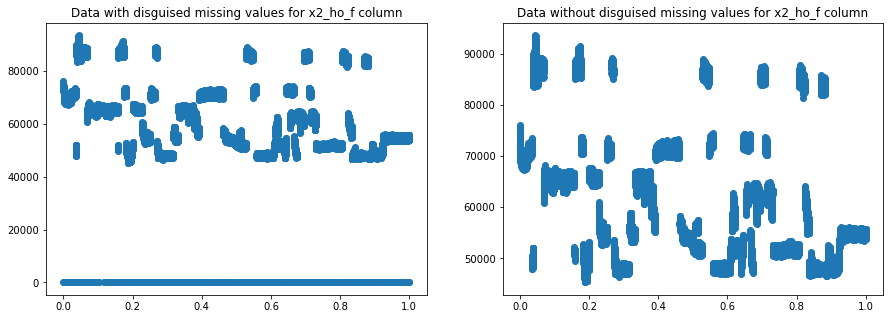

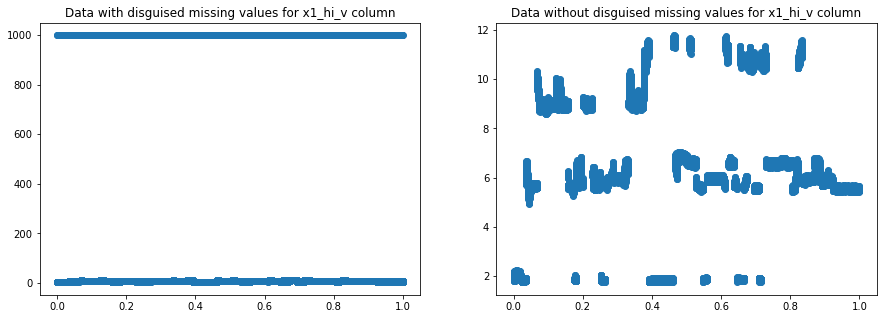

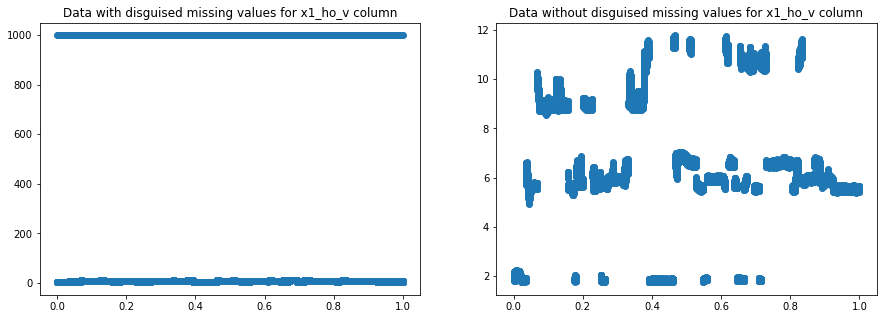

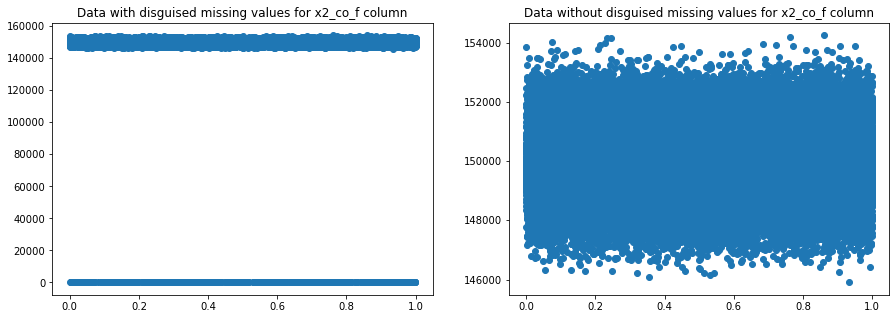

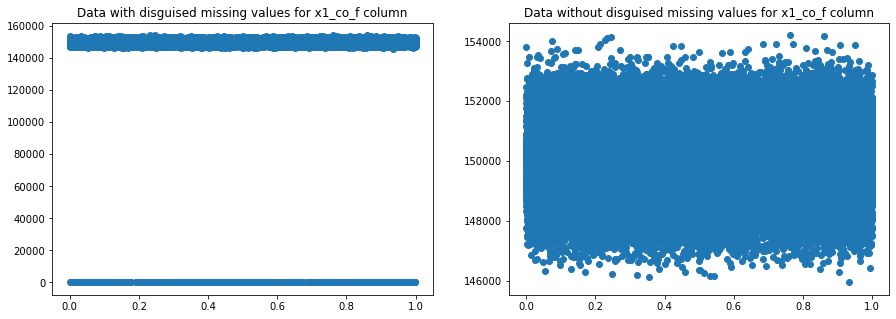

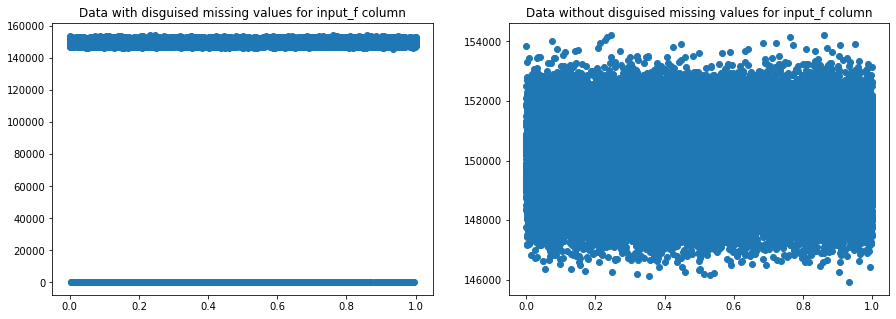

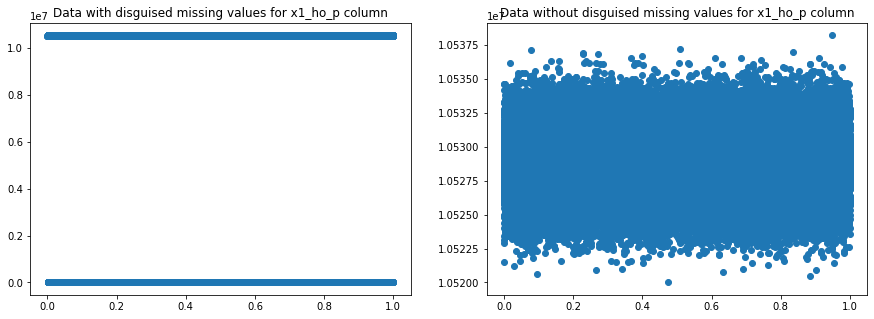

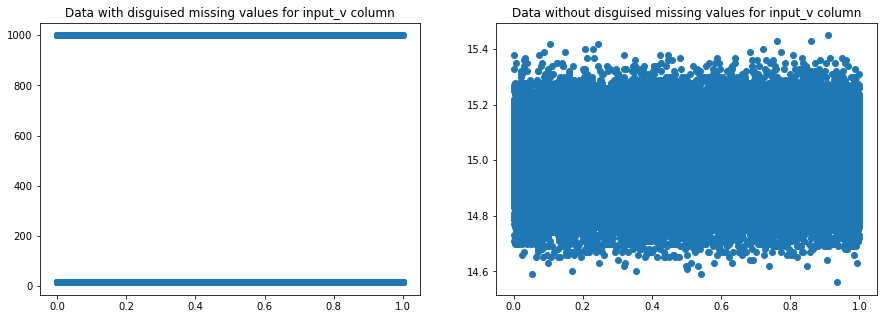

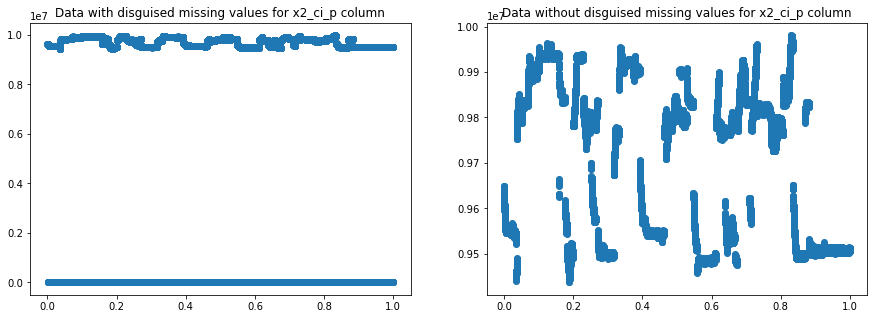

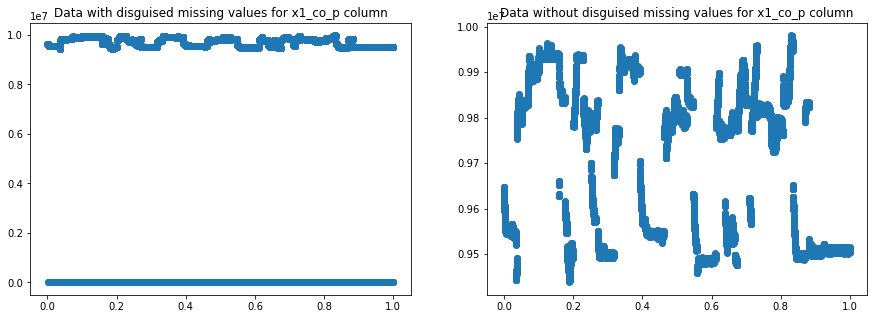

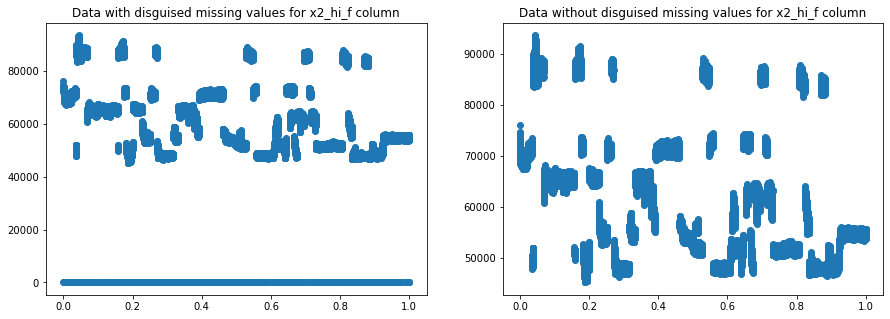

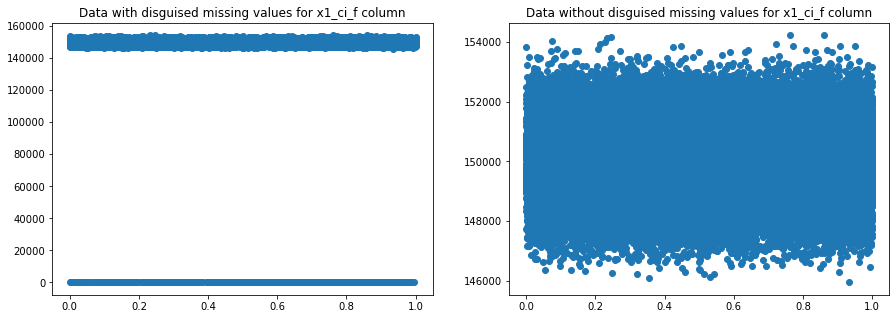

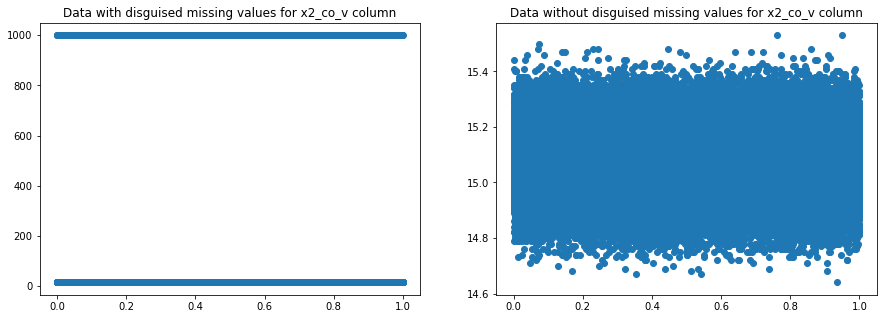

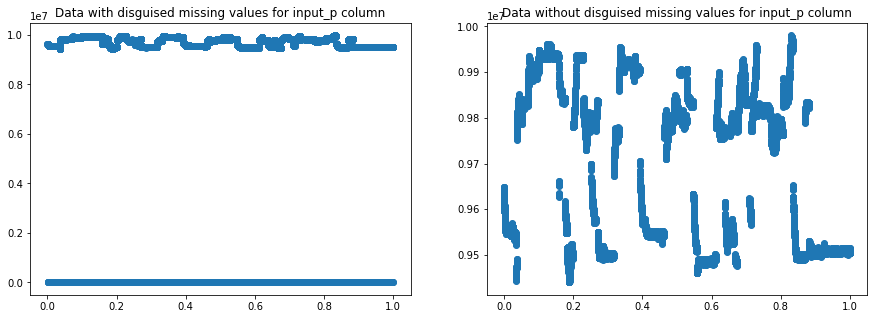

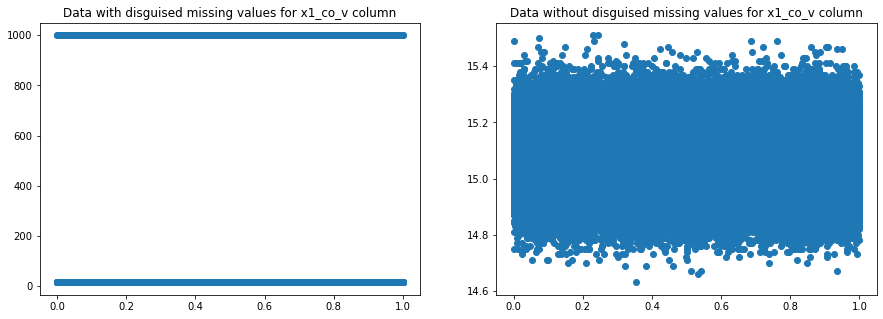

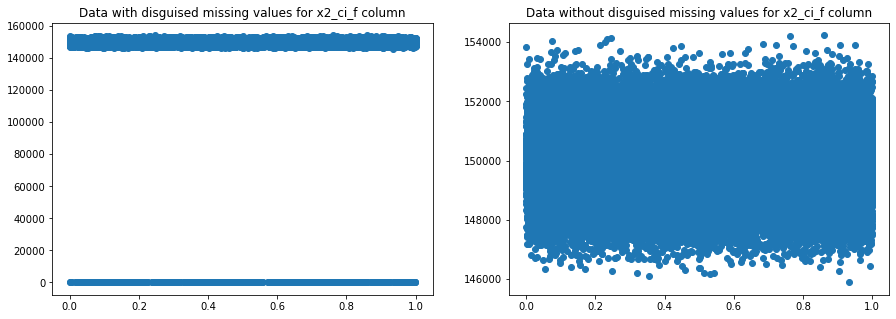

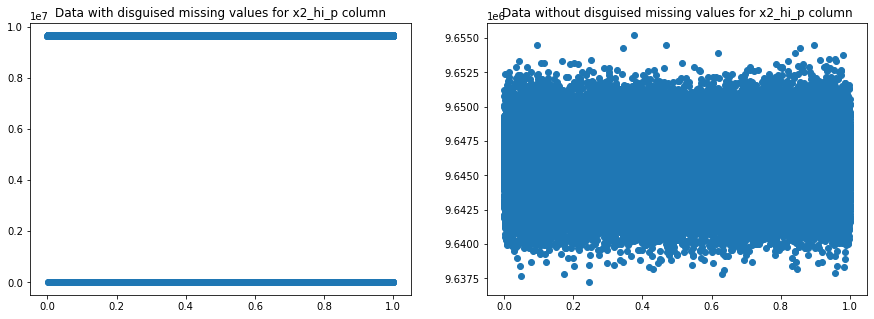

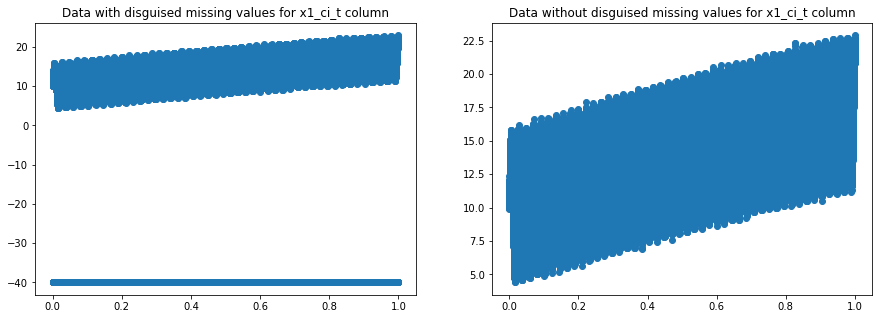

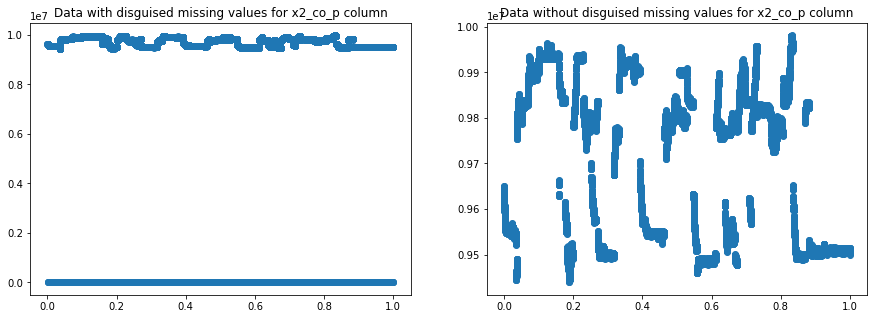

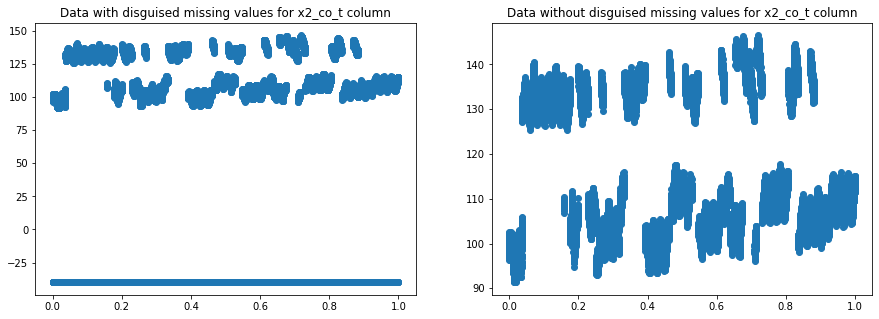

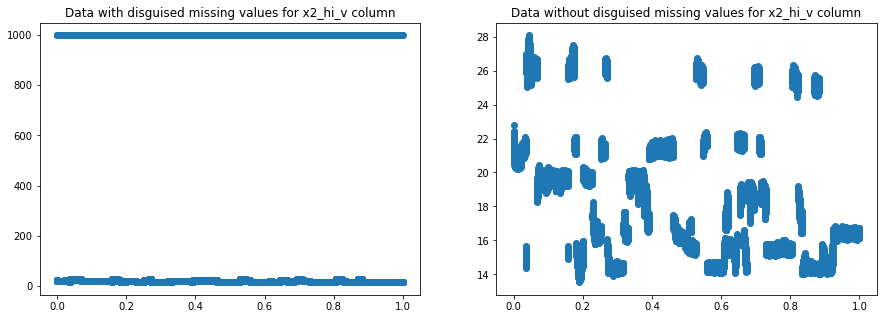

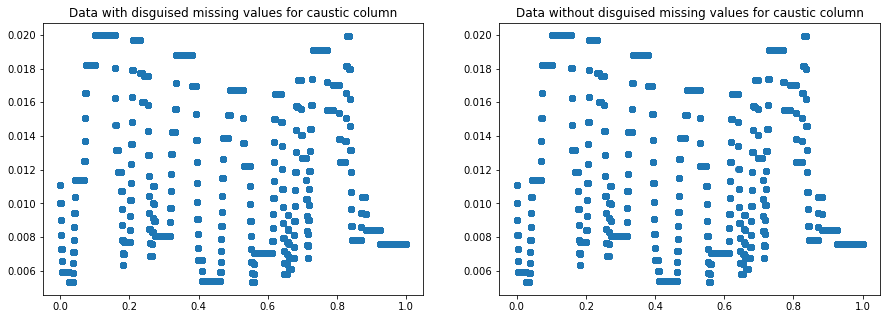

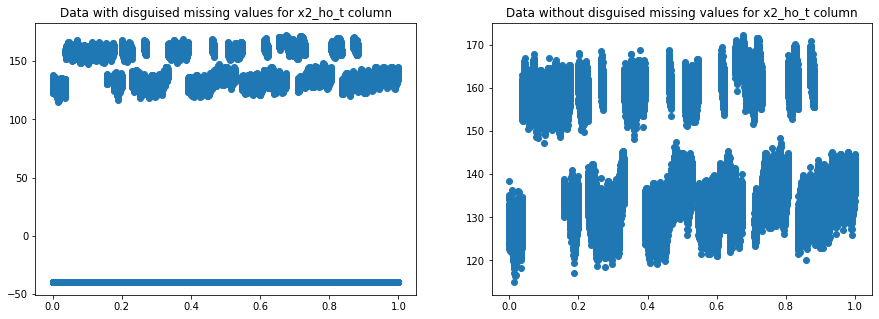

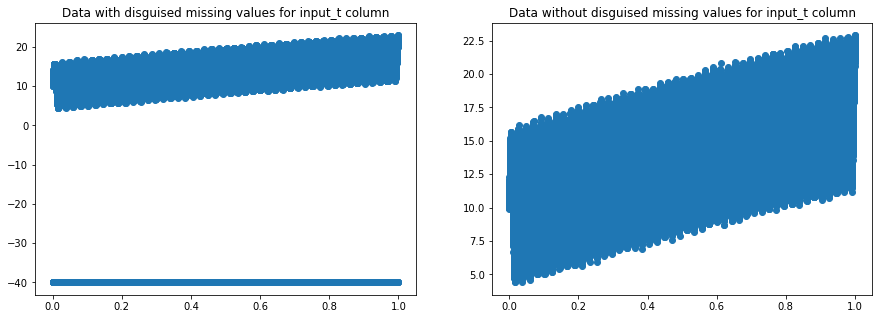

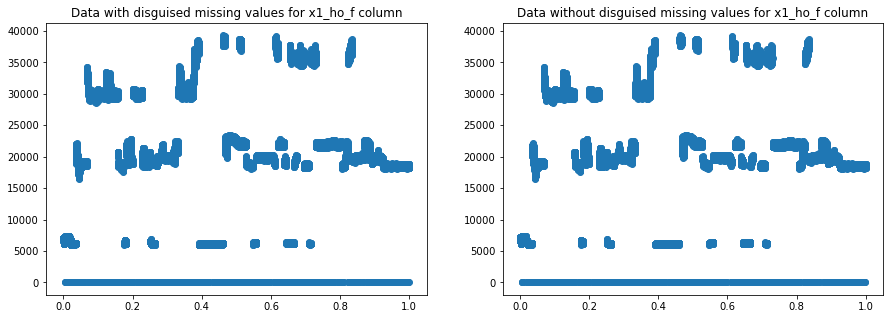

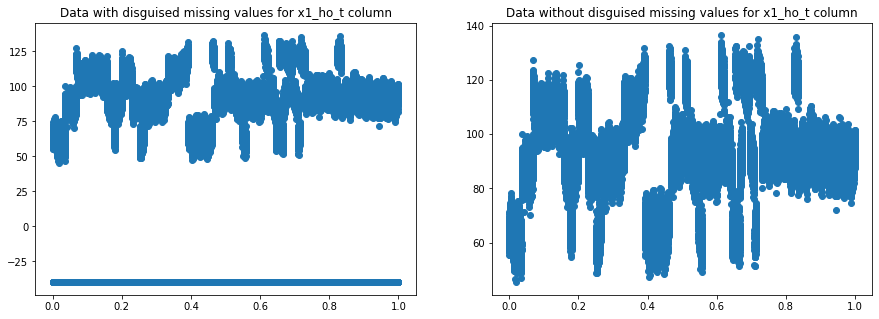

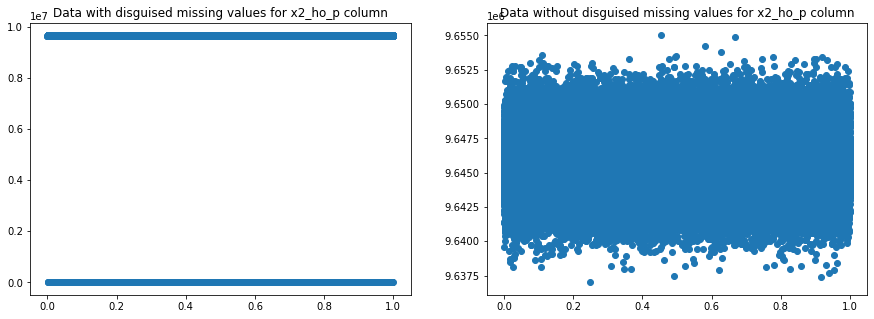

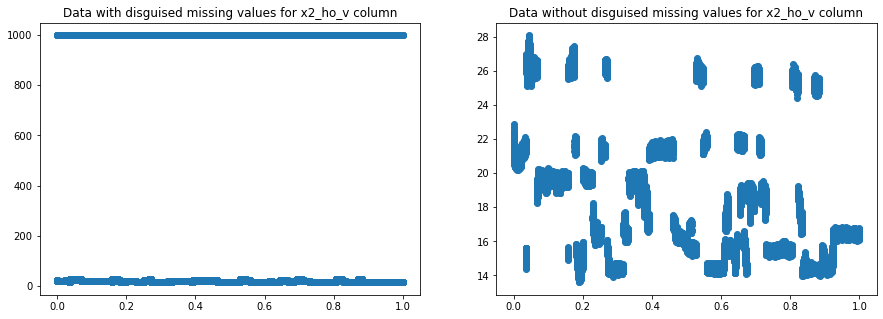

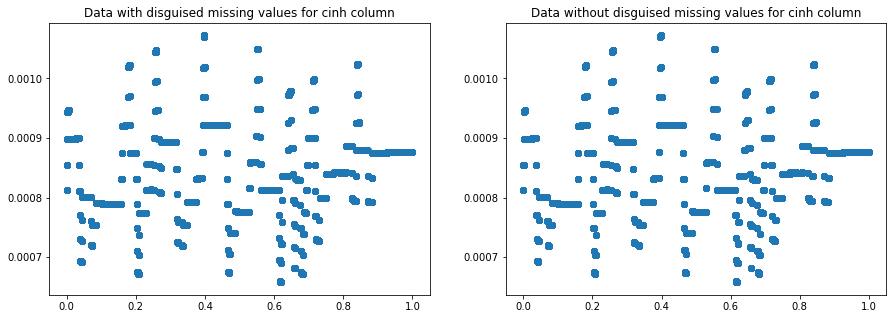

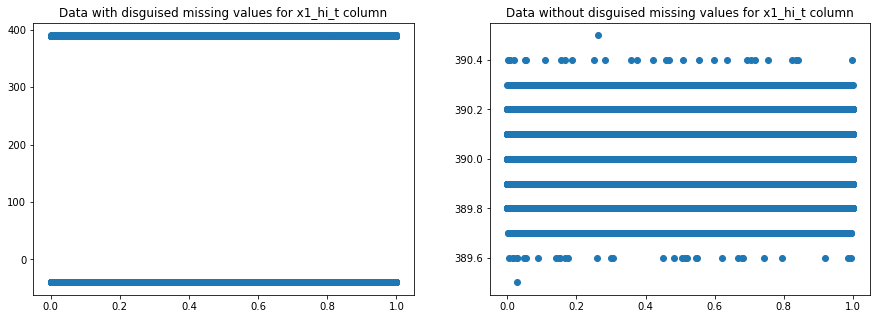

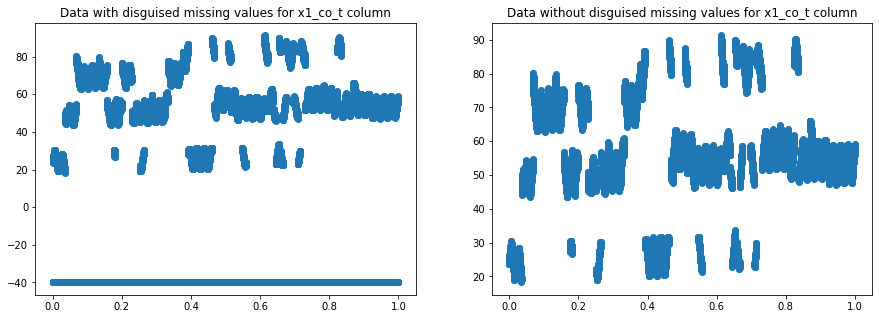

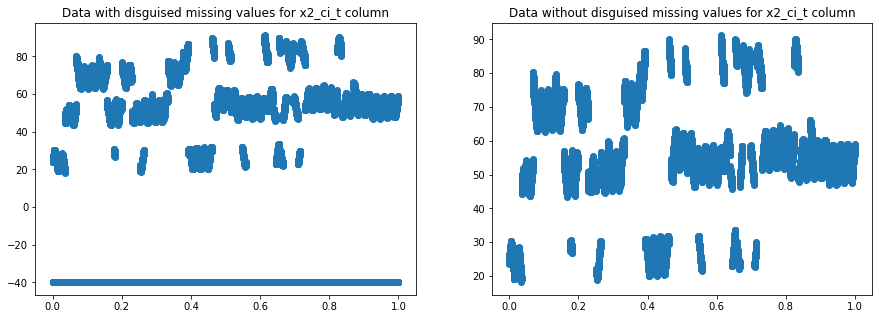

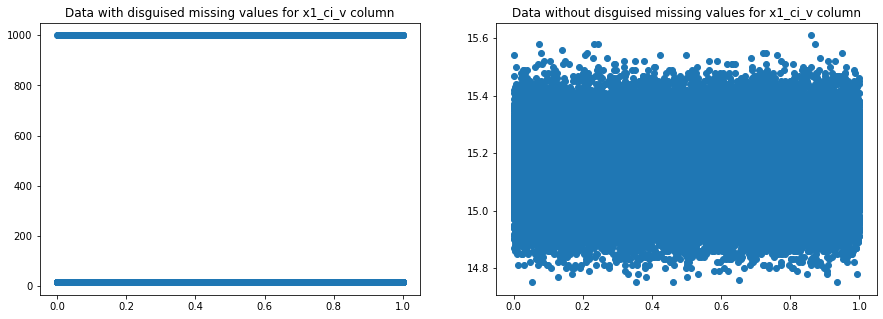

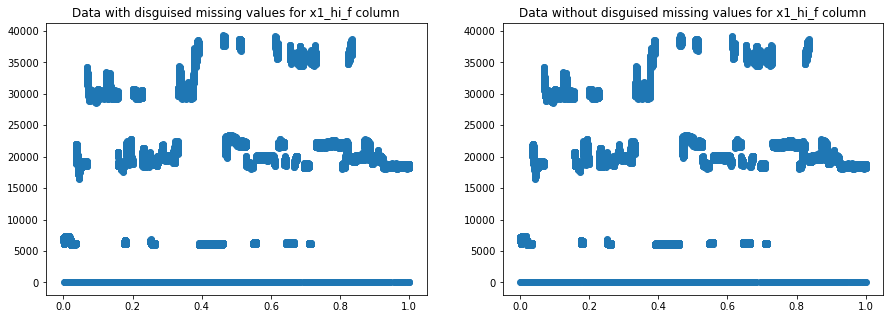

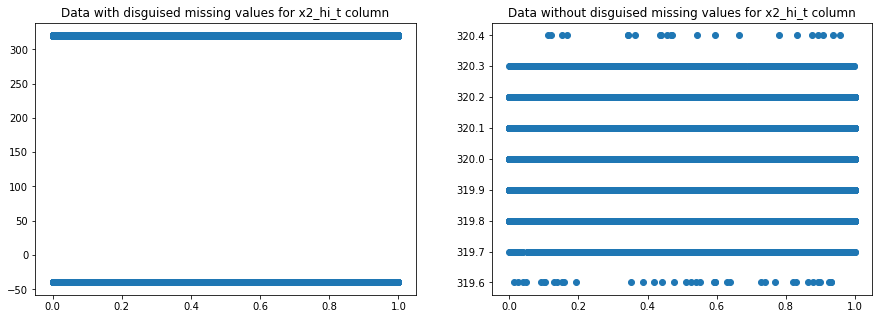

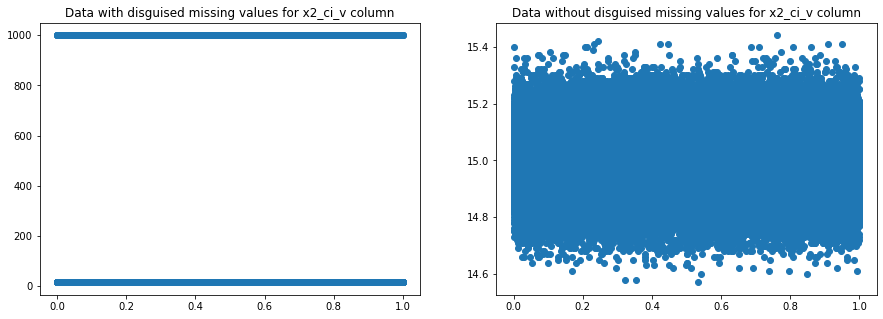

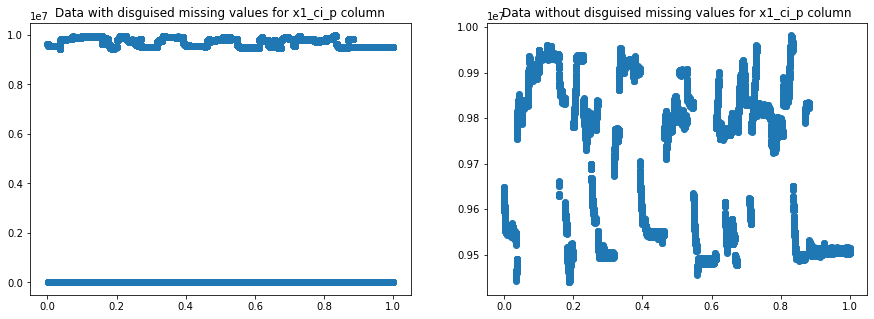

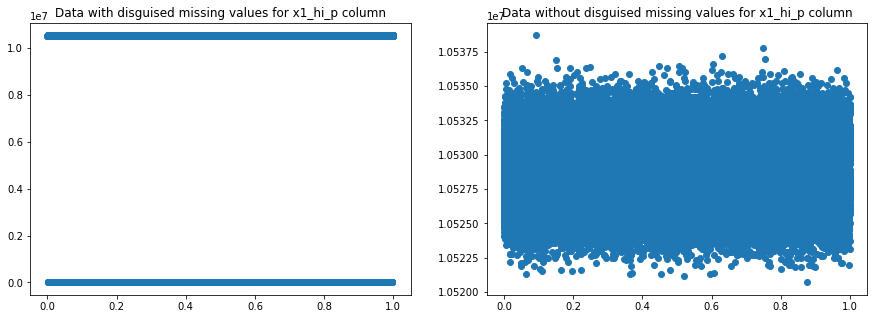

In [19]:
cols = list(set(df.columns) - {"date", "source", "fe_lab", "ph_lab"})

for col in cols:
    data = df[col]
    data_ = df_without_outlier[col]
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].scatter(np.linspace(0,1,len(data)),data) # 1 hour interval
    ax[0].set_title(f'Data with disguised missing values for {col} column')
    ax[1].scatter(np.linspace(0,1,len(data_)),data_) # 1 hour interval
    ax[1].set_title(f'Data without disguised missing values for {col} column')


The only **x1_hi_f**, **x1_ho_f** columns are not handled by this outlier analysis. We can see it before and after outlier analysis. There we will manually handle for colums **x1_hi_f**, **x1_ho_f**. Since flow can not be zero.

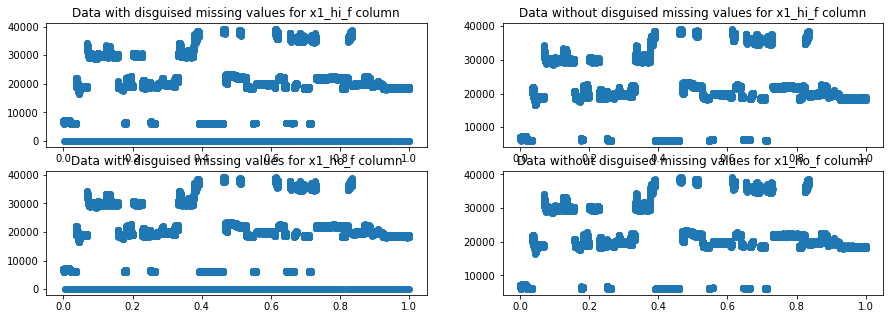

In [20]:
cols_ = ["x1_hi_f","x1_ho_f"]
fig, ax = plt.subplots(2, 2, figsize=(15,5))
i = 0
for col in cols_:
    indexes = df_without_outlier[df_without_outlier[col] == 0].index
    df_without_outlier.loc[indexes,col]=np.nan

    data = df[col]
    data_ = df_without_outlier[col]

    ax[i,0].scatter(np.linspace(0,1,len(data)),data) # 1 hour interval
    ax[i,0].set_title(f'Data with disguised missing values for {col} column')
    ax[i,1].scatter(np.linspace(0,1,len(data_)),data_) # 1 hour interval
    ax[i,1].set_title(f'Data without disguised missing values for {col} column')
    i+=1

In [21]:
for col in cols:
    missing_vals = df_without_outlier[col].isna().sum()/len(df_without_outlier)*100
    print(f"For {col}, percentage of missing value : {missing_vals : 2f}")

For x2_ho_f, percentage of missing value :  1.396201
For x1_hi_v, percentage of missing value :  5.445110
For x1_ho_v, percentage of missing value :  5.441354
For x2_co_f, percentage of missing value :  1.395450
For x1_co_f, percentage of missing value :  1.396201
For input_f, percentage of missing value :  1.394699
For x1_ho_p, percentage of missing value :  3.966293
For input_v, percentage of missing value :  5.435346
For x2_ci_p, percentage of missing value :  3.971550
For x1_co_p, percentage of missing value :  3.958031
For x2_hi_f, percentage of missing value :  1.393197
For x1_ci_f, percentage of missing value :  1.396952
For x2_co_v, percentage of missing value :  5.427084
For input_p, percentage of missing value :  3.967044
For x1_co_v, percentage of missing value :  5.444358
For x2_ci_f, percentage of missing value :  1.394699
For x2_hi_p, percentage of missing value :  3.963289
For x1_ci_t, percentage of missing value :  7.358033
For x2_co_p, percentage of missing value :  3.

Now, we can fill na values with **interpolation of the neighboorhoods**. This is better than filling one mean value to the whole missing values of that column. By this way, trend and seasonality are preserved especially temperature related columns. Check line plots below.

In [22]:
df = df_without_outlier.copy()

df[cols] = df[cols].interpolate(method='linear', limit=3,limit_direction='both')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133147 entries, 0 to 133146
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     133147 non-null  datetime64[ns]
 1   caustic  133147 non-null  float64       
 2   cinh     133147 non-null  float64       
 3   fe_lab   1110 non-null    float64       
 4   input_f  133147 non-null  float64       
 5   input_p  133147 non-null  float64       
 6   input_t  133147 non-null  float64       
 7   input_v  133147 non-null  float64       
 8   ph_lab   1110 non-null    float64       
 9   source   133147 non-null  object        
 10  x1_ci_f  133147 non-null  float64       
 11  x1_ci_p  133147 non-null  float64       
 12  x1_ci_t  133147 non-null  float64       
 13  x1_ci_v  133147 non-null  float64       
 14  x1_co_f  133147 non-null  float64       
 15  x1_co_p  133147 non-null  float64       
 16  x1_co_t  133147 non-null  float64       
 17  x1_co_v  1

### Dealing With Noise

Here, we deal with noise by using rolling mean of column with 5 windows size.

In [23]:
window_size = 5
df[cols] = df[cols].rolling(window=window_size).mean()
df = df[window_size-1:]
df.head()

date  caustic  cinh  fe_lab   input_f    input_p  input_t  \
4 2021-02-01 08:04:00     0.01  0.00     NaN 149915.80 9633360.00    10.46   
5 2021-02-01 08:05:00     0.01  0.00     NaN 149651.20 9634240.00    10.50   
6 2021-02-01 08:06:00     0.01  0.00     NaN 149631.60 9634630.00    10.50   
7 2021-02-01 08:07:00     0.01  0.00     NaN 149978.80 9634910.00    10.54   
8 2021-02-01 08:08:00     0.01  0.00     NaN 150266.80 9634590.00    10.36   

   input_v  ph_lab source  ...  x2_co_t  x2_co_v  x2_hi_f    x2_hi_p  x2_hi_t  \
4    14.98     NaN      A  ...   101.32    15.11 74004.80 9645860.00   319.92   
5    14.96     NaN      A  ...   101.52    15.12 73846.80 9645380.00   320.00   
6    14.95     NaN      A  ...   101.80    15.13 73606.80 9645760.00   320.00   
7    15.00     NaN      A  ...   101.56    15.13 73433.80 9645360.00   319.98   
8    15.04     NaN      A  ...   100.98    15.07 73378.60 9645960.00   319.96   

   x2_hi_v  x2_ho_f    x2_ho_p  x2_ho_t  x2_ho_v  
4    22.19 75023.80 9644640.00   134.14    22.50  
5    22.16 74887.60 9645780.00   131.88    22.47  
6    22.09 74783.80 9646480.00   129.62    22.43  
7    22.04 74568.40 9645740.00   129.44    22.37  
8    22.03 74006.20 9646100.00   129.60    22.20  

[5 rows x 42 columns]

### Box Plots

**Box plots of caustic and cinh injection ratios**

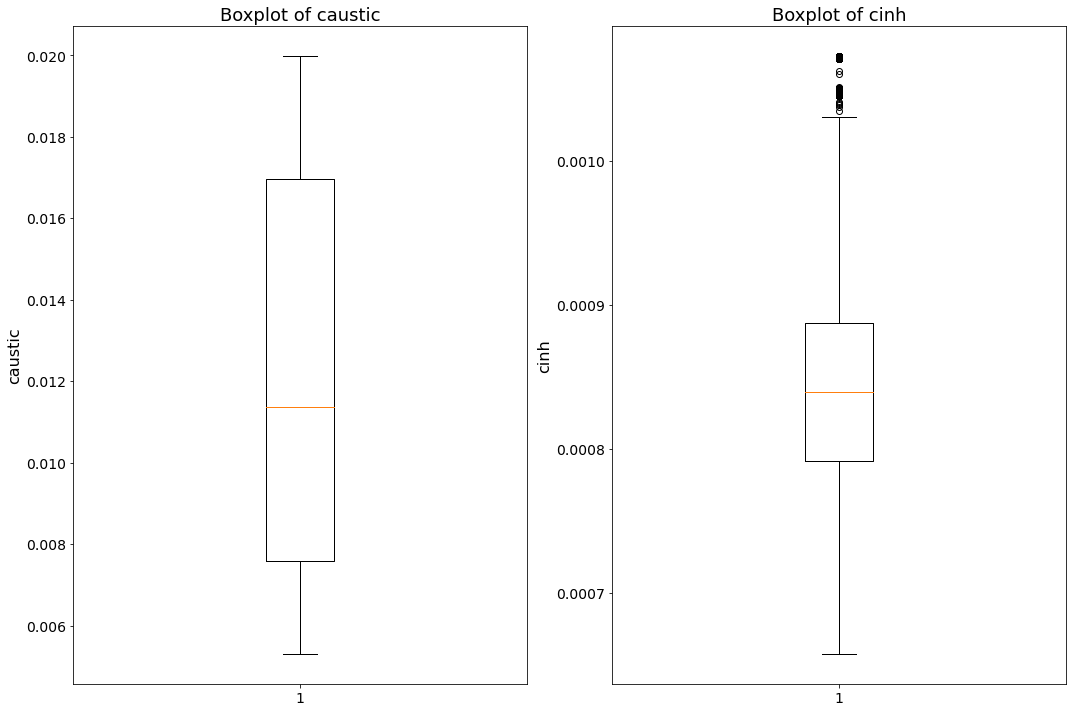

In [24]:
rows = 1
columns = 2
f, axes = plt.subplots(rows,columns, figsize=(15, 10))

plotted_cols = ['caustic', 'cinh']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[j].set_title(f"Boxplot of {col}", fontsize=18)
            axes[j].set_ylabel(col, fontsize=16)
            axes[j].boxplot(df.loc[:,col])
            
            axes[j].tick_params(axis='y', which='major', labelsize=14)
            axes[j].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

It is obvious that **cinh** boxplot includes some outliers although **caustic** boxplot doesn't. Existence of outliers doesn't affect too much the median of **cinh** values. On the other hand, mean of **cinh** values is increased due to the outliers locating above the  top whisker. It should be noted IQR of **caustic** boxplot is larger which causes larger dispersion of data. 

**Box plots of pH and iron level**

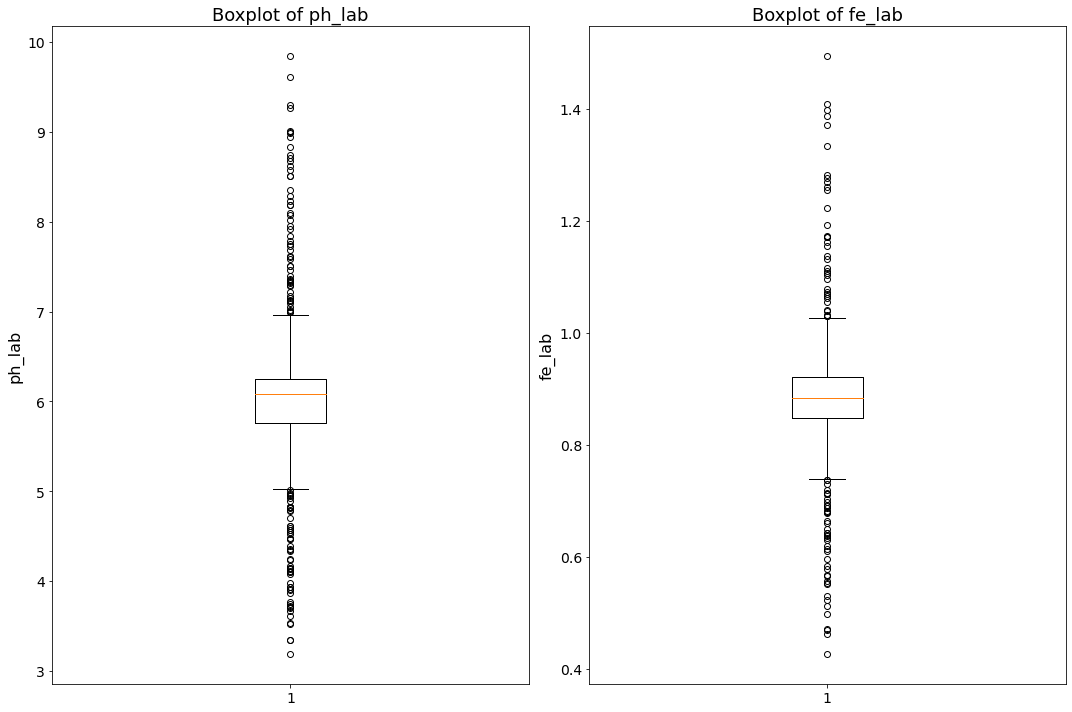

In [25]:
rows = 1
columns = 2
f, axes = plt.subplots(rows,columns, figsize=(15, 10))

df_plot = df.dropna(subset=['fe_lab', 'ph_lab'], how='any')

plotted_cols = ['ph_lab', 'fe_lab']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[j].set_title(f"Boxplot of {col}", fontsize=18)
            axes[j].set_ylabel(col, fontsize = 16)
            axes[j].boxplot(df_plot.loc[:,col])
            
            axes[j].tick_params(axis='y', which='major', labelsize=14)
            axes[j].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

There exists many outliers in the above figures which makes difficult to get symmetrical dispersion. These outliers increase the error variance and reduces the power of statistical tests

**Fluid flow sensor readings box plots**

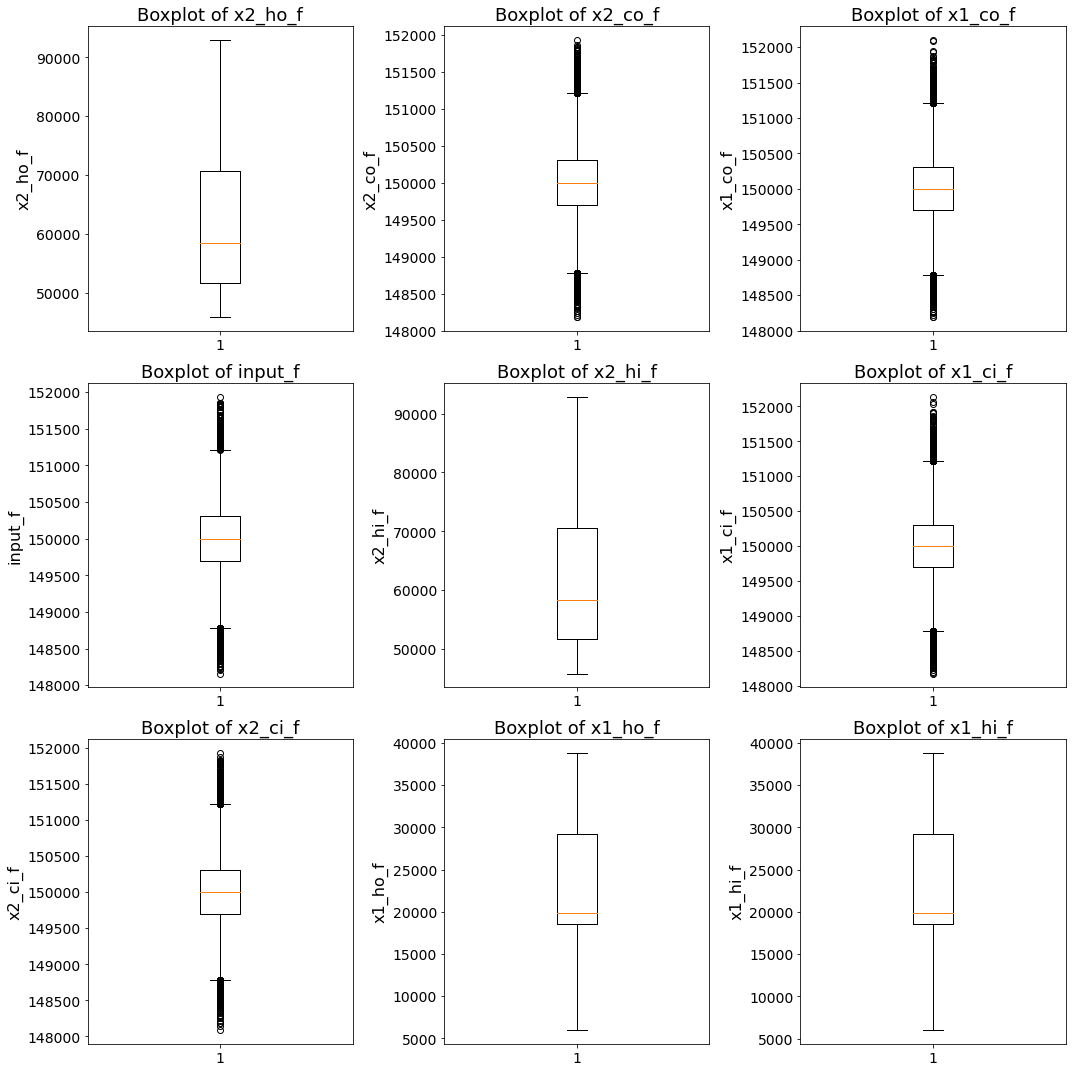

In [26]:
rows = 3
columns = 3
f, axes = plt.subplots(rows,columns, figsize=(15, 15))

plotted_cols = list(set(df.columns) - {'date', 'source', 'ph_lab', 'fe_lab'})
plotted_cols = [col for col in plotted_cols if col[-1] == 'f']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[i,j].set_title(f"Boxplot of {col}", fontsize = 18)
            axes[i,j].set_ylabel(col, fontsize = 16)
            axes[i,j].boxplot(df.loc[:,col])
            
            axes[i,j].tick_params(axis='y', which='major', labelsize=14)
            axes[i,j].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

Flow discharge values corresponding to input, x1_ci, x1_co, x2_co and x2_ci have the same mean, standard deviation and IQR values through the pipe. Moreover, flow discharge values corresponding to x1_hi-x1_ho and x2_hi-x2_ho pairs have the same mean, standard deviation and IQR values, respectively. 

**Velocity sensor readings box plots**

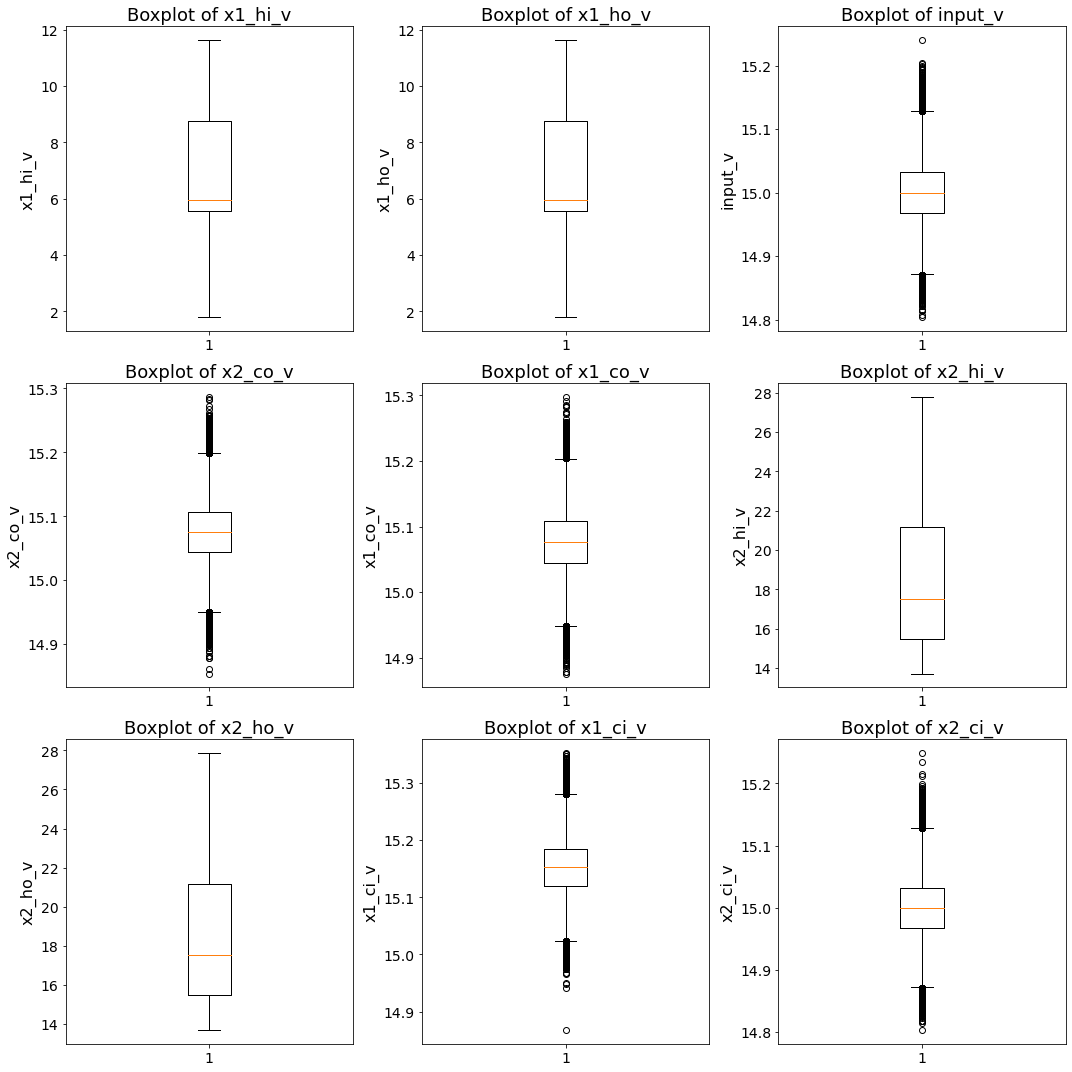

In [27]:
rows = 3
columns = 3
f, axes = plt.subplots(rows,columns, figsize=(15, 15))

plotted_cols = list(set(df.columns) - {'date', 'source', 'ph_lab', 'fe_lab'})
plotted_cols = [col for col in plotted_cols if col[-1] == 'v']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[i,j].set_title(f"Boxplot of {col}", fontsize = 18)
            axes[i,j].set_ylabel(col, fontsize = 16)
            axes[i,j].boxplot(df.loc[:,col])
            
            axes[i,j].tick_params(axis='y', which='major', labelsize=14)
            axes[i,j].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

Velocity values corresponding to input-x2_ci , x1_co-x2_co , x2_hi-x2_ho , x1_hi-x1_ho pairs have the same mean, standard deviation and IQR values, respectively. On the other hand, velocity values corresponding to x1_ci have different mean and IQR ranges. 

**Pressure sensor readings box plots**

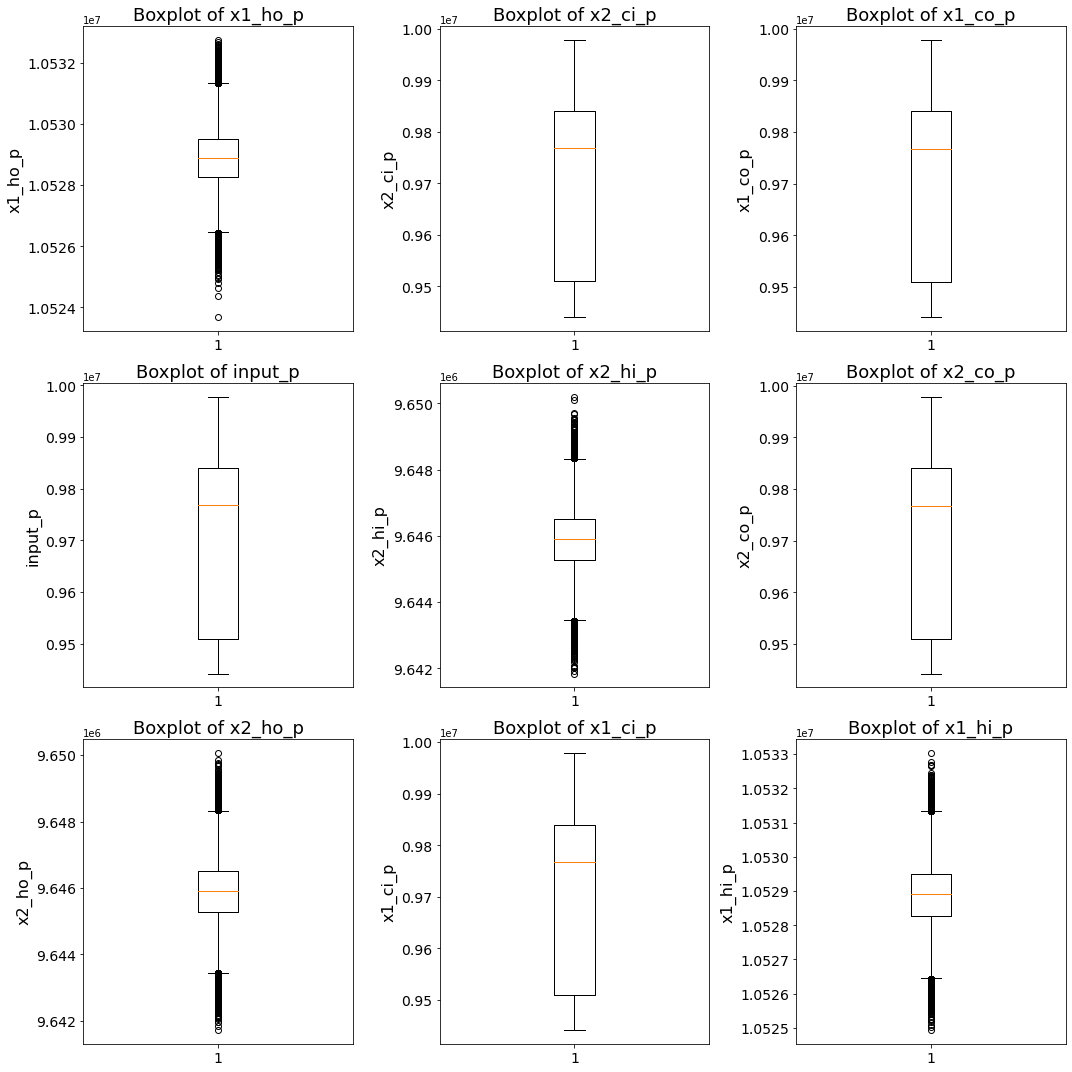

In [28]:
rows = 3
columns = 3
f, axes = plt.subplots(rows,columns, figsize=(15, 15))

plotted_cols = list(set(df.columns) - {'date', 'source', 'ph_lab', 'fe_lab'})
plotted_cols = [col for col in plotted_cols if col[-1] == 'p']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[i,j].set_title(f"Boxplot of {col}", fontsize = 18)
            axes[i,j].set_ylabel(col, fontsize = 16)
            axes[i,j].boxplot(df.loc[:,col])
            
            axes[i,j].tick_params(axis='y', which='major', labelsize=14)
            axes[i,j].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

Pressure values corresponding to input, x1_ci, x1_co, x2_co and x2_ci have the same mean, standard deviation and IQR values through the pipe. Moreover, pressure values corresponding to x1_hi-x1_ho and x2_hi-x2_ho pairs have the same mean, standard deviation and IQR values, respectively. 

**Tempreature sensor readings box plots**

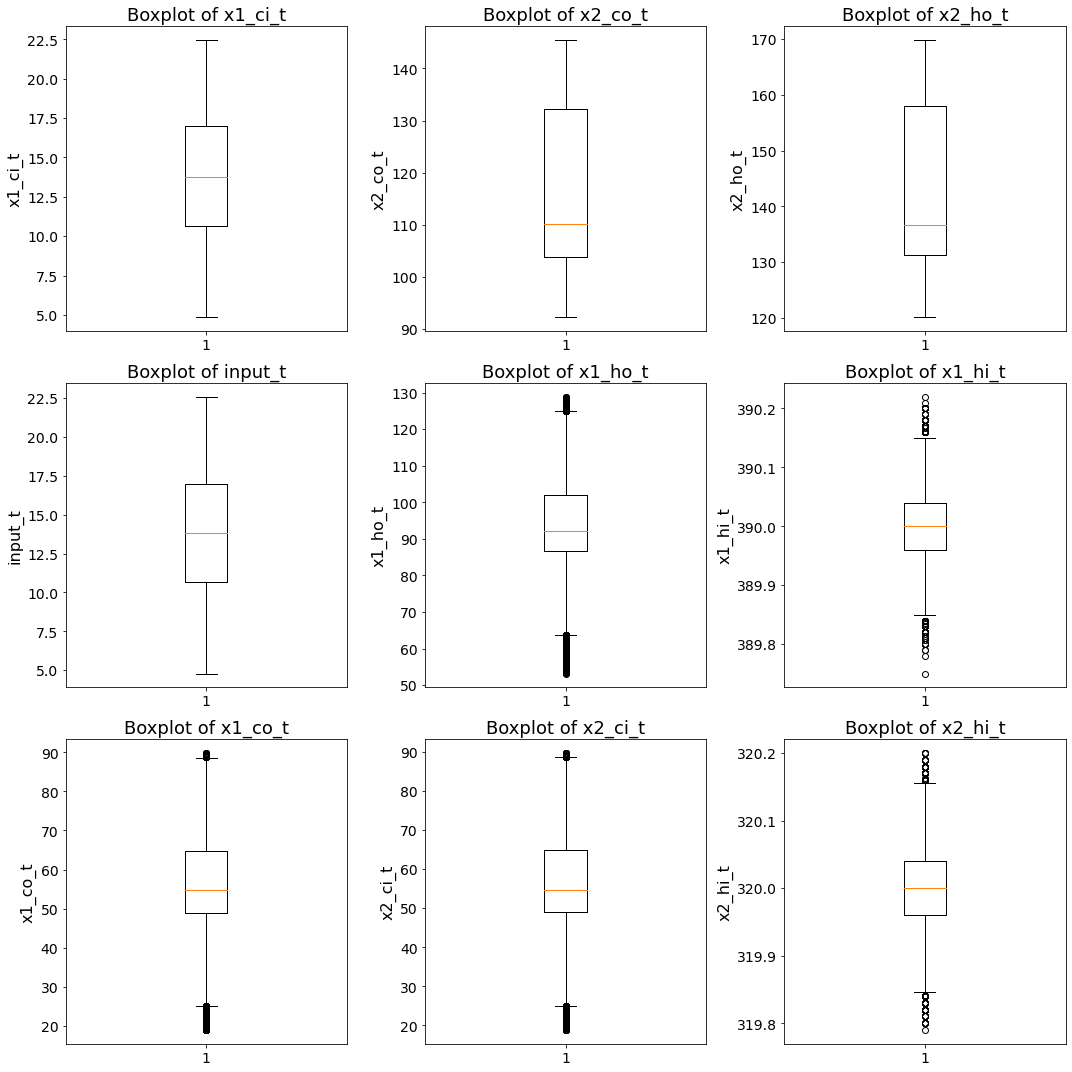

In [29]:
rows = 3
columns = 3
f, axes = plt.subplots(rows,columns, figsize=(15, 15))

plotted_cols = list(set(df.columns) - {'date', 'source', 'ph_lab', 'fe_lab'})
plotted_cols = [col for col in plotted_cols if col[-1] == 't']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[i,j].set_title(f"Boxplot of {col}", fontsize = 18)
            axes[i,j].set_ylabel(col, fontsize = 16)
            axes[i,j].boxplot(df.loc[:,col])
            
            axes[i,j].tick_params(axis='y', which='major', labelsize=14)
            axes[i,j].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

Temperature values corresponding to input-x1_ci and  x1_co-x2_ci  have the same mean, standard deviation and IQR values.

### Line Plots

**Line plots of caustic and cinh injection ratios**

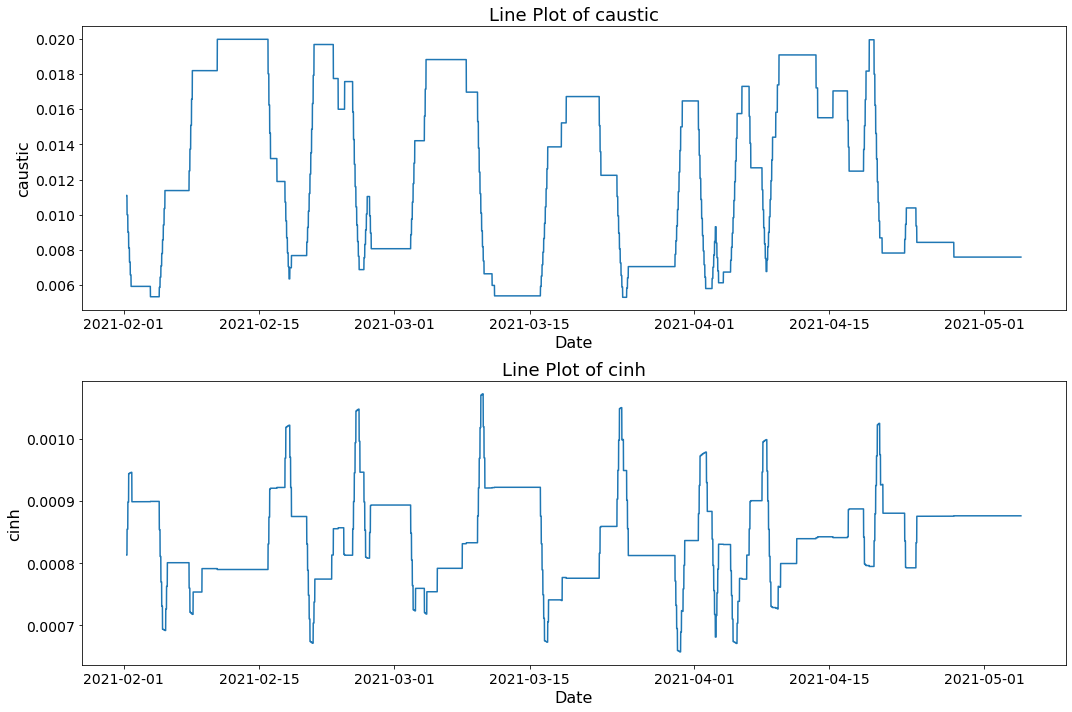

In [30]:
rows = 2
columns = 1
f, axes = plt.subplots(rows,columns, figsize=(15, 10))

plotted_cols = plotted_cols = ['caustic', 'cinh']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[i].set_title(f"Line Plot of {col}", fontsize=18)
            axes[i].set_ylabel(col, fontsize=16)
            axes[i].set_xlabel("Date", fontsize=16)
            axes[i].plot(df.date, df.loc[:,col])
            
            axes[i].tick_params(axis='y', which='major', labelsize=14)
            axes[i].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

**Answer:** As can be seen from the above figures, **caustic** and **cinh** values shows lots of jumps. 

**Line plots of pH and iron level**

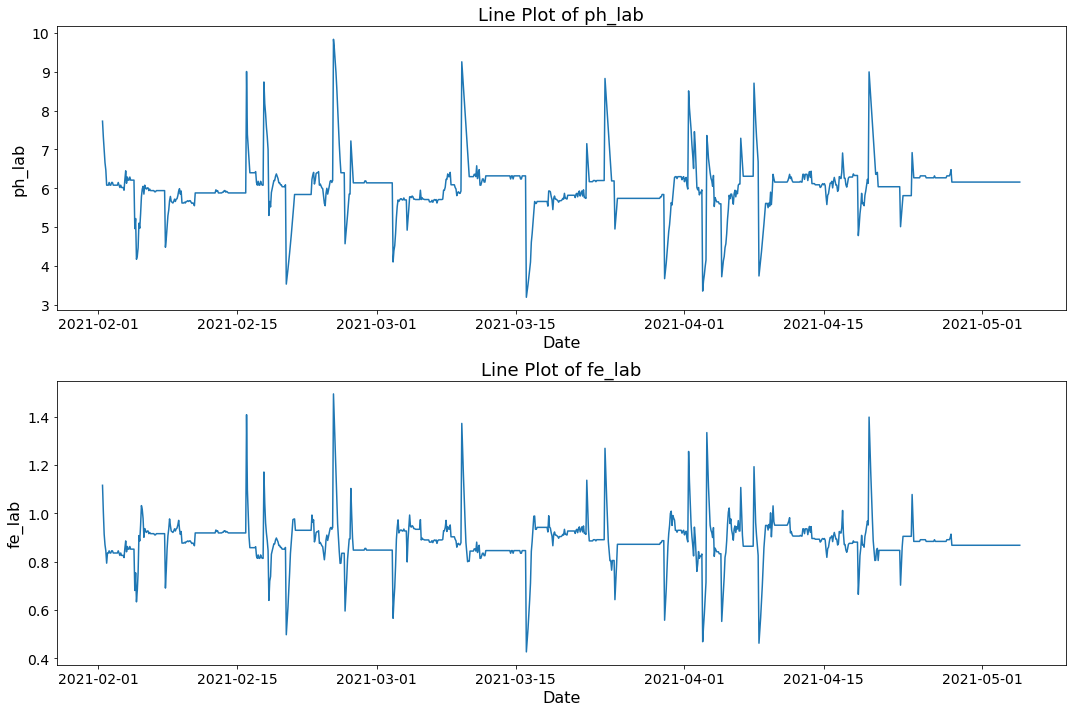

In [31]:
rows = 2
columns = 1
f, axes = plt.subplots(rows,columns, figsize=(15, 10))

df_plot = df.dropna(subset=['fe_lab', 'ph_lab'], how='any')

plotted_cols = ['ph_lab', 'fe_lab']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[i].set_title(f"Line Plot of {col}", fontsize=18)
            axes[i].set_ylabel(col, fontsize=16)
            axes[i].set_xlabel("Date", fontsize=16)
            axes[i].plot(df_plot.date, df_plot.loc[:,col])
            
            axes[i].tick_params(axis='y', which='major', labelsize=14)
            axes[i].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

**Answer:**ph_lab and fe_lab values follow almost the same pattern. Both show sudden changes.

**Flow sensor readings line plots**

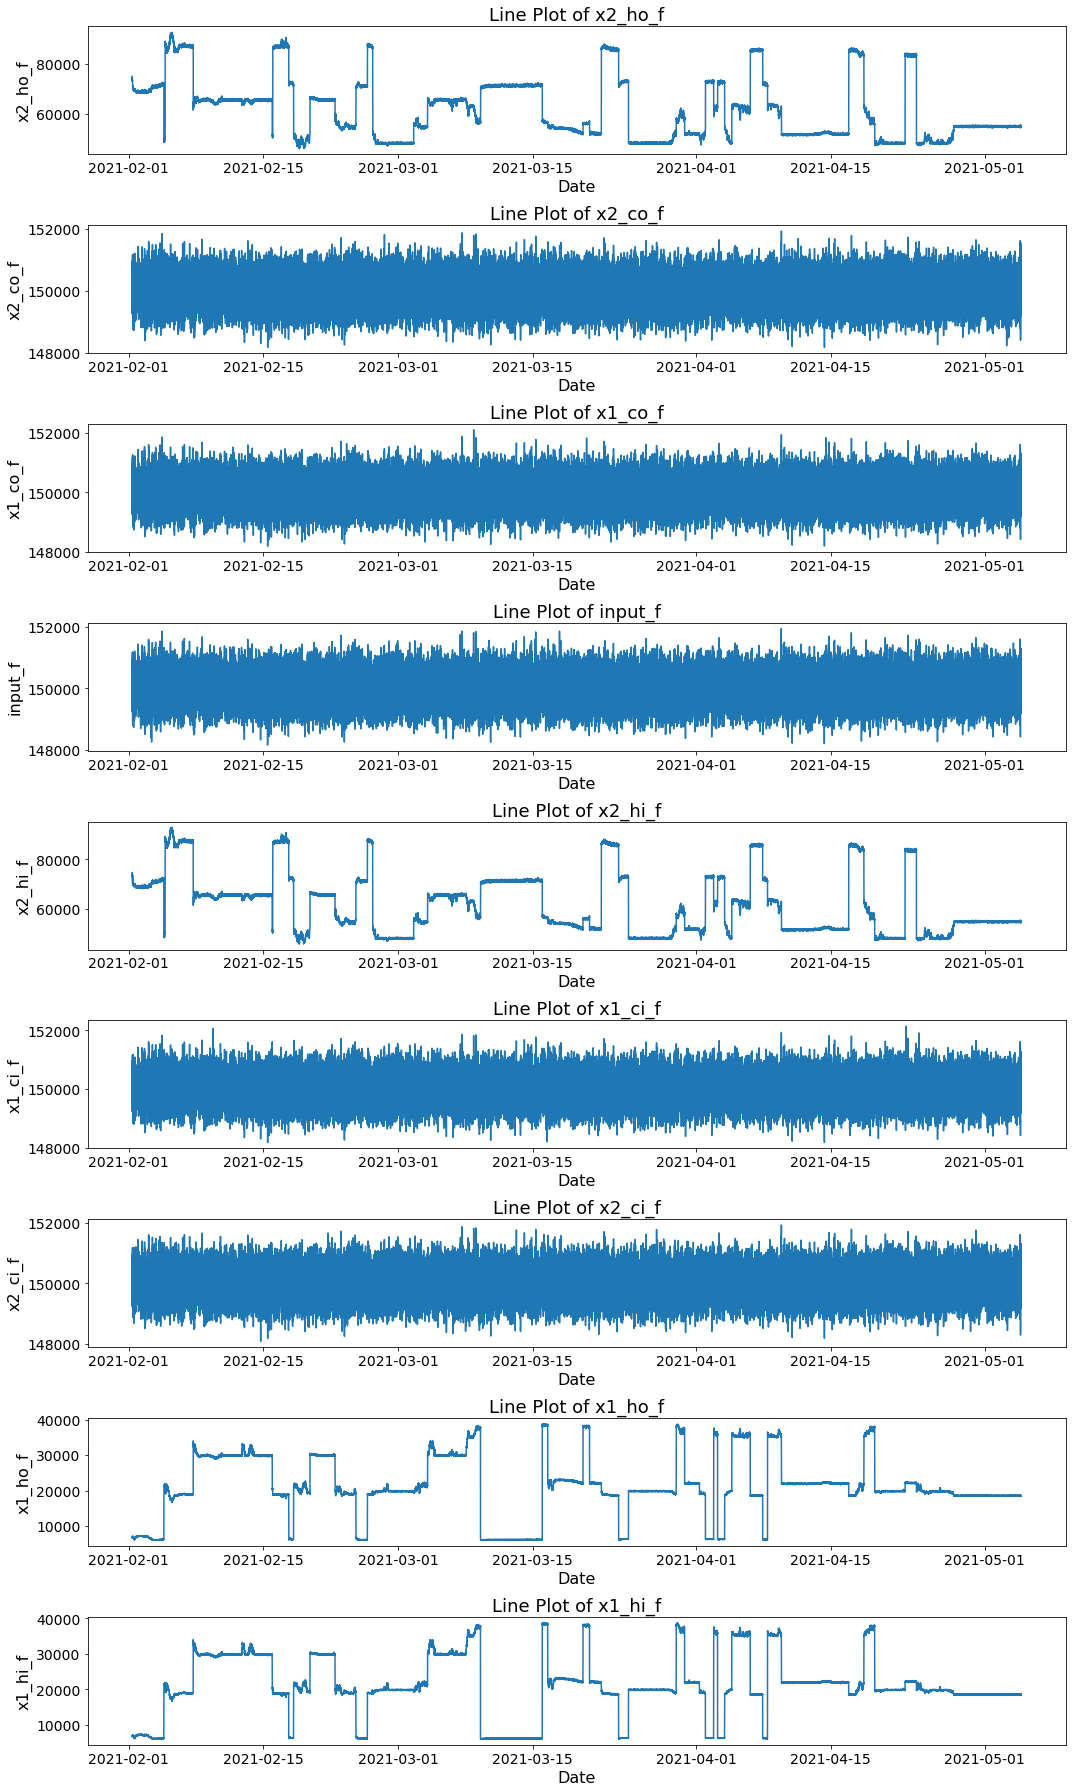

In [32]:
rows = 9
columns = 1
f, axes = plt.subplots(rows,columns, figsize=(15, 25))

plotted_cols = list(set(df.columns) - {'date', 'source', 'ph_lab', 'fe_lab'})
plotted_cols = [col for col in plotted_cols if col[-1] == 'f']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[i].set_title(f"Line Plot of {col}", fontsize=18)
            axes[i].set_ylabel(col, fontsize=16)
            axes[i].set_xlabel("Date", fontsize=16)
            axes[i].plot(df.date, df.loc[:,col])
            
            axes[i].tick_params(axis='y', which='major', labelsize=14)
            axes[i].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

**Answer:**
As can be seen from the above line charts; flow discharge values of input_f , x1_ci_f , x1_co_f , x2_ci_f and x2_co_f exhibit small changes. Remember from the boxplots that these attributes has same mean, standard deviation and IQR values. The other attributes' change in time is generally slow but there are some dramatic increases and decreases 

**Speed sensor readings line plots**

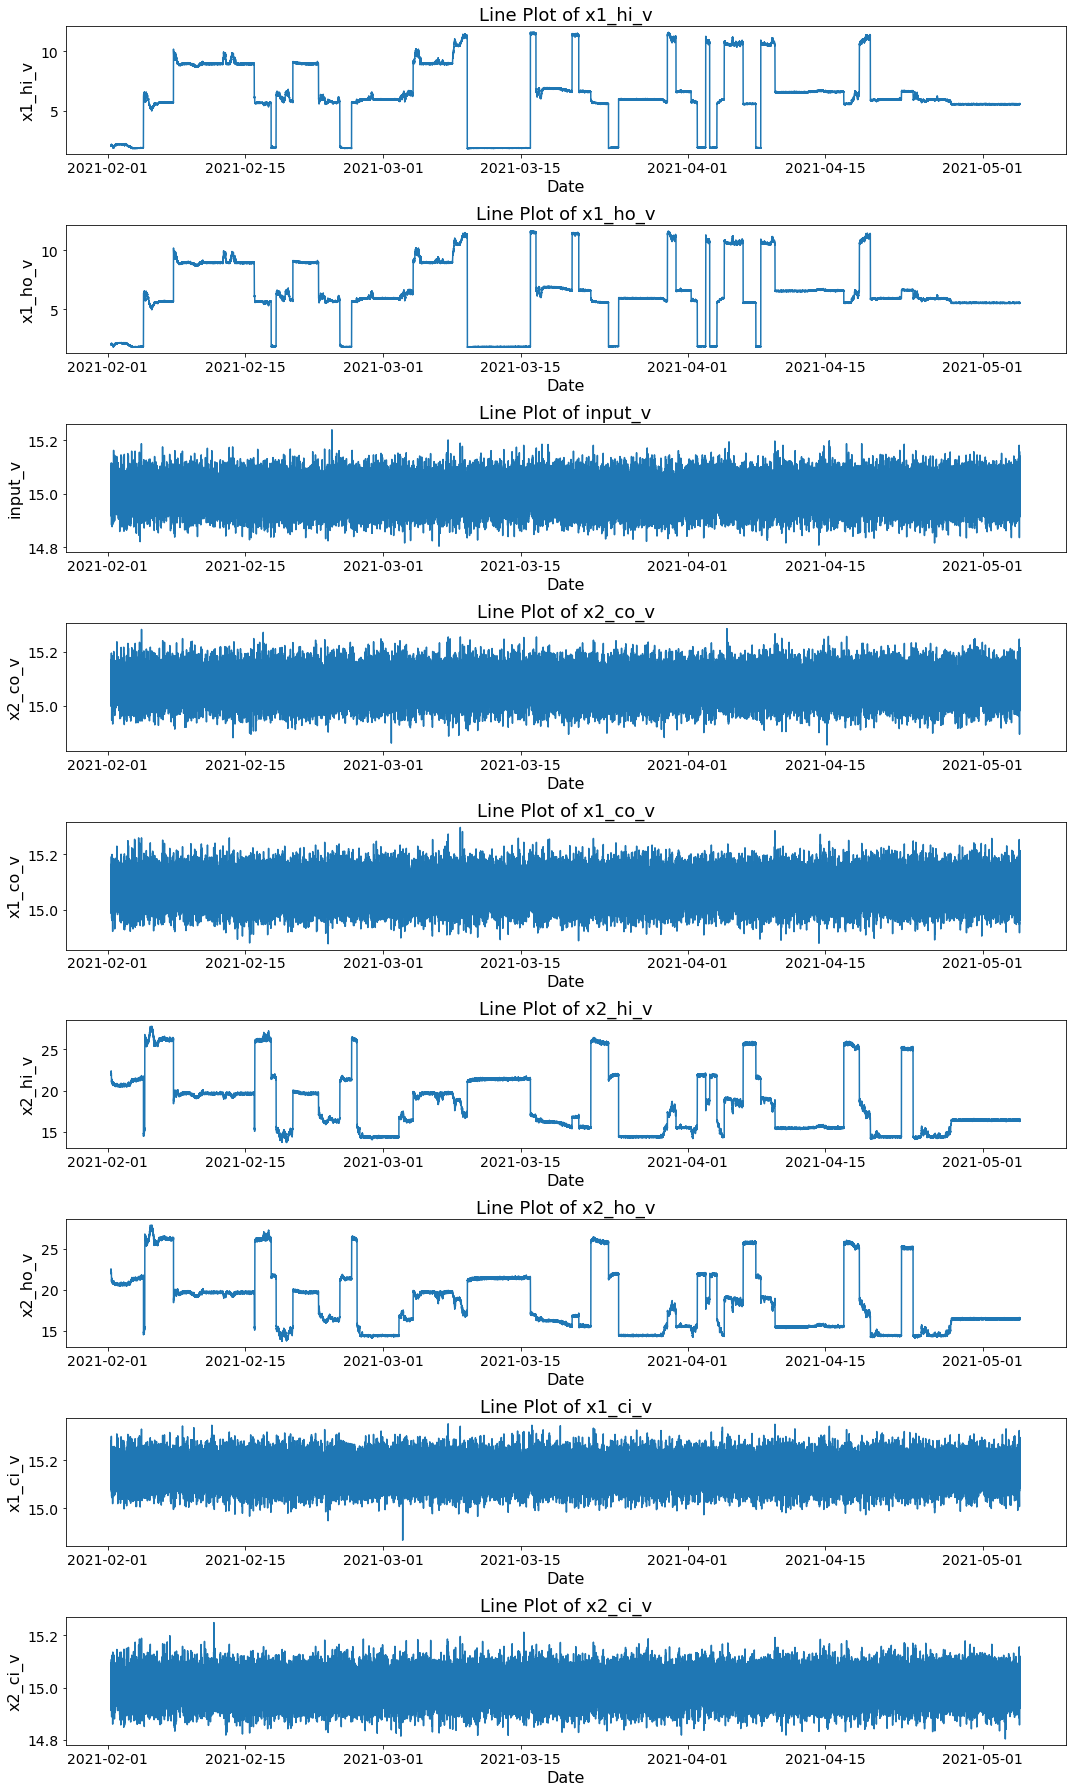

In [33]:
rows = 9
columns = 1
f, axes = plt.subplots(rows,columns, figsize=(15, 25))

plotted_cols = list(set(df.columns) - {'date', 'source', 'ph_lab', 'fe_lab'})
plotted_cols = [col for col in plotted_cols if col[-1] == 'v']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[i].set_title(f"Line Plot of {col}", fontsize=18)
            axes[i].set_ylabel(col, fontsize=16)
            axes[i].set_xlabel("Date", fontsize=16)
            axes[i].plot(df.date, df.loc[:,col])
            
            axes[i].tick_params(axis='y', which='major', labelsize=14)
            axes[i].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

**Answer:** Velocity values of input_v , x1_ci_v , x1_co_v , x2_ci_v and x2_co_v don't change significantly. The other attributes' change in time is generally slow but there are some dramatic increases and decreases

**Pressure sensor readings line plots**

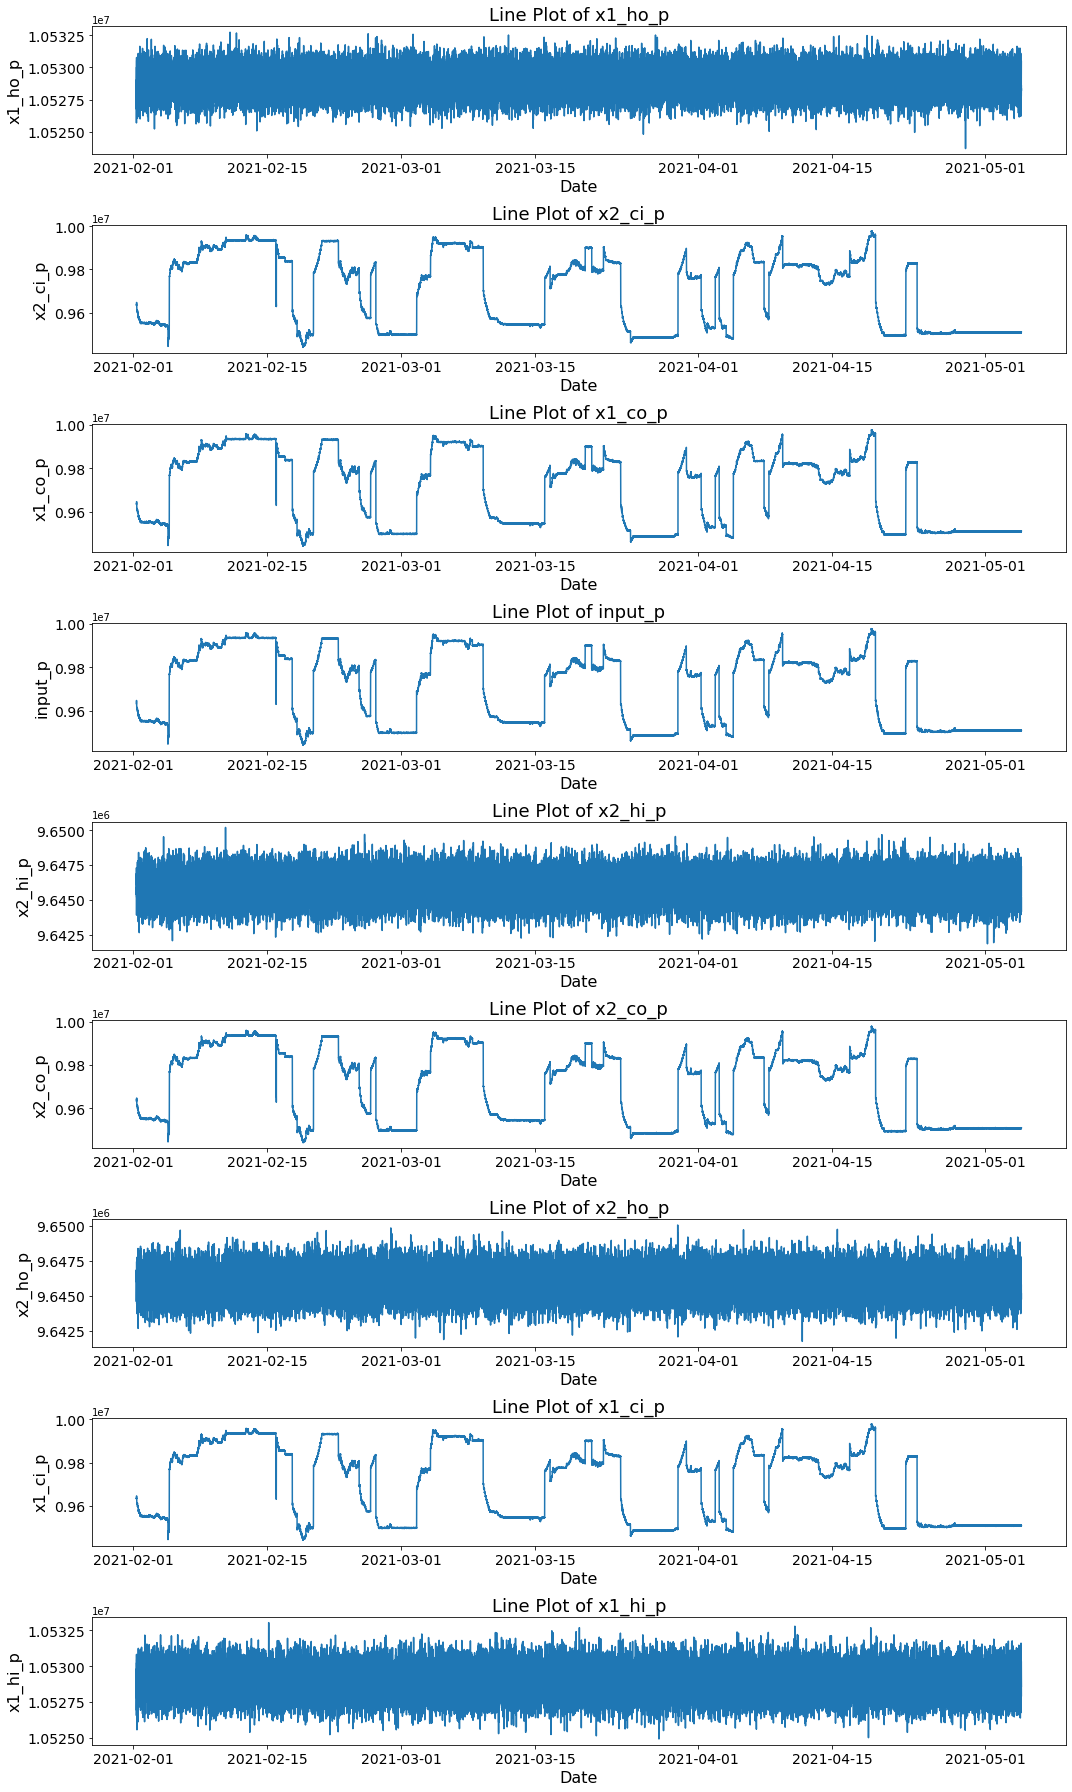

In [34]:
rows = 9
columns = 1
f, axes = plt.subplots(rows,columns, figsize=(15, 25))

plotted_cols = list(set(df.columns) - {'date', 'source', 'ph_lab', 'fe_lab'})
plotted_cols = [col for col in plotted_cols if col[-1] == 'p']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[i].set_title(f"Line Plot of {col}", fontsize=18)
            axes[i].set_ylabel(col, fontsize=16)
            axes[i].set_xlabel("Date", fontsize=16)
            axes[i].plot(df.date, df.loc[:,col])
            
            axes[i].tick_params(axis='y', which='major', labelsize=14)
            axes[i].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

**Answer:** Pressure values of x1_hi_p and x1_ho_p don't change with time. Input_p , x1_co_p , x1_ci_p , x2_ci_p  and x2_co_p follow same pattern as known from the boxplots.There are some jumps in the figures as seen. x2_hi_p and x2_ho_p follows the same regime as well. x2_hi_p and x2_ho_p is generally constant although there are some jumps 

**Tempreture sensor readings line plots**

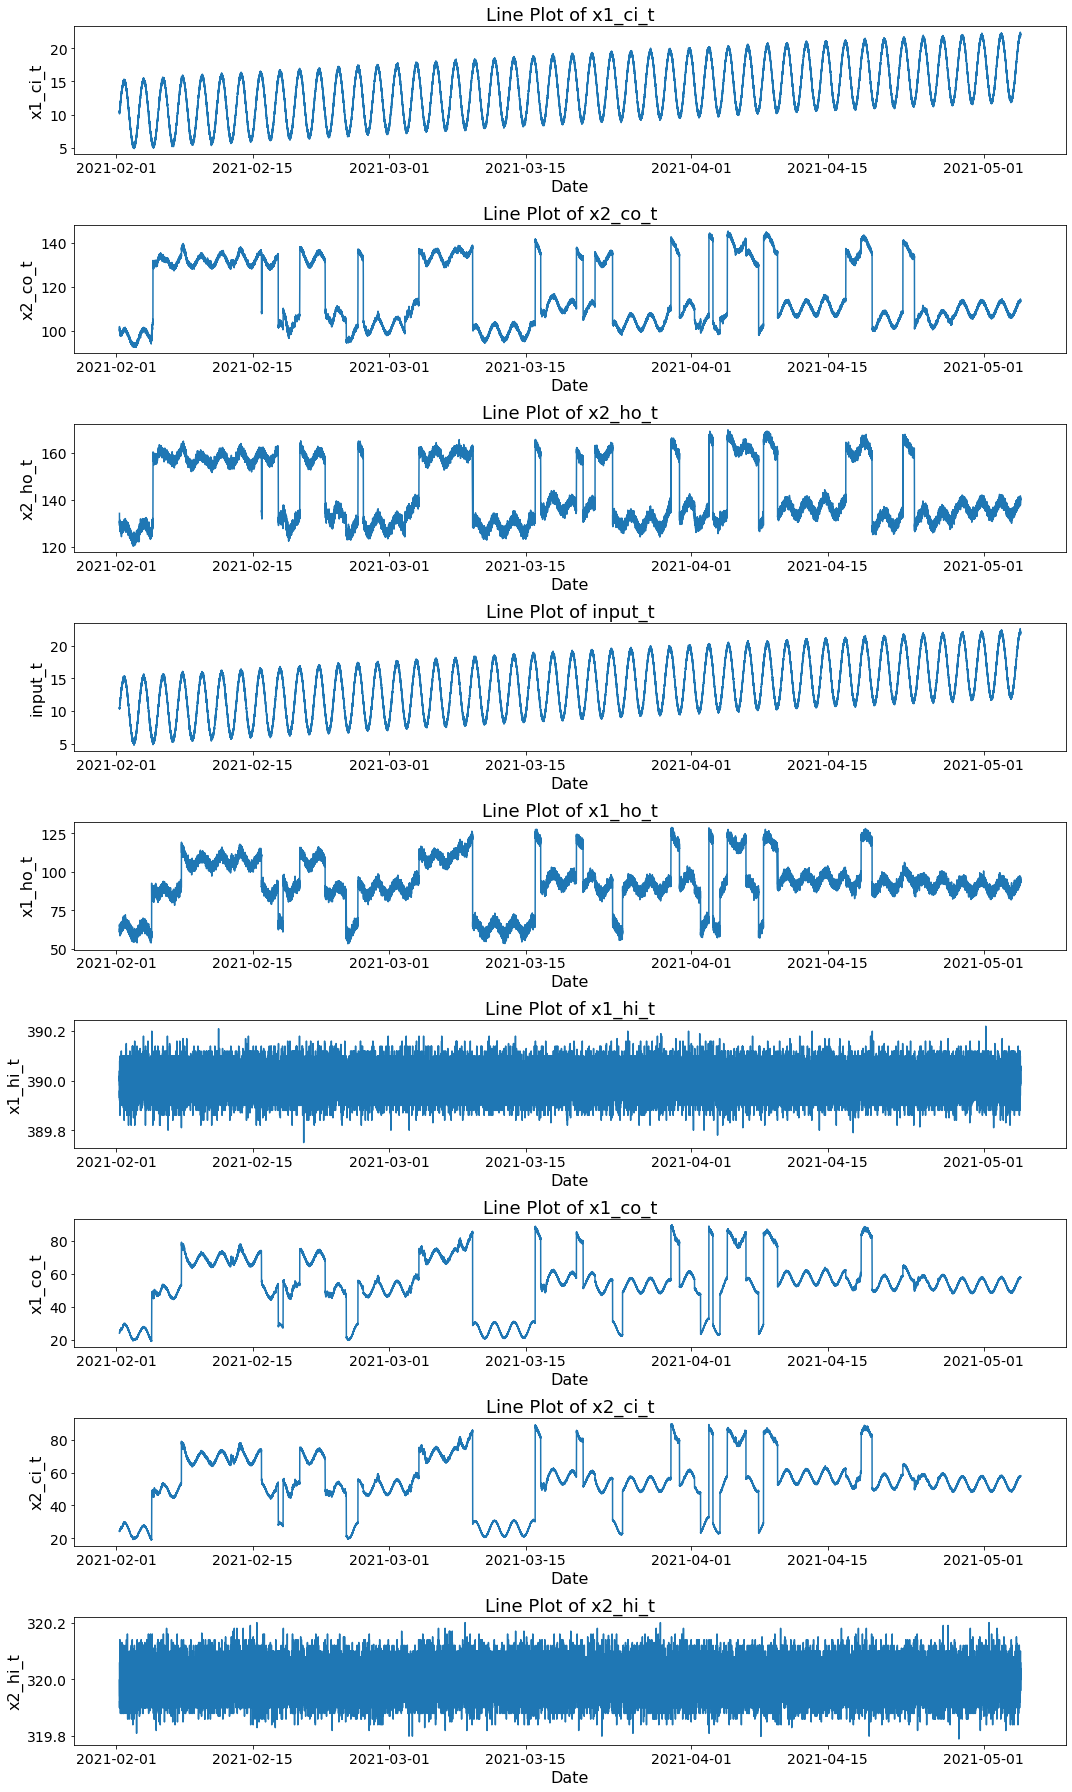

In [35]:
rows = 9
columns = 1
f, axes = plt.subplots(rows,columns, figsize=(15, 25))

plotted_cols = list(set(df.columns) - {'date', 'source', 'ph_lab', 'fe_lab'})
plotted_cols = [col for col in plotted_cols if col[-1] == 't']

count=0
for i in range(rows):
    for j in range(columns): 
        if count < len(plotted_cols):
            col = plotted_cols[count]
            axes[i].set_title(f"Line Plot of {col}", fontsize=18)
            axes[i].set_ylabel(col, fontsize=16)
            axes[i].set_xlabel("Date", fontsize=16)
            axes[i].plot(df.date, df.loc[:,col])
            
            axes[i].tick_params(axis='y', which='major', labelsize=14)
            axes[i].tick_params(axis='x', which='major', labelsize=14)
            count=count+1 
            
plt.tight_layout()
plt.show()

**Answer:** x1_co_t and x2_ci_t follow the same pattern. Input_t and x1_ci_t obey the same regime and  the change in input_t and x1_ci_t is rapid.  x1_hi_t and x2_hi_t don't change with time. 

Some of columns have don't much variance. Those columns are:
- **input_f**, **x1_ci_f**, **x2_ci_f**, **x1_co_f**, **x2_co_f**
- **input_v** ,**x1_co_v**, **x2_co_v**, **x1_ci_v**, **x2_ci_v**
- **x1_ho_p**, **x2_ho_p**, **x1_hi_p**, **x2_hi_p**
- **x1_hi_t** ,**x2_hi_t**

Maybe those columns are just constant value, and due to noise, we don't see constant value in line plot.

## Preprocessing


### Time Alignment

In [36]:
col2shift={}
def calc_time_alinment(distance, velocity = 15):
    """
    distance in meter
    velocity in cm/s
    return time alignment in minutes
    """
    return int(distance*100/velocity/60)

def create_shift_dict(dictionary, column_list, time_alignment):
    for col in column_list:
        dictionary[col] = time_alignment

_99m_behinds = ["x2_ho_t", "x2_ho_p","x2_ho_f","x2_ho_v", "x2_co_t", "x2_co_p","x2_co_f","x2_co_v"]
_135m_behinds = ["x2_hi_t", "x2_hi_p","x2_hi_f","x2_hi_v", "x2_ci_t", "x2_ci_p","x2_ci_f","x2_ci_v"]

_144m_behinds = ["x1_ho_t", "x1_ho_p","x1_ho_f","x1_ho_v", "x1_co_t", "x1_co_p","x1_co_f","x1_co_v"]
_180m_behinds = ["x1_hi_t", "x1_hi_p","x1_hi_f","x1_hi_v", "x1_ci_t", "x1_ci_p","x1_ci_f","x1_ci_v"]

_270m_behinds = ["input_t", "input_p", "input_f", "input_v", "caustic", "cinh"]

_99m_time_alignment = calc_time_alinment(99)
_135m_time_alignment = calc_time_alinment(135)
_144m_time_alignment = calc_time_alinment(144)
_180m_time_alignment = calc_time_alinment(180)
_270m_time_alignment = calc_time_alinment(270)

create_shift_dict(col2shift, _99m_behinds, _99m_time_alignment)
create_shift_dict(col2shift, _135m_behinds, _135m_time_alignment)
create_shift_dict(col2shift, _144m_behinds, _144m_time_alignment)
create_shift_dict(col2shift, _180m_behinds, _180m_time_alignment)
create_shift_dict(col2shift, _270m_behinds, _270m_time_alignment)
print(f"Time alignment for 99 m behind the output {_99m_time_alignment} min")
print(f"Time alignment for 135 m behind the output {_135m_time_alignment} min")
print(f"Time alignment for 144 m behind the output {_144m_time_alignment} min")
print(f"Time alignment for 180 m behind the output {_180m_time_alignment} min")
print(f"Time alignment for 270 m behind the output {_270m_time_alignment} min \n")
print("col2shift dictonary shows how much time alignment will be done for columns")
print(col2shift)

Time alignment for 99 m behind the output 11 min
Time alignment for 135 m behind the output 15 min
Time alignment for 144 m behind the output 16 min
Time alignment for 180 m behind the output 20 min
Time alignment for 270 m behind the output 30 min 

col2shift dictonary shows how much time alignment will be done for columns
{'x2_ho_t': 11, 'x2_ho_p': 11, 'x2_ho_f': 11, 'x2_ho_v': 11, 'x2_co_t': 11, 'x2_co_p': 11, 'x2_co_f': 11, 'x2_co_v': 11, 'x2_hi_t': 15, 'x2_hi_p': 15, 'x2_hi_f': 15, 'x2_hi_v': 15, 'x2_ci_t': 15, 'x2_ci_p': 15, 'x2_ci_f': 15, 'x2_ci_v': 15, 'x1_ho_t': 16, 'x1_ho_p': 16, 'x1_ho_f': 16, 'x1_ho_v': 16, 'x1_co_t': 16, 'x1_co_p': 16, 'x1_co_f': 16, 'x1_co_v': 16, 'x1_hi_t': 20, 'x1_hi_p': 20, 'x1_hi_f': 20, 'x1_hi_v': 20, 'x1_ci_t': 20, 'x1_ci_p': 20, 'x1_ci_f': 20, 'x1_ci_v': 20, 'input_t': 30, 'input_p': 30, 'input_f': 30, 'input_v': 30, 'caustic': 30, 'cinh': 30}


**col2shift** dictonary shows how much time alignment will be done for columns. We plan to align whole data to output time.

In [37]:
for col in col2shift.keys():
    df[col] = df[[col]].shift(col2shift[col])

df.head()

date  caustic  cinh  fe_lab  input_f  input_p  input_t  \
4 2021-02-01 08:04:00      NaN   NaN     NaN      NaN      NaN      NaN   
5 2021-02-01 08:05:00      NaN   NaN     NaN      NaN      NaN      NaN   
6 2021-02-01 08:06:00      NaN   NaN     NaN      NaN      NaN      NaN   
7 2021-02-01 08:07:00      NaN   NaN     NaN      NaN      NaN      NaN   
8 2021-02-01 08:08:00      NaN   NaN     NaN      NaN      NaN      NaN   

   input_v  ph_lab source  ...  x2_co_t  x2_co_v  x2_hi_f  x2_hi_p  x2_hi_t  \
4      NaN     NaN      A  ...      NaN      NaN      NaN      NaN      NaN   
5      NaN     NaN      A  ...      NaN      NaN      NaN      NaN      NaN   
6      NaN     NaN      A  ...      NaN      NaN      NaN      NaN      NaN   
7      NaN     NaN      A  ...      NaN      NaN      NaN      NaN      NaN   
8      NaN     NaN      A  ...      NaN      NaN      NaN      NaN      NaN   

   x2_hi_v  x2_ho_f  x2_ho_p  x2_ho_t  x2_ho_v  
4      NaN      NaN      NaN      NaN      NaN  
5      NaN      NaN      NaN      NaN      NaN  
6      NaN      NaN      NaN      NaN      NaN  
7      NaN      NaN      NaN      NaN      NaN  
8      NaN      NaN      NaN      NaN      NaN  

[5 rows x 42 columns]

### Finding Corraleted Features

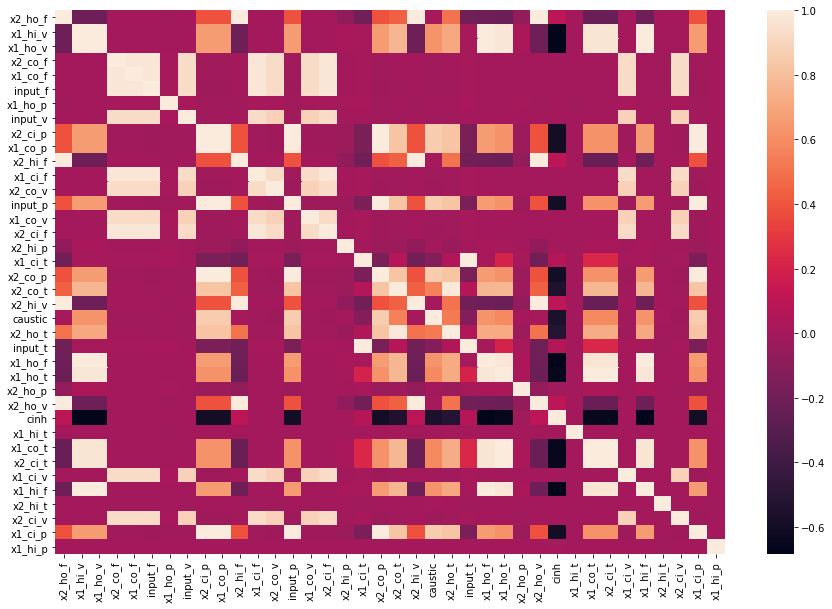

In [38]:
fig = plt.figure( figsize=(15, 10))
corr = df[cols].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [39]:
def find_correlated_features(df, threshold, target_variable):
    # remove target column
    df = df.drop(columns=target_variable).copy()
    # Get correlation matrix
    corr_matrix = df.corr().abs()
    # Take half of the matrix to prevent doubling results
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
    # Restructure correlation matrix to dataframe
    df = corr_matrix.stack().reset_index()
    df.columns = ['feature1', 'feature2', 'corr_coef']
    # Apply filter and sort coefficients
    df = df[df.corr_coef >= threshold].sort_values('corr_coef', ascending=False)
    return df

df_corr = find_correlated_features(df, 0.95, ['source'])
df_corr

feature1 feature2  corr_coef
755  x2_hi_f  x2_ho_f       1.00
507  x1_hi_f  x1_ho_f       1.00
570  x1_hi_v  x1_ho_f       1.00
592  x1_ho_f  x1_ho_v       1.00
758  x2_hi_f  x2_ho_v       1.00
776  x2_ho_f  x2_ho_v       1.00
506  x1_hi_f  x1_hi_v       1.00
510  x1_hi_f  x1_ho_v       1.00
770  x2_hi_v  x2_ho_f       1.00
754  x2_hi_f  x2_hi_v       1.00
573  x1_hi_v  x1_ho_v       1.00
170  input_p  x2_ci_p       1.00
330  x1_ci_p  x2_ci_p       1.00
154  input_p  x1_ci_p       1.00
174  input_p  x2_co_p       1.00
678  x2_ci_p  x2_co_p       1.00
158  input_p  x1_co_p       1.00
334  x1_ci_p  x2_co_p       1.00
318  x1_ci_p  x1_co_p       1.00
440  x1_co_p  x2_ci_p       1.00
444  x1_co_p  x2_co_p       1.00
773  x2_hi_v  x2_ho_v       1.00
466  x1_co_t  x2_ci_t       1.00
189  input_t  x1_ci_t       1.00
630  x1_ho_t  x2_ci_t       0.99
462  x1_co_t  x1_ho_t       0.99
742  x2_co_t  x2_ho_t       0.99
413  x1_co_f  x2_ci_f       0.98
417  x1_co_f  x2_co_f       0.98
122  input_f  x1_co_f       0.98
134  input_f  x2_ci_f       0.98
287  x1_ci_f  x1_co_f       0.98
663  x2_ci_f  x2_co_f       0.98
138  input_f  x2_co_f       0.98
299  x1_ci_f  x2_ci_f       0.98
118  input_f  x1_ci_f       0.98
303  x1_ci_f  x2_co_f       0.98
627  x1_ho_t  x1_ho_v       0.97
591  x1_ho_f  x1_ho_t       0.97
509  x1_hi_f  x1_ho_t       0.97
572  x1_hi_v  x1_ho_t       0.97
595  x1_ho_f  x2_ci_t       0.97
513  x1_hi_f  x2_ci_t       0.97
646  x1_ho_v  x2_ci_t       0.97
460  x1_co_t  x1_ho_f       0.97
463  x1_co_t  x1_ho_v       0.97
576  x1_hi_v  x2_ci_t       0.97
456  x1_co_t  x1_hi_f       0.97
459  x1_co_t  x1_hi_v       0.97

There are a lot of correlated features after time alignment. Therefore, we need to drop one of the features we keep the other one if correlation is higher than 90%

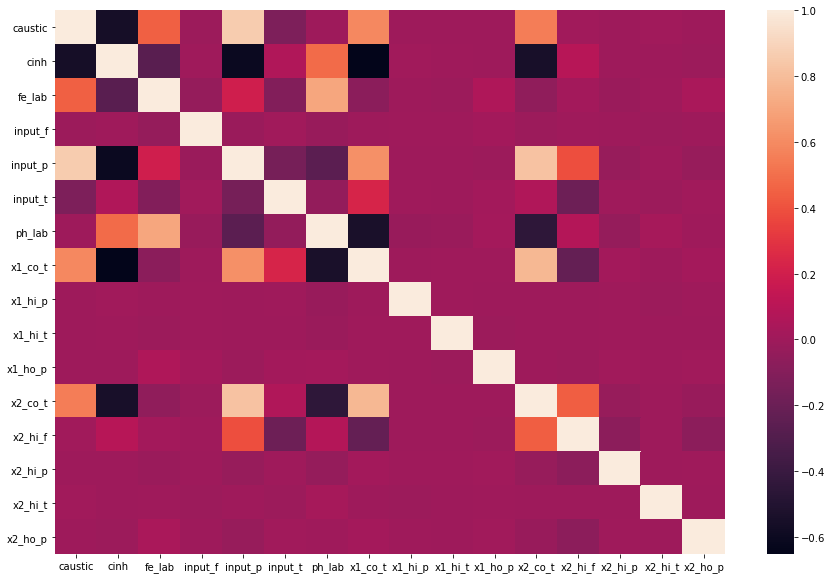

In [40]:
df_corr = find_correlated_features(df, 0.90, ['source'])
drop_list = list(df_corr['feature2'].unique())

df_model = df.drop(columns = drop_list)
fig = plt.figure( figsize=(15, 10))
corr = df_model[df_model.columns].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

### Standardization

In [41]:
cols = cols = list(set(df_model.columns) - {"date", "source"})
df_model_original = df_model.copy()
scaler = StandardScaler()
df_model[cols] = scaler.fit_transform(df_model[cols])
df_model.head()

date  caustic  cinh  fe_lab  input_f  input_p  input_t  \
4 2021-02-01 08:04:00      NaN   NaN     NaN      NaN      NaN      NaN   
5 2021-02-01 08:05:00      NaN   NaN     NaN      NaN      NaN      NaN   
6 2021-02-01 08:06:00      NaN   NaN     NaN      NaN      NaN      NaN   
7 2021-02-01 08:07:00      NaN   NaN     NaN      NaN      NaN      NaN   
8 2021-02-01 08:08:00      NaN   NaN     NaN      NaN      NaN      NaN   

   ph_lab source  x1_co_t  x1_hi_p  x1_hi_t  x1_ho_p  x2_co_t  x2_hi_f  \
4     NaN      A      NaN      NaN      NaN      NaN      NaN      NaN   
5     NaN      A      NaN      NaN      NaN      NaN      NaN      NaN   
6     NaN      A      NaN      NaN      NaN      NaN      NaN      NaN   
7     NaN      A      NaN      NaN      NaN      NaN      NaN      NaN   
8     NaN      A      NaN      NaN      NaN      NaN      NaN      NaN   

   x2_hi_p  x2_hi_t  x2_ho_p  
4      NaN      NaN      NaN  
5      NaN      NaN      NaN  
6      NaN      NaN      NaN  
7      NaN      NaN      NaN  
8      NaN      NaN      NaN

In [42]:
df_model = df_model.dropna(subset=['fe_lab', 'ph_lab'], how='any')
df_model.head()

date  caustic  cinh  fe_lab  input_f  input_p  input_t  \
120 2021-02-01 10:00:00    -0.42  0.20    2.56    -1.74    -0.55    -0.59   
240 2021-02-01 12:00:00    -0.62  0.83    1.33    -0.90    -0.61    -0.28   
360 2021-02-01 14:00:00    -0.80  1.50    0.30     0.40    -0.73    -0.00   
480 2021-02-01 16:00:00    -0.96  1.51   -0.19     1.39    -0.79     0.08   
600 2021-02-01 18:00:00    -1.10  1.52   -0.47     0.01    -0.85     0.28   

     ph_lab source  x1_co_t  x1_hi_p  x1_hi_t  x1_ho_p  x2_co_t  x2_hi_f  \
120    2.52      A    -1.82     0.16    -1.03    -0.08    -1.14     0.73   
240    1.91      A    -1.75    -0.83    -0.20     0.40    -1.20     0.66   
360    1.42      A    -1.74    -0.46     0.00     0.86    -1.17     0.66   
480    0.93      A    -1.69     0.40     0.00    -0.60    -1.16     0.67   
600    0.65      A    -1.59    -0.96     2.06     0.53    -1.08     0.60   

     x2_hi_p  x2_hi_t  x2_ho_p  
120     0.67    -0.60    -0.45  
240     0.45     0.01     2.32  
360    -1.31     0.01     0.71  
480    -0.23     0.01    -0.59  
600     0.60     0.22     0.34

In [43]:
df_model.dropna(inplace=True)
df_model.head()

date  caustic  cinh  fe_lab  input_f  input_p  input_t  \
120 2021-02-01 10:00:00    -0.42  0.20    2.56    -1.74    -0.55    -0.59   
240 2021-02-01 12:00:00    -0.62  0.83    1.33    -0.90    -0.61    -0.28   
360 2021-02-01 14:00:00    -0.80  1.50    0.30     0.40    -0.73    -0.00   
480 2021-02-01 16:00:00    -0.96  1.51   -0.19     1.39    -0.79     0.08   
600 2021-02-01 18:00:00    -1.10  1.52   -0.47     0.01    -0.85     0.28   

     ph_lab source  x1_co_t  x1_hi_p  x1_hi_t  x1_ho_p  x2_co_t  x2_hi_f  \
120    2.52      A    -1.82     0.16    -1.03    -0.08    -1.14     0.73   
240    1.91      A    -1.75    -0.83    -0.20     0.40    -1.20     0.66   
360    1.42      A    -1.74    -0.46     0.00     0.86    -1.17     0.66   
480    0.93      A    -1.69     0.40     0.00    -0.60    -1.16     0.67   
600    0.65      A    -1.59    -0.96     2.06     0.53    -1.08     0.60   

     x2_hi_p  x2_hi_t  x2_ho_p  
120     0.67    -0.60    -0.45  
240     0.45     0.01     2.32  
360    -1.31     0.01     0.71  
480    -0.23     0.01    -0.59  
600     0.60     0.22     0.34

In [44]:
# df_model = df.dropna(subset=['fe_lab', 'ph_lab'], how='any')

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 120 to 133080
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1109 non-null   datetime64[ns]
 1   caustic  1109 non-null   float64       
 2   cinh     1109 non-null   float64       
 3   fe_lab   1109 non-null   float64       
 4   input_f  1109 non-null   float64       
 5   input_p  1109 non-null   float64       
 6   input_t  1109 non-null   float64       
 7   ph_lab   1109 non-null   float64       
 8   source   1109 non-null   object        
 9   x1_co_t  1109 non-null   float64       
 10  x1_hi_p  1109 non-null   float64       
 11  x1_hi_t  1109 non-null   float64       
 12  x1_ho_p  1109 non-null   float64       
 13  x2_co_t  1109 non-null   float64       
 14  x2_hi_f  1109 non-null   float64       
 15  x2_hi_p  1109 non-null   float64       
 16  x2_hi_t  1109 non-null   float64       
 17  x2_ho_p  1109 non-null   floa

## 4. Predict pH and Iron levels

Since it is not allowed to use any time series. Therefore, we should not use data that belongs to previous time. As a result of this, we ignore the rows that have missing value of pH and Iron level. This means we use every two hour data to predict its pH and iron level.

**date** and **source** columns won't be used in model training. Therefore they are dropped.

In [45]:
df_model = df_model.dropna(subset=['fe_lab', 'ph_lab'], how='any')
y_cluster = df_model['source']
# Drop source and date columns
df_model.drop(columns=['date', 'source'], inplace = True)

print(f"Shape of data : {df_model.shape}")

# Check whether data has missing value or not
if df_model.isna().sum().sum() == 0:
    print('Data does not have any missing values')

df_model.head()

Shape of data : (1109, 16)
Data does not have any missing values


caustic  cinh  fe_lab  input_f  input_p  input_t  ph_lab  x1_co_t  \
120    -0.42  0.20    2.56    -1.74    -0.55    -0.59    2.52    -1.82   
240    -0.62  0.83    1.33    -0.90    -0.61    -0.28    1.91    -1.75   
360    -0.80  1.50    0.30     0.40    -0.73    -0.00    1.42    -1.74   
480    -0.96  1.51   -0.19     1.39    -0.79     0.08    0.93    -1.69   
600    -1.10  1.52   -0.47     0.01    -0.85     0.28    0.65    -1.59   

     x1_hi_p  x1_hi_t  x1_ho_p  x2_co_t  x2_hi_f  x2_hi_p  x2_hi_t  x2_ho_p  
120     0.16    -1.03    -0.08    -1.14     0.73     0.67    -0.60    -0.45  
240    -0.83    -0.20     0.40    -1.20     0.66     0.45     0.01     2.32  
360    -0.46     0.00     0.86    -1.17     0.66    -1.31     0.01     0.71  
480     0.40     0.00    -0.60    -1.16     0.67    -0.23     0.01    -0.59  
600    -0.96     2.06     0.53    -1.08     0.60     0.60     0.22     0.34

### 4.1 Predicting pH Level

In [46]:
X = df_model.drop(columns = ['fe_lab', 'ph_lab'])
y = df_model['ph_lab']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
X_train.head()

caustic  cinh  input_f  input_p  input_t  x1_co_t  x1_hi_p  x1_hi_t  \
37560    -0.81  0.76     0.41    -1.20    -0.10    -0.17     0.82     0.41   
69840     0.92 -0.95    -0.13     0.49     1.30     0.38     0.18     0.00   
26640    -0.88  0.50     0.48    -1.19     0.73    -0.04    -0.61     0.41   
28320     1.51 -0.97    -0.39     1.34    -1.62     0.68    -0.70    -1.24   
62400    -0.33 -2.43    -0.98     0.08    -1.13    -0.28    -1.29     2.06   

       x1_ho_p  x2_co_t  x2_hi_f  x2_hi_p  x2_hi_t  x2_ho_p  
37560     0.64    -0.91    -1.12    -0.41     0.01     0.12  
69840     0.45    -0.20    -0.82    -0.47    -1.63    -1.07  
26640     0.49    -0.59    -0.84     0.32     0.01     0.51  
28320     1.63     0.88     0.32     0.49     0.01     1.23  
62400     1.10    -0.59    -0.55    -0.98    -0.81     0.06

In [48]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:06<00:00,  7.09it/s]


In [49]:
print(models)

                               R-Squared  RMSE  Time Taken
Model                                                     
MLPRegressor                        0.84  0.38        1.30
ExtraTreesRegressor                 0.82  0.40        0.33
LGBMRegressor                       0.82  0.40        0.14
HistGradientBoostingRegressor       0.82  0.40        1.46
GradientBoostingRegressor           0.81  0.42        0.30
XGBRegressor                        0.80  0.43        0.22
LassoLarsIC                         0.74  0.49        0.02
RidgeCV                             0.74  0.49        0.01
LassoCV                             0.74  0.49        0.26
BayesianRidge                       0.74  0.49        0.02
TransformedTargetRegressor          0.74  0.49        0.01
LinearRegression                    0.74  0.49        0.02
LassoLarsCV                         0.74  0.49        0.06
ElasticNetCV                        0.74  0.49        0.19
KernelRidge                         0.74  0.49        0.

According to the r2 score of the different models, we select to use **ExtraTreeRegressor**. We will do hyperparameter tuning to this model. Lazypredict results are presented because we want to give you reasoning to model selection.

In [50]:
# Grid search for parameter selection.
extra_tree_reg_params = {
    'n_estimators': [85,95,105,115,125,135],
    'max_depth' : [15,20,25,30,None]
}
extra_tree_reg = GridSearchCV(ExtraTreesRegressor(), param_grid=extra_tree_reg_params).fit(X_train, y_train).best_estimator_

ExtraTreeRegressor parameter values:

In [51]:
extra_tree_reg.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 95,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
print(f"MSE of train data :{mean_squared_error(y_train, extra_tree_reg.predict(X_train))}")
print(f"MSE of test data :{mean_squared_error(y_test, extra_tree_reg.predict(X_test))}\n")

print(f"MEA of train data :{mean_absolute_error(y_train, extra_tree_reg.predict(X_train))}")
print(f"MEA of test data :{mean_absolute_error(y_test, extra_tree_reg.predict(X_test))}\n")

print(f"R2 score of train data :{r2_score(y_train, extra_tree_reg.predict(X_train))}")
print(f"R2 score of test data :{r2_score(y_test, extra_tree_reg.predict(X_test))}")

MSE of train data :1.863174266942085e-30
MSE of test data :0.1492459846428731

MEA of train data :7.101092504945907e-16
MEA of test data :0.125951559437649

R2 score of train data :1.0
R2 score of test data :0.8355432233833777


Our model has good R2 score and low mean absolute and mean square error.

### 4.2 Predicting Iron Level

In [53]:
X = df_model.drop(columns = ['fe_lab', 'ph_lab'])
y = df_model['fe_lab']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:05<00:00,  8.33it/s]


In [55]:
print(models)

                               R-Squared  RMSE  Time Taken
Model                                                     
XGBRegressor                        0.81  0.42        0.20
GradientBoostingRegressor           0.80  0.43        0.25
HistGradientBoostingRegressor       0.80  0.43        1.31
ExtraTreesRegressor                 0.79  0.45        0.33
MLPRegressor                        0.78  0.46        1.11
LGBMRegressor                       0.77  0.47        0.11
RandomForestRegressor               0.73  0.51        0.57
BaggingRegressor                    0.72  0.52        0.07
LassoCV                             0.70  0.54        0.23
RidgeCV                             0.70  0.54        0.01
LassoLarsIC                         0.70  0.54        0.02
BayesianRidge                       0.70  0.54        0.01
ElasticNetCV                        0.70  0.54        0.16
LassoLarsCV                         0.70  0.54        0.04
TransformedTargetRegressor          0.70  0.54        0.

According to the r2 score of the different models, we select to use **XGBRegressor**. We will do hyperparameter tuning to this model. Lazypredict results are presented because we want to give you reasoning to model selection.

In [56]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0) 

xgbr_params = {
    'eta': [0.1,0.3, 0.5],
    'max_depth' : [3,5,7,10],
    'alpha': [0.001,0.01,0.1]
}
xgbr = GridSearchCV(xgb.XGBRegressor(), param_grid=xgbr_params).fit(X_train, y_train).best_estimator_


In [57]:
xgbr.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0.100000001,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'alpha': 0.1,
 'eta': 0.3}

In [58]:
print(f"MSE of train data :{mean_squared_error(y_train, xgbr.predict(X_train))}")
print(f"MSE of test data :{mean_squared_error(y_test, xgbr.predict(X_test))}\n")

print(f"MEA of train data :{mean_absolute_error(y_train, xgbr.predict(X_train))}")
print(f"MEA of test data :{mean_absolute_error(y_test, xgbr.predict(X_test))}\n")

print(f"R2 score of train data :{r2_score(y_train, xgbr.predict(X_train))}")
print(f"R2 score of test data :{r2_score(y_test, xgbr.predict(X_test))}")

MSE of train data :0.005105438776498042
MSE of test data :0.17777434035232698

MEA of train data :0.04888852816109271
MEA of test data :0.18298303049505824

R2 score of train data :0.9949753087435591
R2 score of test data :0.815273949524482


Our model has good R2 score and low mean absolute and mean square error. Of course, it would be better if we obtain r2 square which is grater than 0.9

## 5. Clustering

### Within Sum of Squares(WSS) - Elbow Method For Optimal k 
The total within-cluster sum of squares (WSS) measures the compactness of the clustering and we want it to be as small as possible. The optimal number of clusters can be determined by looking at where the elbow/bend in the knee occurs. According to this, by looking at the within-cluster sum of square (WSS), it can be said that it is difficult to state elbow position but the most prominent elbow occur in k=2. Therefore, according to wss graph the optimal number of clusters is 2 because the bend in the knee occurs there. 

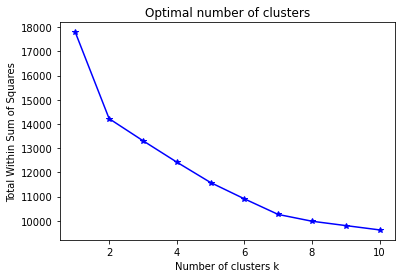

In [59]:
X = df_model
y = y_cluster
wss = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(X)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
# plt.axis([0, 11, 0, 10000])
plt.show()

### Average Silhouette Approach    
The average silhouette approach measures the quality of a clustering. It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k. According to this, by looking at the silhouete graph, it can be said that the optimal number of k is 2.

n_clusters = 2 The average silhouette_score is : 0.1949
n_clusters = 3 The average silhouette_score is : 0.1705
n_clusters = 4 The average silhouette_score is : 0.1443
n_clusters = 5 The average silhouette_score is : 0.1529
n_clusters = 6 The average silhouette_score is : 0.1559
n_clusters = 7 The average silhouette_score is : 0.1540
n_clusters = 8 The average silhouette_score is : 0.1321
n_clusters = 9 The average silhouette_score is : 0.1151
n_clusters = 10 The average silhouette_score is : 0.1114


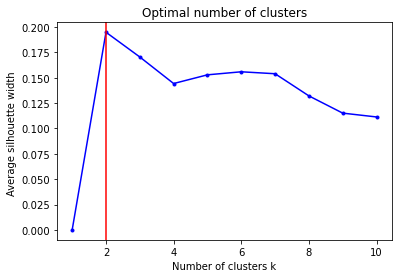

In [60]:
sil_avg = [0]
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    cluster_labels=kmeans.fit_predict(X) ###same with>> cluster_labels=kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)


plt.plot(range(1,len(sil_avg)+1), sil_avg, "b.-")
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
plt.show()   

### DBSCAN

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

If we use DBSCAN with the adjusted_rand_score, we find k = 7

In [61]:
eps_list = np.arange(0.1, 2.6, 0.1).tolist()
min_samples_list = [5, 10, 15, 20]

metric_score_temp = 0
best_dbscan = None

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        result = dbscan.fit_predict(X)
        metric_score = adjusted_rand_score(result, y)
        if metric_score_temp < metric_score:
            metric_score_temp = metric_score
            params = {}
            params['eps'] = eps
            params['min_samples'] = min_samples
            params['metric_score'] = metric_score
            best_dbscan = dbscan
#             print(f"eps: {eps}, min_samples: {min_samples}, adjusted_rand_score : {metric_score}")

print("Best paraameter values according to adjusted rand score :")
print(f"eps: {params['eps']}, min_samples: {params['min_samples'] }, adjusted_rand_score : {params['metric_score']}")

df_model["dbscan"] = best_dbscan.fit_predict(X)
class_number = df_model["dbscan"].unique().size
print(f"Number of cluster: {class_number}")



Best paraameter values according to adjusted rand score :
eps: 2.3000000000000003, min_samples: 5, adjusted_rand_score : 0.42620724773323726
Number of cluster: 8


In [62]:
df_model["dbscan"].unique()

array([-1,  0,  1,  4,  2,  3,  5,  6], dtype=int64)

In the source values, we have 5 diffferent values. Therefore k should be 5. Therefore, we could not find correct cluster number through kmeans and DBSCAN algorithm.

## 6. New Corrosion Control Method

Here, we will propose a new corrosion control method by considering the feature importance of regression model.

In [63]:
cols = X.columns
importance = extra_tree_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: {cols[i]}, Score: {v:.4f}')

Feature: caustic, Score: 0.3198
Feature: cinh, Score: 0.1151
Feature: fe_lab, Score: 0.0027
Feature: input_f, Score: 0.1541
Feature: input_p, Score: 0.0108
Feature: input_t, Score: 0.2123
Feature: ph_lab, Score: 0.0034
Feature: x1_co_t, Score: 0.0033
Feature: x1_hi_p, Score: 0.0045
Feature: x1_hi_t, Score: 0.1089
Feature: x1_ho_p, Score: 0.0548
Feature: x2_co_t, Score: 0.0034
Feature: x2_hi_f, Score: 0.0037
Feature: x2_hi_p, Score: 0.0031


In [64]:
cols = X.columns
importance = xgbr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: {cols[i]}, Score: {v:.4f}')

Feature: caustic, Score: 0.2035
Feature: cinh, Score: 0.1008
Feature: fe_lab, Score: 0.0026
Feature: input_f, Score: 0.1998
Feature: input_p, Score: 0.0066
Feature: input_t, Score: 0.1350
Feature: ph_lab, Score: 0.0048
Feature: x1_co_t, Score: 0.0050
Feature: x1_hi_p, Score: 0.0124
Feature: x1_hi_t, Score: 0.2811
Feature: x1_ho_p, Score: 0.0320
Feature: x2_co_t, Score: 0.0072
Feature: x2_hi_f, Score: 0.0063
Feature: x2_hi_p, Score: 0.0030


#### New Proposed Corrosion Control Method

It is found by considering feature importance in the regression models

```
if 5.6≤ph_lab≤6.4 then rcaustic_next = rcaustic_current

if ph_lab<5.6 then rcaustic_next = 1.1*0.3289/(0.3289 + 0.1097)*rcaustic_current and
                   rcinh_next = 1.1*0.1097/(0.3289 + 0.1097)*rcinh_current
                   
if ph_lab>6.4 then rcaustic_next = 0.9*0.3289/(0.3289 + 0.1097)*rcaustic_current and
                   rcinh_next = 0.9*0.1097/(0.3289 + 0.1097)*rcinh_current
                   
if 0.80≤fe_lab≤0.95 then rcinh_next = rcinh_current

if fe_lab<0.80 then rcinh_next = 0.95*0.1008/(0.2035 + 0.1008)*rcinh_current and
                    rcaustic_next = 0.95*0.2035/(0.2035 + 0.1008)*rcaustic_current

if fe_lab>0.95 then rcinh_next = 1.05*0.1008/(0.2035 + 0.1008)*rcinh_current and
                    rcaustic_next = 1.05*0.2035/(0.2035 + 0.1008)*rcaustic_current
```

#### Old Corrosion Control Method

```
if 5.6≤ph_lab≤6.4 then rcaustic_next = rcaustic_current
if ph_lab<5.6 then rcaustic_next = 1.1*rcaustic_current
if ph_lab>6.4 then rcaustic_next = 0.9*rcaustic_current
if 0.80≤fe_lab≤0.95 then rcinh_next = rcinh_current
if fe_lab<0.80 then rcinh_next = 0.95*rcinh_current
if fe_lab>0.95 then rcinh_next = 1.05*rcinh_current
```

In [65]:
def new_control_method(ph_lab, fe_lab, rcaustic_current, rcinh_current):
    if 5.6<=ph_lab or ph_lab<=6.4:
        rcaustic_current = rcaustic_current

    if ph_lab<5.6: 
        rcaustic_current = 1.1*0.3289/(0.3289 + 0.1097)*rcaustic_current 
        rcinh_next = 1.1*0.1097/(0.3289 + 0.1097)*rcinh_current

    if ph_lab>6.4: 
        rcaustic_current = 0.9*0.3289/(0.3289 + 0.1097)*rcaustic_current 
        rcinh_next = 0.9*0.1097/(0.3289 + 0.1097)*rcinh_current

    if 0.80<=fe_lab or fe_lab<=0.95:
        rcinh_current = rcinh_current

    if fe_lab<0.80:
        rcinh_current = 0.95*0.1008/(0.2035 + 0.1008)*rcinh_current 
        rcaustic_current = 0.95*0.2035/(0.2035 + 0.1008)*rcaustic_current

    if fe_lab>0.95:
        rcinh_current = 1.05*0.1008/(0.2035 + 0.1008)*rcinh_current 
        rcaustic_current = 1.05*0.2035/(0.2035 + 0.1008)*rcaustic_current
        
    return rcaustic_current, rcinh_current

In [66]:
df_model_original = df_model_original.iloc[30:]

In [67]:
first_row = True
total_cost_new = 0
for i, r in df_model_original.iterrows():
    if first_row:
        first_row = False
        prev_rcaustic = df.loc[i, 'caustic']
        prev_rcinh = df.loc[i, 'cinh']
#         df.loc[i, 'new_caustic'] = df.loc[i, 'caustic']
#         df.loc[i, 'new_cinh'] = df.loc[i, 'cinh']
        total_cost_new += prev_rcaustic
        total_cost_new += 2*prev_rcinh
        continue
    
    rcaustic, rcinh = new_control_method(r['ph_lab'], r['fe_lab'], prev_rcaustic, prev_rcinh)
    total_cost_new += rcaustic
    total_cost_new += 2*rcinh
    
    prev_rcaustic = df.loc[i, 'caustic']
    prev_rcinh = df.loc[i, 'cinh']
    
total_cost_old = df_model_original['caustic'].sum() + 2*df_model_original['cinh'].sum()
print(f"Total cost for old corrosion control method : {total_cost_old}")
    
print(f"Total cost for new corrosion control method : {total_cost_new}")

Total cost for old corrosion control method : 1836.288972969762
Total cost for new corrosion control method : 1834.998886350899


Our new proposed method will decrease the total cost a little bit.